<a href="https://colab.research.google.com/github/DianaTorresV/Machine_Learning_Project_Segmentation/blob/main/Final_TravelTide_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
#modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score
)

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

##Data Assessment

In [ ]:
#Data Assessment
df=pd.read_csv('/content/4Aggregations_query.csv')
df.head()


user_id  gender home_country home_city home_airport  days_since_signed_up  \
0     3468       0          usa  new york          JFK                  1444   
1     4605       0          usa  columbus          CMH                  1439   
2     6402       0       canada   toronto          YKZ                  1433   
3    23557       0          usa  new york          LGA                  1391   
4    26878       0          usa  honolulu          HNL                  1384   

   has_children  is_married  is_family  age_in_years_with_months  ...  \
0             0           1          1                     40.00  ...   
1             1           1          1                     27.83  ...   
2             0           0          0                     18.83  ...   
3             0           1          1                     66.42  ...   
4             0           0          0                     19.17  ...   

  total_return_flight_booked_aft_cancellation  \
0                                           3   
1                                           0   
2                                           1   
3                                           0   
4                                           1   

   total_paid_for_flights_aft_discount  total_num_trip_airline  num_seats  \
0                            1081.7835                       3          3   
1                               0.0000                       0          0   
2                             117.5720                       1          1   
3                               0.0000                       0          0   
4                            1063.2200                       1          1   

   num_checked_bags  total_distance_flown_km  \
0                 1             11808.960200   
1                 0                 0.000000   
2                 1              1397.606588   
3                 0                 0.000000   
4                 0             12591.187524   

   total_hotel_booked_aft_cancellation  total_paid_for_hotel_aft_discount  \
0                                    2                             282.00   
1                                    0                               0.00   
2                                    1                               0.00   
3                                    2                             379.25   
4                                    1                             275.00   

   total_num_nights_fixed  total_num_rooms  
0                      10                2  
1                       0                0  
2                       3                1  
3                      20                3  
4                      10                1  

[5 rows x 31 columns]

In [ ]:
df.columns

Index(['user_id', 'gender', 'home_country', 'home_city', 'home_airport',
       'days_since_signed_up', 'has_children', 'is_married', 'is_family',
       'age_in_years_with_months', 'age_group', 'total_num_sessions',
       'total_trips_booked', 'total_canceled_trips',
       'total_session_duration_in_min', 'total_page_clicks',
       'total_num_flight_discount', 'total_flight_discount_amount',
       'total_num_hotel_discount', 'total_hotel_discount_amount',
       'total_one_way_flight_booked_aft_cancellation',
       'total_return_flight_booked_aft_cancellation',
       'total_paid_for_flights_aft_discount', 'total_num_trip_airline',
       'num_seats', 'num_checked_bags', 'total_distance_flown_km',
       'total_hotel_booked_aft_cancellation',
       'total_paid_for_hotel_aft_discount', 'total_num_nights_fixed',
       'total_num_rooms'],
      dtype='object')

In [ ]:
print(df.info())
print(f"The total of null values per column is\n{df.isnull().sum()}")
print(f"The number of duplicated rows is {df.duplicated().sum()}")
print(f"The shape of the dataframe is {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24724 entries, 0 to 24723
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       24724 non-null  int64  
 1   gender                                        24724 non-null  int64  
 2   home_country                                  24724 non-null  object 
 3   home_city                                     24724 non-null  object 
 4   home_airport                                  24724 non-null  object 
 5   days_since_signed_up                          24724 non-null  int64  
 6   has_children                                  24724 non-null  int64  
 7   is_married                                    24724 non-null  int64  
 8   is_family                                     24724 non-null  int64  
 9   age_in_years_with_months                      24724 non-null 

##Data Cleaning

1) null values replaced by the median of the column


In [ ]:
columns=['total_flight_discount_amount','total_hotel_discount_amount']

for col in columns:
  df[col]=df[col].fillna(df[col].mean())

print(f"The total of null values per column is\n{df.isnull().sum()}")


The total of null values per column is
user_id                                         0
gender                                          0
home_country                                    0
home_city                                       0
home_airport                                    0
days_since_signed_up                            0
has_children                                    0
is_married                                      0
is_family                                       0
age_in_years_with_months                        0
age_group                                       0
total_num_sessions                              0
total_trips_booked                              0
total_canceled_trips                            0
total_session_duration_in_min                   0
total_page_clicks                               0
total_num_flight_discount                       0
total_flight_discount_amount                    0
total_num_hotel_discount                        0
total_hotel

##Univariate Analysis

In [ ]:
df.describe()

user_id        gender  days_since_signed_up  has_children  \
count   24724.000000  24724.000000          24724.000000  24724.000000   
mean   550786.282923      0.210079            842.580003      0.321712   
std     84547.555896      0.431951             46.266348      0.467142   
min      3468.000000      0.000000            705.000000      0.000000   
25%    516433.750000      0.000000            820.000000      0.000000   
50%    546881.500000      0.000000            841.000000      0.000000   
75%    592222.500000      0.000000            857.000000      1.000000   
max    904168.000000      3.000000           1444.000000      1.000000   

         is_married     is_family  age_in_years_with_months  \
count  24724.000000  24724.000000              24724.000000   
mean       0.423758      0.573774                 43.070635   
std        0.494163      0.494537                 12.162167   
min        0.000000      0.000000                 18.330000   
25%        0.000000      0.000000                 35.420000   
50%        0.000000      1.000000                 43.250000   
75%        1.000000      1.000000                 50.830000   
max        1.000000      1.000000                 90.170000   

       total_num_sessions  total_trips_booked  total_canceled_trips  ...  \
count        24724.000000        24724.000000          24724.000000  ...   
mean             7.292226            2.510152              0.081540  ...   
std              0.564049            1.451594              0.278793  ...   
min              7.000000            0.000000              0.000000  ...   
25%              7.000000            1.000000              0.000000  ...   
50%              7.000000            2.000000              0.000000  ...   
75%              7.000000            4.000000              0.000000  ...   
max             12.000000            8.000000              2.000000  ...   

       total_return_flight_booked_aft_cancellation  \
count                                 24724.000000   
mean                                      1.966308   
std                                       1.414942   
min                                       0.000000   
25%                                       1.000000   
50%                                       2.000000   
75%                                       3.000000   
max                                       8.000000   

       total_paid_for_flights_aft_discount  total_num_trip_airline  \
count                         24724.000000            24724.000000   
mean                            918.381305                1.954659   
std                             986.629375                1.287593   
min                               0.000000                0.000000   
25%                             242.207500                1.000000   
50%                             716.380000                2.000000   
75%                            1291.848250                3.000000   
max                           22177.841000                7.000000   

          num_seats  num_checked_bags  total_distance_flown_km  \
count  24724.000000      24724.000000             24724.000000   
mean       2.425255          1.164779              8673.723825   
std        1.843148          1.214200              7589.396777   
min        0.000000          0.000000                 0.000000   
25%        1.000000          0.000000              2591.301965   
50%        2.000000          1.000000              7574.609149   
75%        4.000000          2.000000             12826.203848   
max       15.000000         12.000000             60125.981811   

       total_hotel_booked_aft_cancellation  total_paid_for_hotel_aft_discount  \
count                         24724.000000                       24724.000000   
mean                              2.177034                         395.350787   
std                               1.395327                         358.251404   
min                               0.000000              

###Histograms

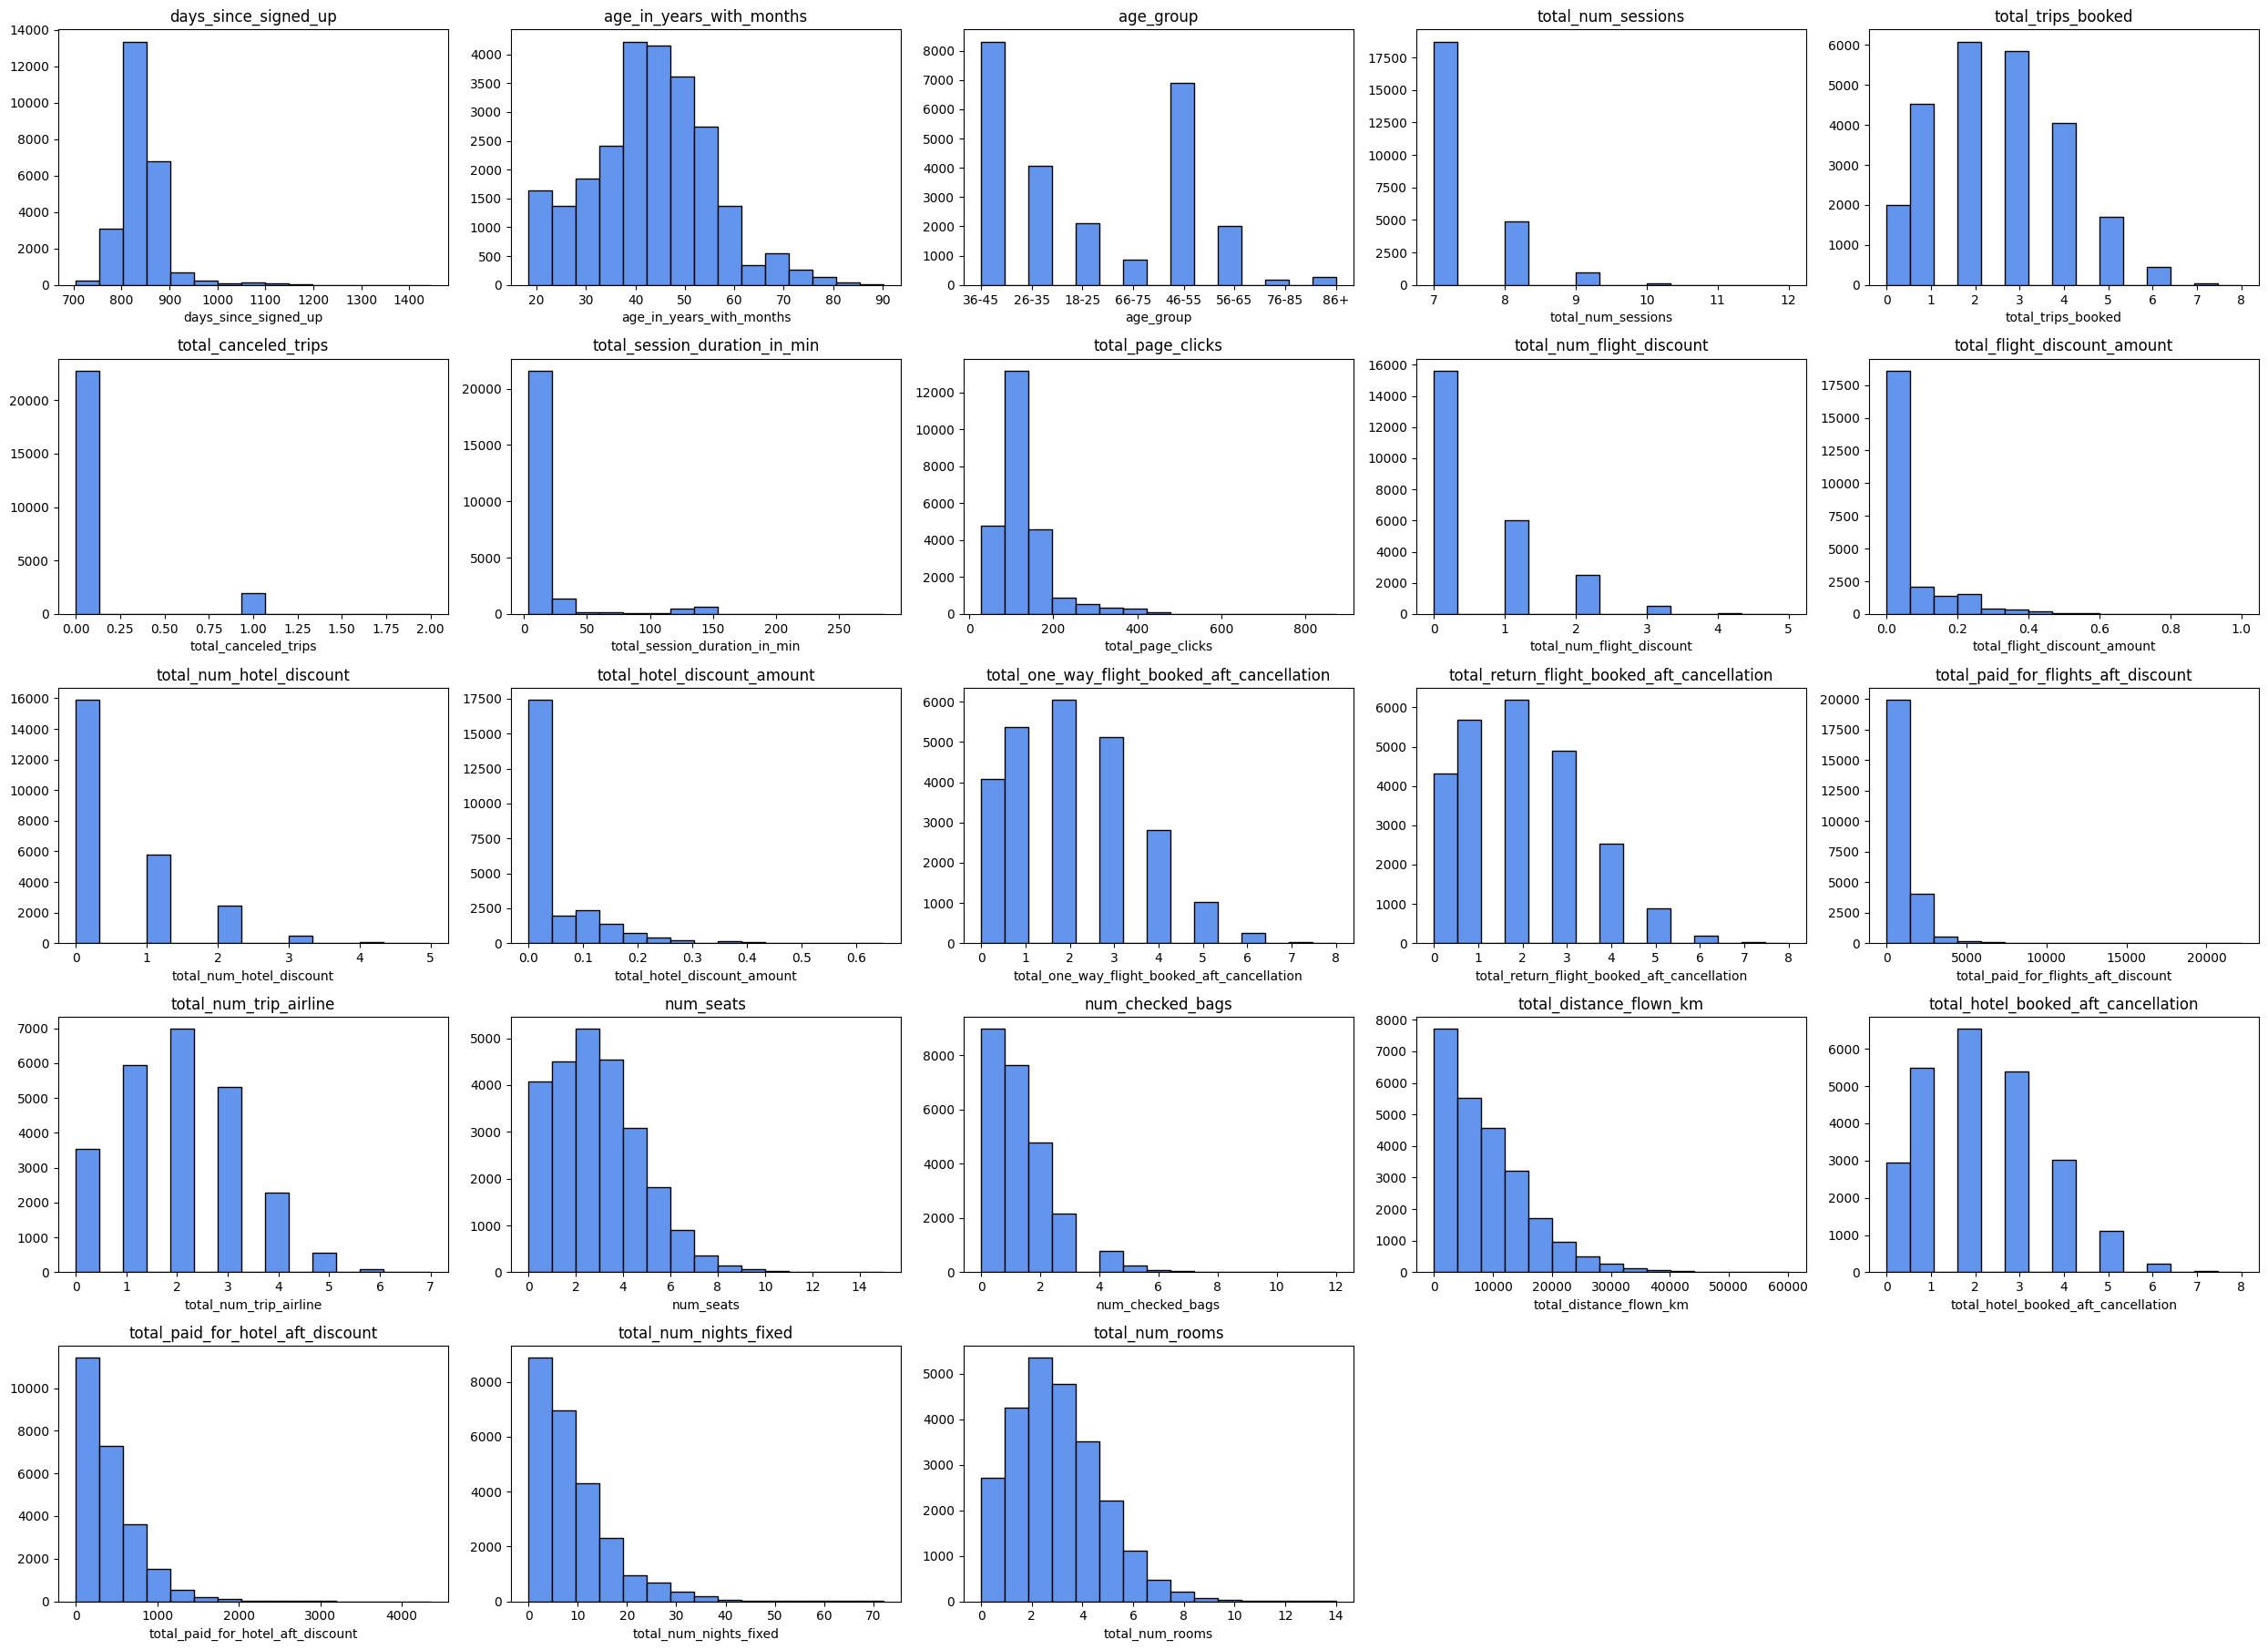

In [ ]:
#Histogram of the features to check their distributions

# Excluded some non numerical columns
columns_to_exclude = [0,1, 2, 3, 4,6,7,8]
columns_to_plot = [col for i, col in enumerate(df.columns) if i not in columns_to_exclude]

# Create a 7x5 grid of subplots
fig, axs = plt.subplots(7,5, figsize=(25, 25))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    axs[i].hist(df[col], bins=15, edgecolor='black', color='cornflowerblue')
    axs[i].set_xlabel(col)
    axs[i].set_title(col)

# Hide unused subplots
for j in range(len(columns_to_plot), len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


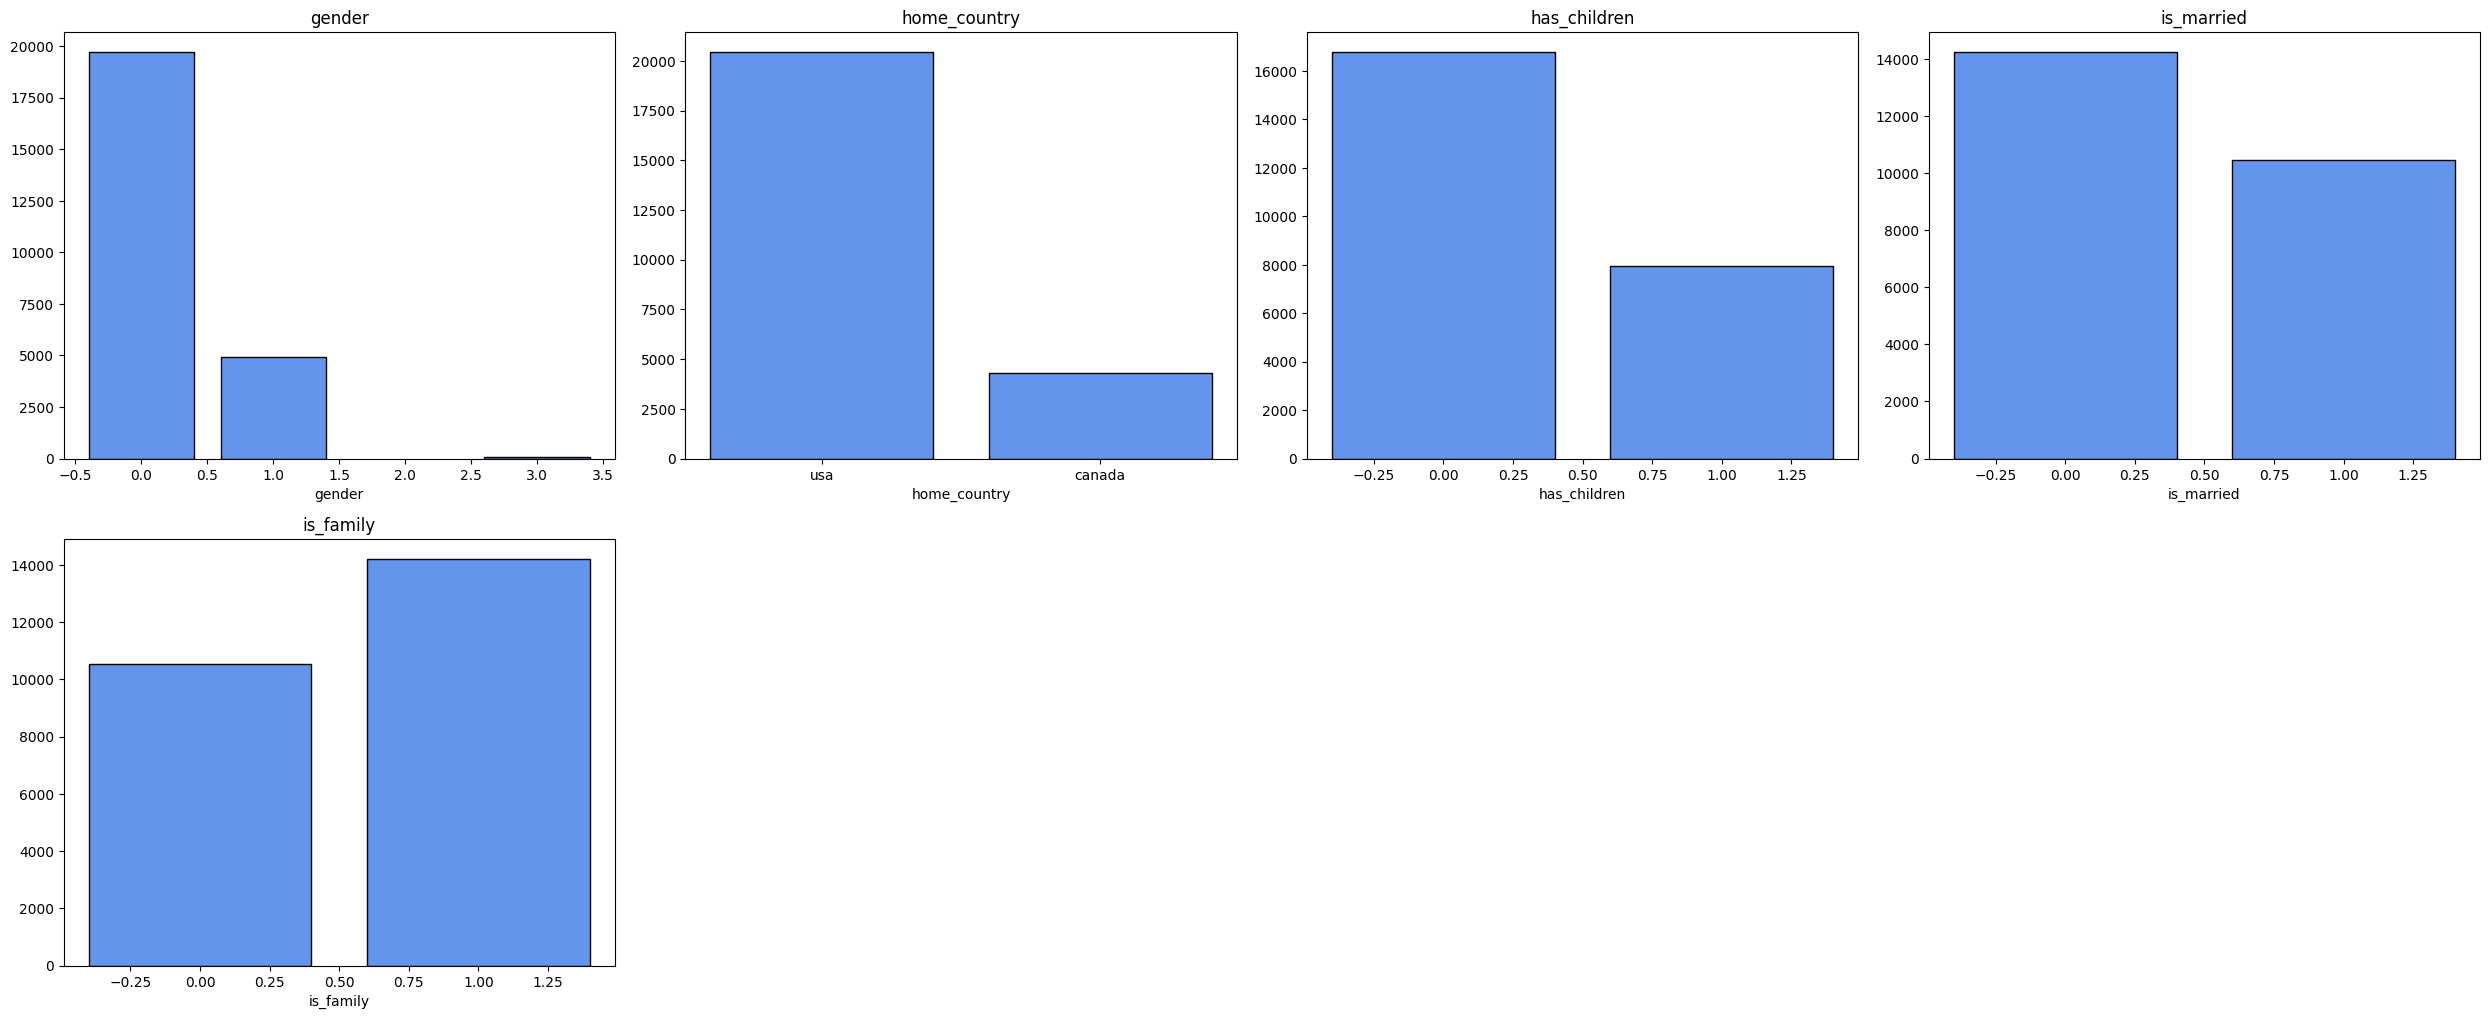

In [ ]:
#Bar chart of exclulded columns

# Excluded non numerical columns
columns_to_exclude = [1,2,6,7,8]
columns_to_plot = [col for i, col in enumerate(df.columns) if i in columns_to_exclude]

# Create a 7x7 grid of subplots
fig, axs = plt.subplots(4,4, figsize=(25, 20))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    counts = df[col].value_counts()


    #plt.barh(counts.index, city_counts.values, color='cornflowerblue', edgecolor='black')
    axs[i].bar(counts.index,counts.values, edgecolor='black', color='cornflowerblue')
    axs[i].set_xlabel(col)
    axs[i].set_title(col)


# Hide unused subplots
for j in range(len(columns_to_plot), len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

<ipython-input-8-6ec4a95785bb>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(counts.index, rotation=90, ha='right')  # Horizontal rotation
<ipython-input-8-6ec4a95785bb>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(counts.index, rotation=90, ha='right')  # Horizontal rotation


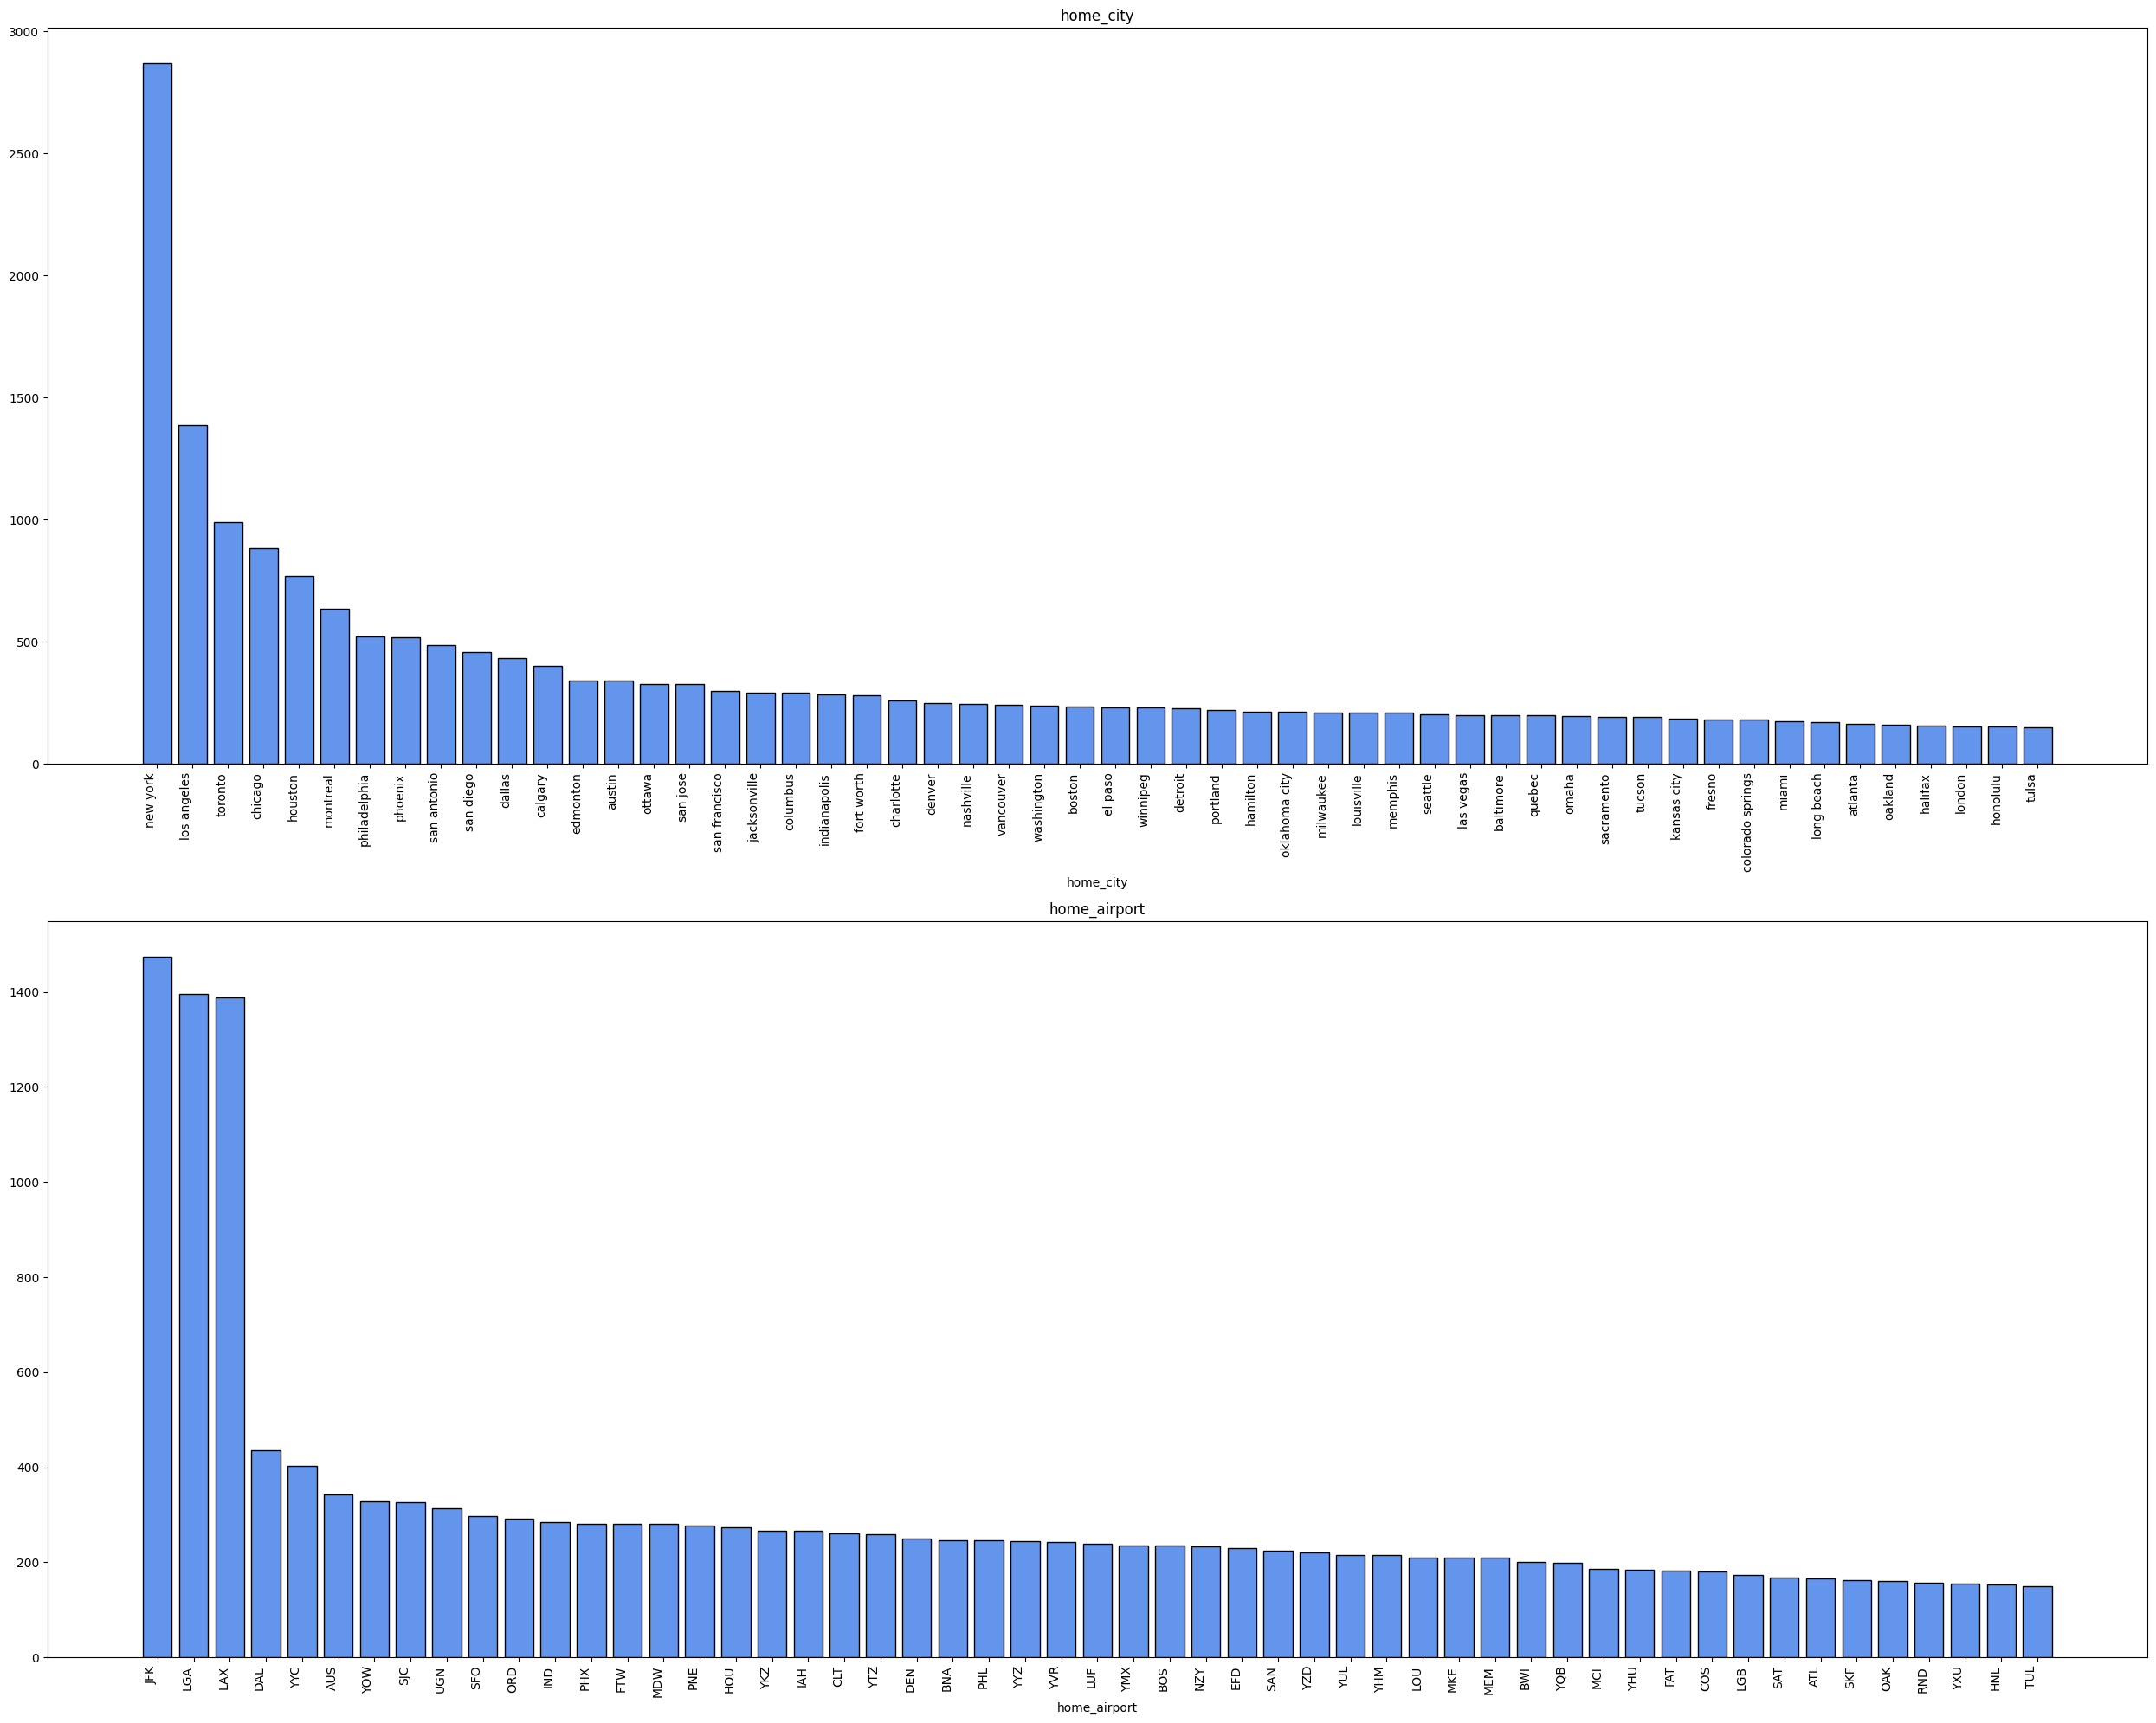

In [ ]:
#Bar chart of exclulded columns

# Excluded non numerical columns
columns_to_exclude = [3,4]
columns_to_plot = [col for i, col in enumerate(df.columns) if i in columns_to_exclude]

# Create a 7x7 grid of subplots
fig, axs = plt.subplots(2,1, figsize=(25, 20))

# Flatten the axis array
axs = axs.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    counts = df[col].value_counts()
    counts = counts[counts >= 150]

    #plt.barh(counts.index, city_counts.values, color='cornflowerblue', edgecolor='black')
    axs[i].bar(counts.index,counts.values, edgecolor='black', color='cornflowerblue')
    axs[i].set_xlabel(col)
    axs[i].set_title(col)
     # Rotate y-axis labels
    axs[i].set_xticklabels(counts.index, rotation=90, ha='right')  # Horizontal rotation

# Hide unused subplots
for j in range(len(columns_to_plot), len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

###Box-plots

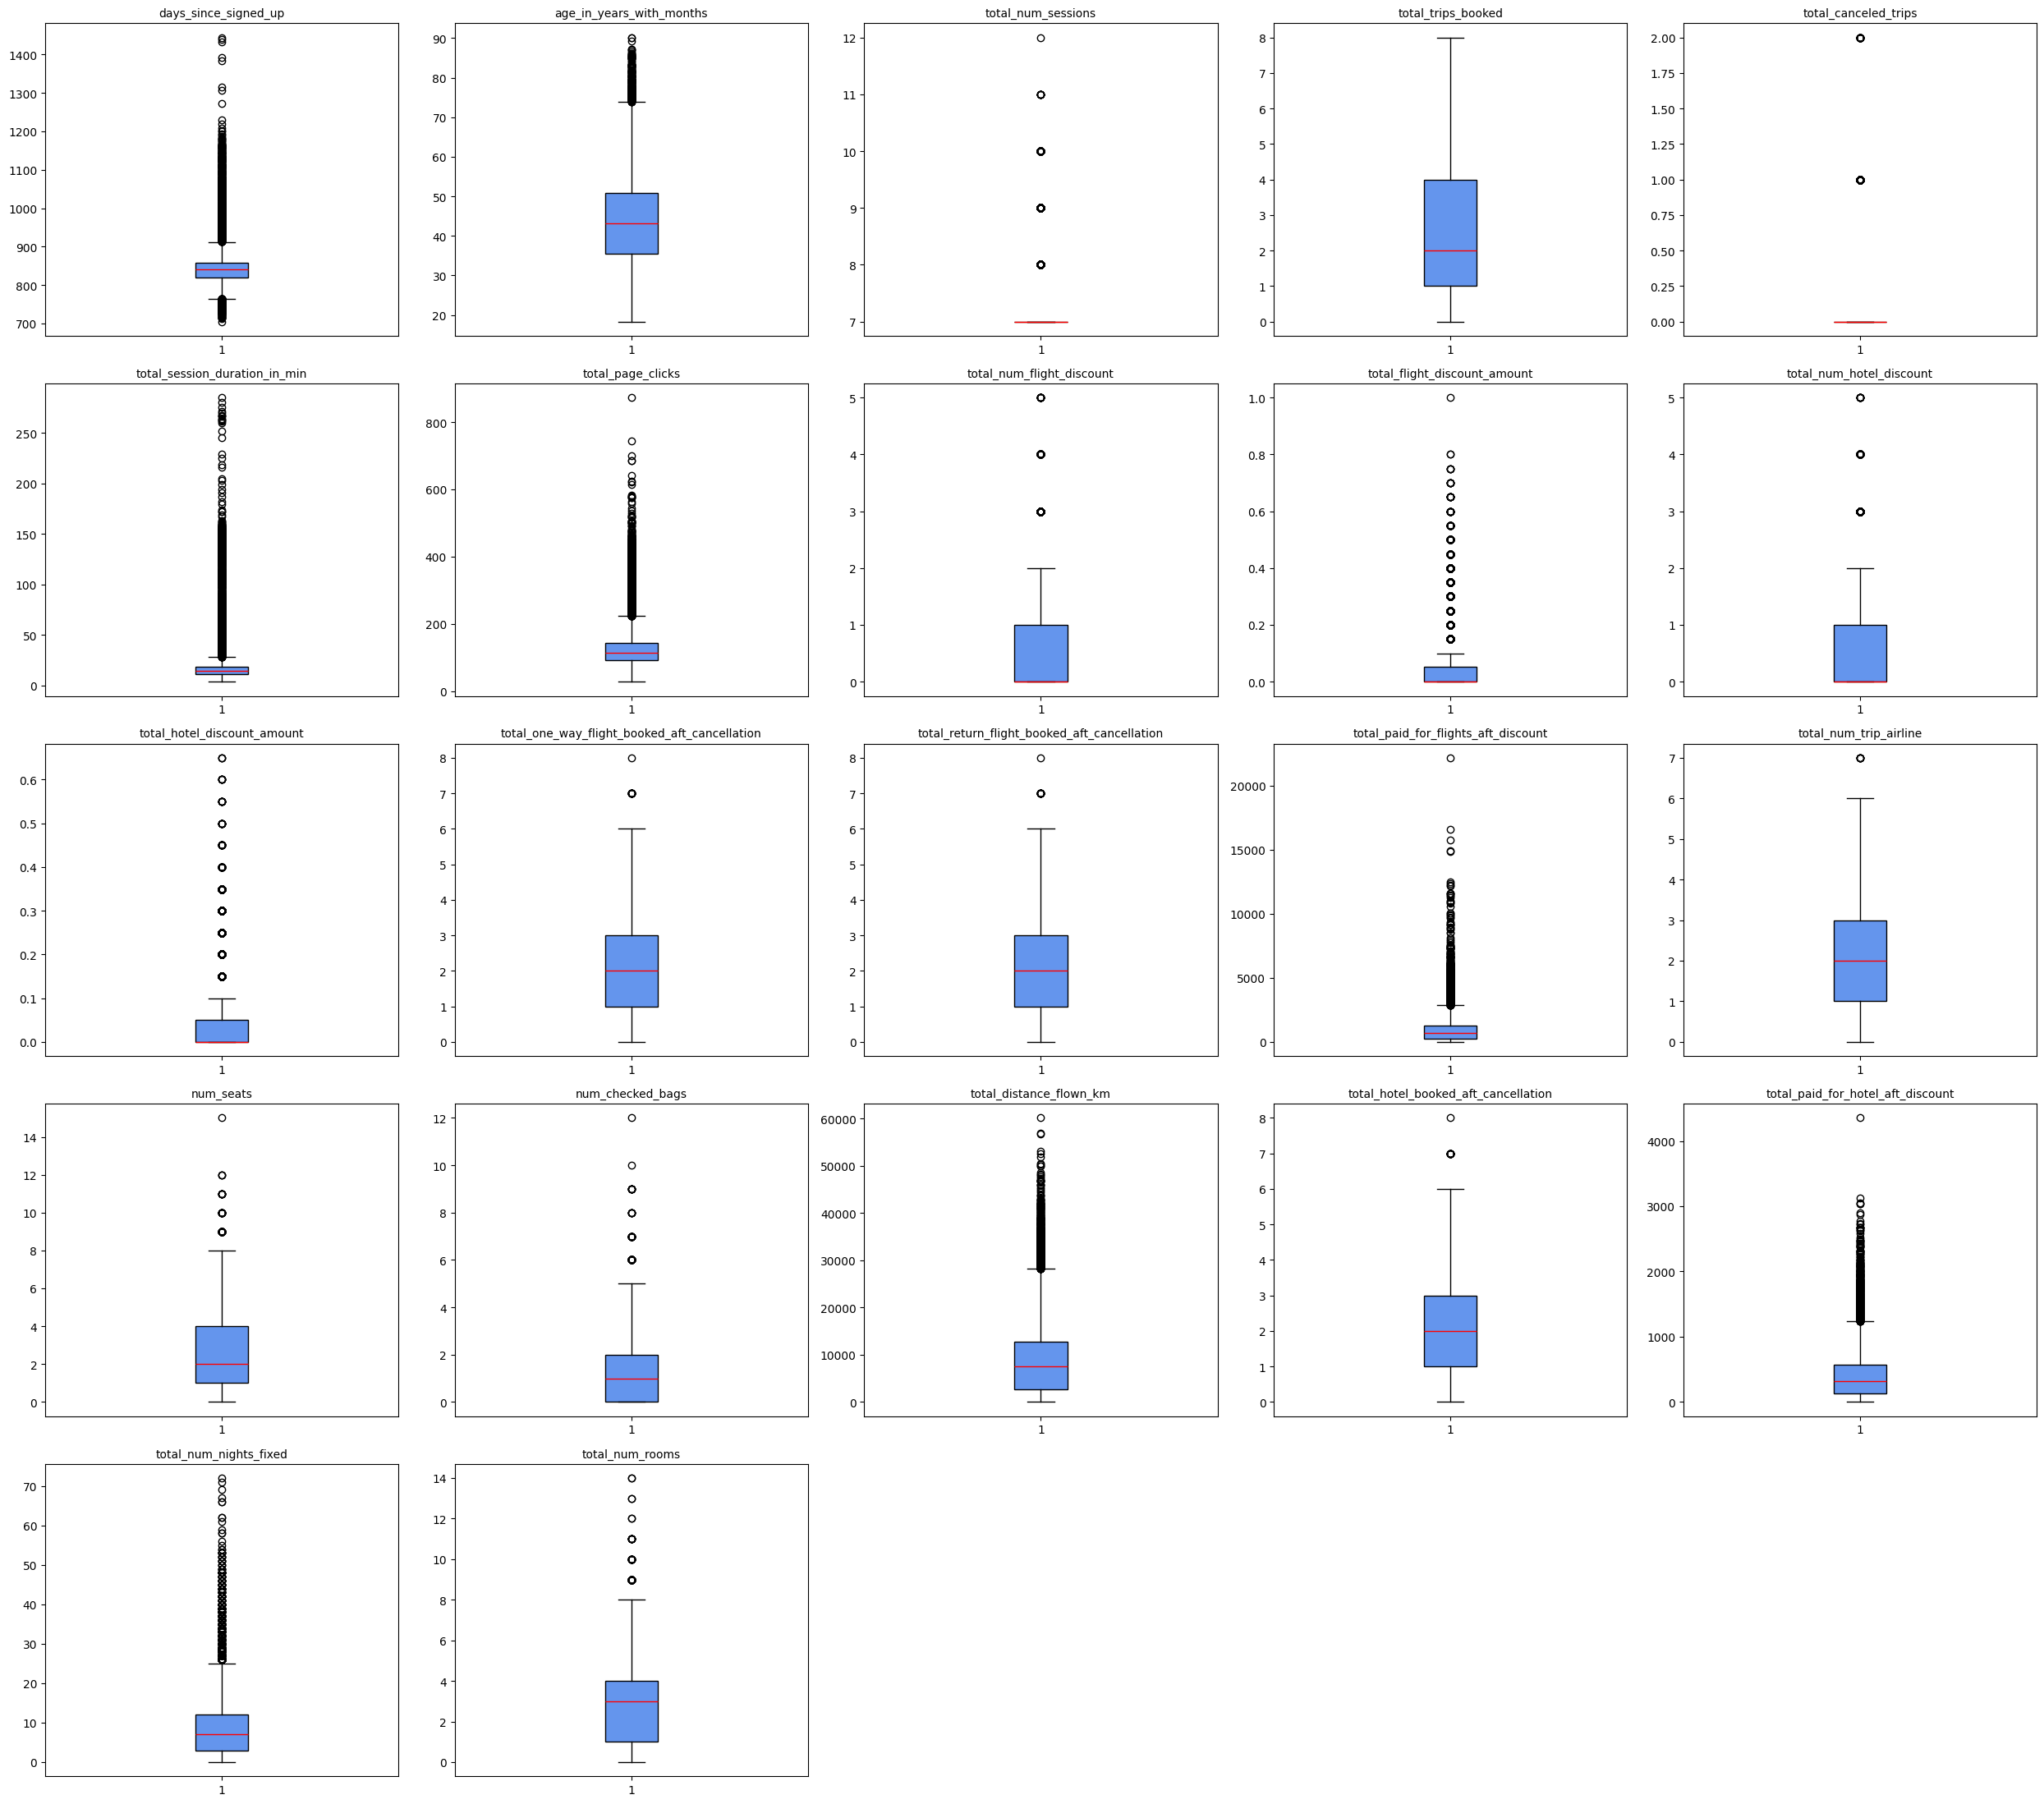

In [ ]:
# Boxplot of the features to check their distributions

# Exclude non-numerical columns
columns_to_exclude = [0, 1, 2, 3, 4, 6, 7, 8,10]
columns_to_plot = [col for i, col in enumerate(df.columns) if i not in columns_to_exclude]

# Create a 7x6 grid of subplots
fig, axs = plt.subplots(8, 5, figsize=(25, 35))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):

    axs[i].boxplot(df[col], patch_artist=True,
                   boxprops=dict(facecolor='cornflowerblue', color='black'),
                   medianprops=dict(color='red'))
    axs[i].set_title(col, fontsize=10)
    axs[i].set_xlabel('')  # Remove xlabel to avoid clutter

# Hide unused subplots
for j in range(len(columns_to_plot), len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


##Bivariate Analysis

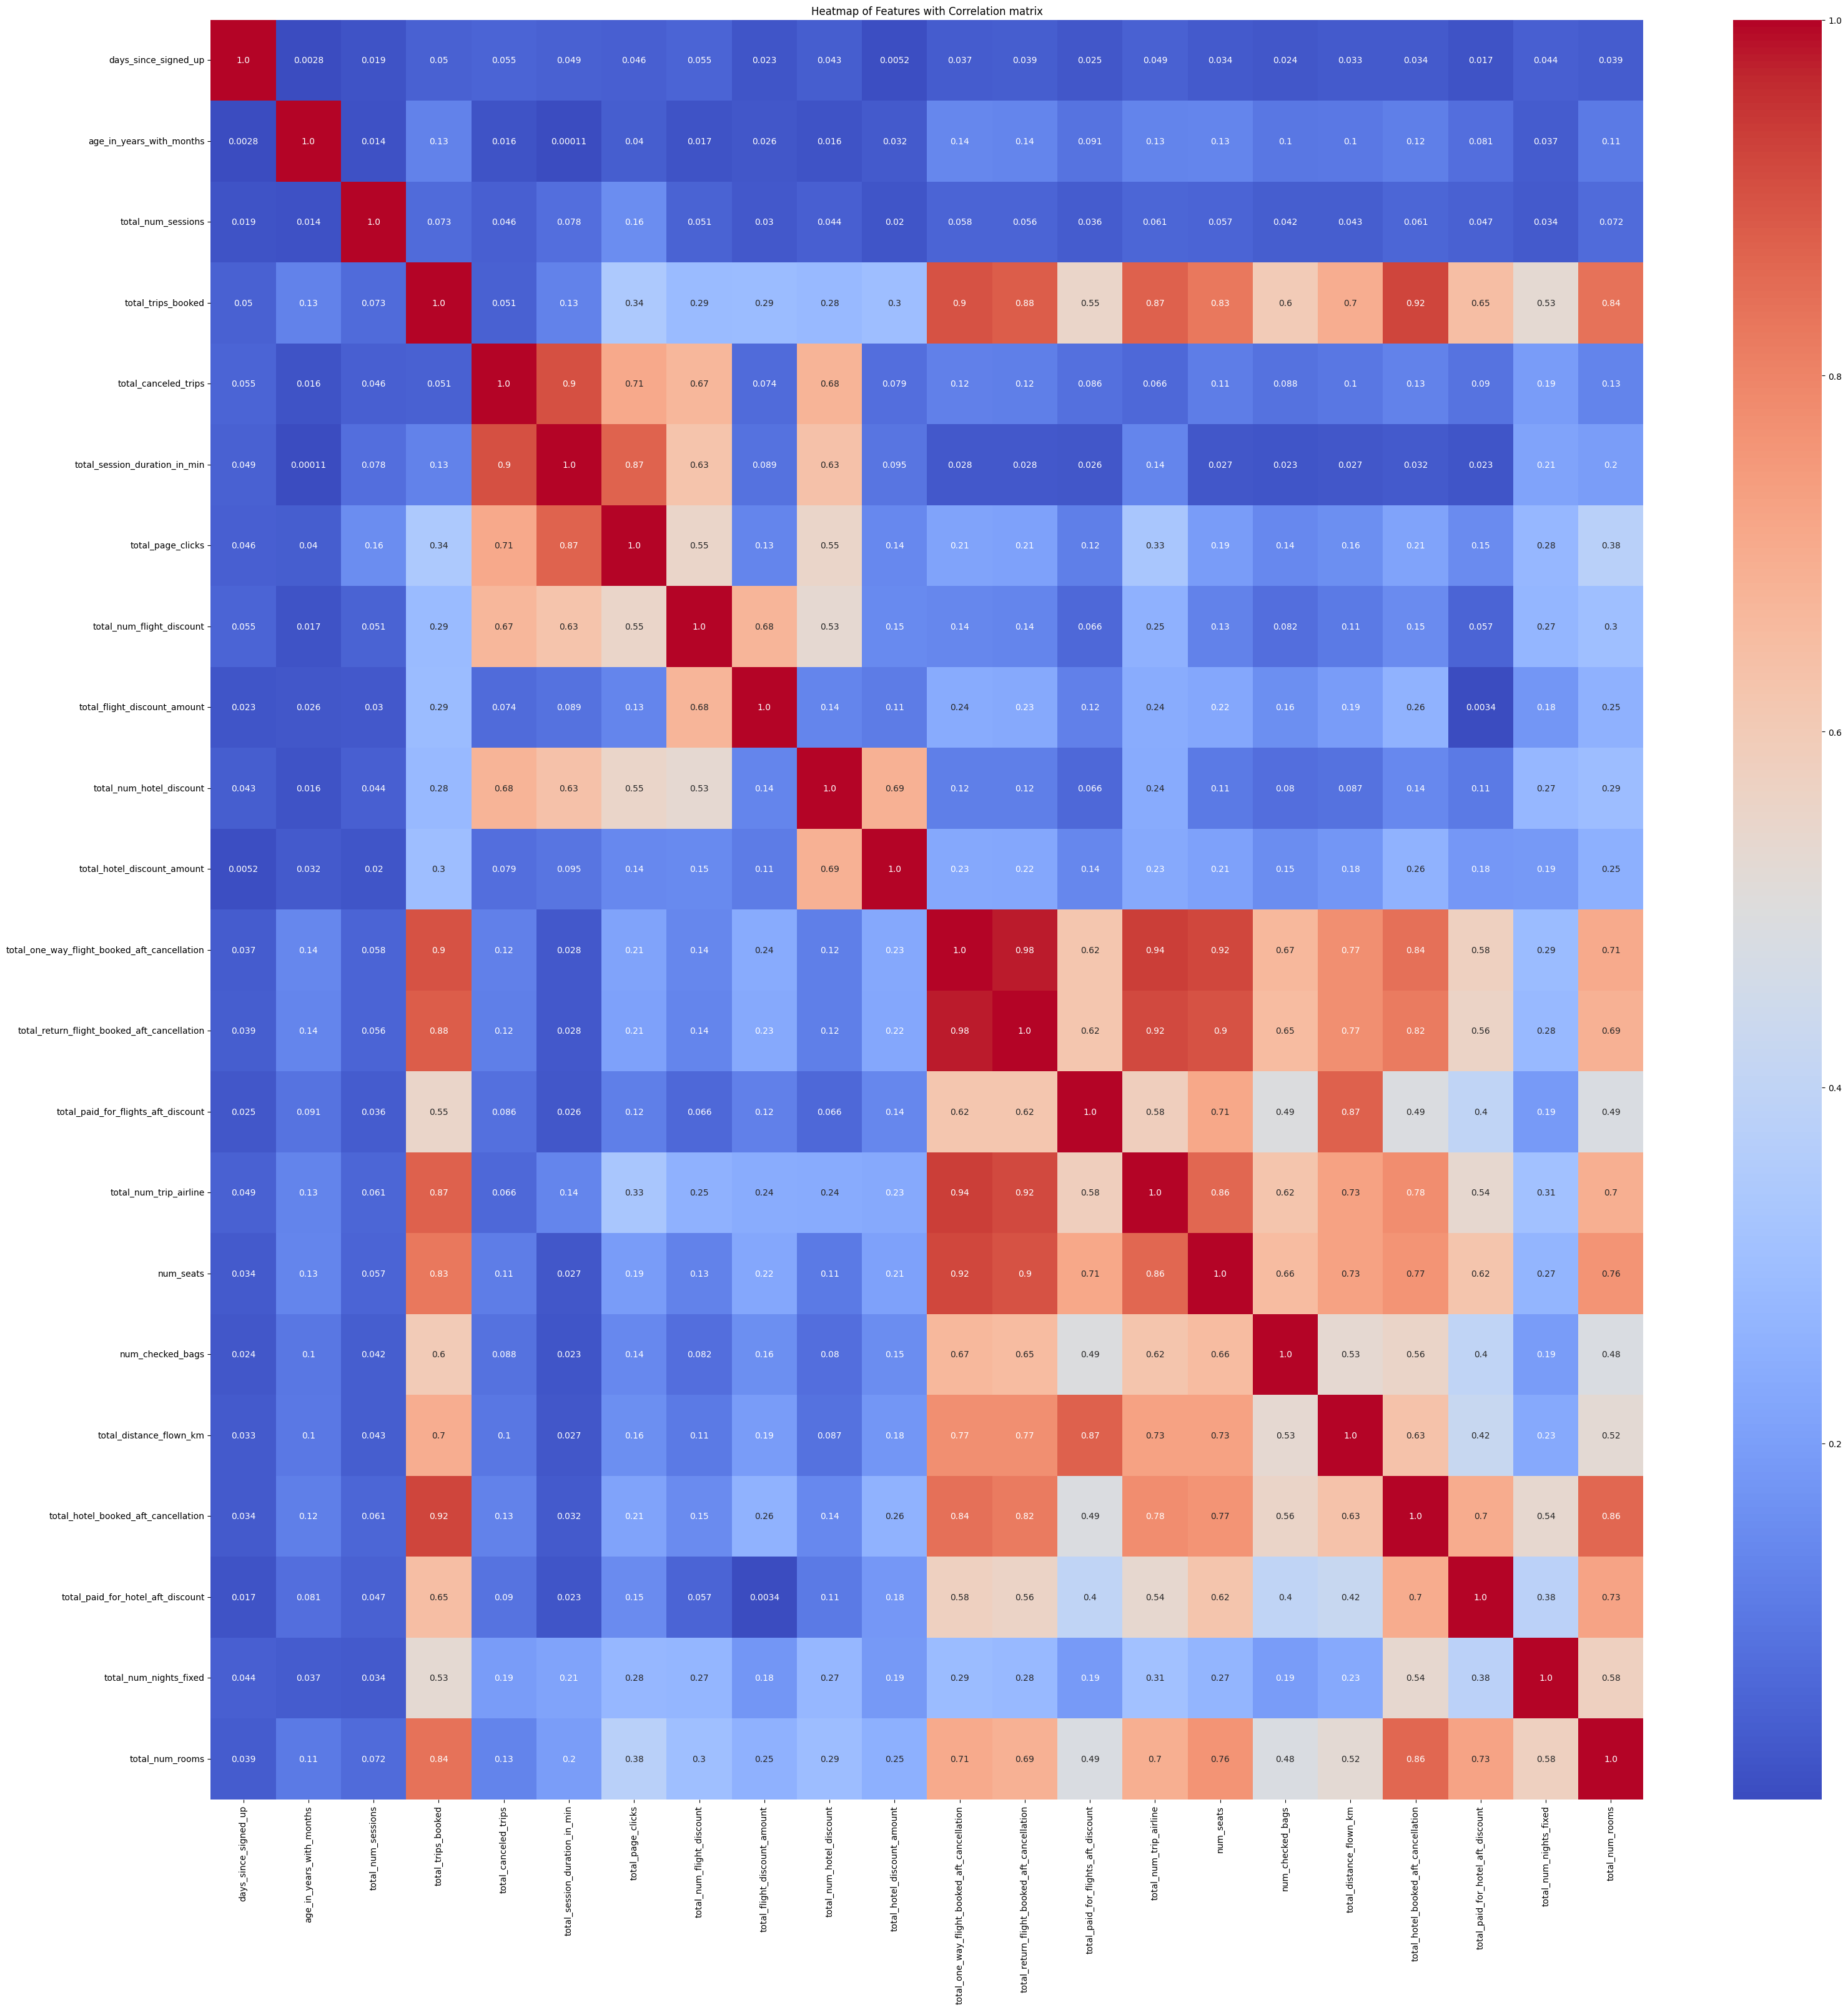

In [ ]:
#Correlation betwenn the features
# Exclude non-numerical columns

columns_to_exclude = [0, 1, 2, 3, 4, 6, 7, 8,10]
columns_to_plot = [col for i, col in enumerate(df.columns) if i not in columns_to_exclude]
df1=df[columns_to_plot]
corr = df1.corr()

#high_corr=corr.abs()[corr>=0.95]



plt.figure(figsize = (37,37))
sns.heatmap(corr.abs(), annot = True, cmap = 'coolwarm', fmt = ".2", annot_kws={"size": 10})
plt.title("Heatmap of Features with Correlation matrix")
plt.show()


### ML Algorithms (unsupervised)

In [ ]:
df_user = df.set_index('user_id')
index_user = df_user.index
df_user.head()

gender home_country home_city home_airport  days_since_signed_up  \
user_id                                                                     
3468          0          usa  new york          JFK                  1444   
4605          0          usa  columbus          CMH                  1439   
6402          0       canada   toronto          YKZ                  1433   
23557         0          usa  new york          LGA                  1391   
26878         0          usa  honolulu          HNL                  1384   

         has_children  is_married  is_family  age_in_years_with_months  \
user_id                                                                  
3468                0           1          1                     40.00   
4605                1           1          1                     27.83   
6402                0           0          0                     18.83   
23557               0           1          1                     66.42   
26878               0           0          0                     19.17   

        age_group  ...  total_return_flight_booked_aft_cancellation  \
user_id            ...                                                
3468        36-45  ...                                            3   
4605        26-35  ...                                            0   
6402        18-25  ...                                            1   
23557       66-75  ...                                            0   
26878       18-25  ...                                            1   

         total_paid_for_flights_aft_discount  total_num_trip_airline  \
user_id                                                                
3468                               1081.7835                       3   
4605                                  0.0000                       0   
6402                                117.5720                       1   
23557                                 0.0000                       0   
26878                              1063.2200                       1   

         num_seats  num_checked_bags  total_distance_flown_km  \
user_id                                                         
3468             3                 1             11808.960200   
4605             0                 0                 0.000000   
6402             1                 1              1397.606588   
23557            0                 0                 0.000000   
26878            1                 0             12591.187524   

         total_hotel_booked_aft_cancellation  \
user_id                                        
3468                                       2   
4605                                       0   
6402                                       1   
23557                                      2   
26878                                      1   

         total_paid_for_hotel_aft_discount  total_num_nights_fixed  \
user_id                                                              
3468                                282.00                      10   
4605                                  0.00                       0   
6402                                  0.00                       3   
23557                               379.25                      20   
26878                               275.00                      10   

         total_num_rooms  
user_id                   
3468                   2  
4605                   0  
6402                   1  
23557                  3  
26878                  1  

[5 rows x 30 columns]

In [ ]:
X=df_user.drop(['home_country','home_city','home_airport','age_group'],axis=1)

##Standard Scaler
**X_scaled** is the **X** (features of the train) after the standard scalation

**df_scaled** Is the data frame linked to **X_scaled** with the column labeled 'user_id' as the index column


**model** is the logistic regression that was fitted with the previous variables.



In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# To Data Frame plus index back
df_scaled=pd.DataFrame(X_scaled,index=index_user,columns=X.columns)
df_scaled


gender  days_since_signed_up  has_children  is_married  is_family  \
user_id                                                                       
3468    -0.48636             12.999344     -0.688694    1.166120   0.861885   
4605    -0.48636             12.891272      1.452024    1.166120   0.861885   
6402    -0.48636             12.761585     -0.688694   -0.857545  -1.160248   
23557   -0.48636             11.853780     -0.688694    1.166120   0.861885   
26878   -0.48636             11.702479     -0.688694   -0.857545  -1.160248   
...          ...                   ...           ...         ...        ...   
877109  -0.48636             -2.779182     -0.688694    1.166120   0.861885   
877947  -0.48636             -2.779182     -0.688694    1.166120   0.861885   
878375  -0.48636             -2.779182     -0.688694    1.166120   0.861885   
879692  -0.48636             -2.800796     -0.688694   -0.857545  -1.160248   
904168  -0.48636             -2.973712      1.452024   -0.857545   0.861885   

         age_in_years_with_months  total_num_sessions  total_trips_booked  \
user_id                                                                     
3468                    -0.252479           -0.518097            0.337462   
4605                    -1.253144           -0.518097           -1.729273   
6402                    -1.993158           -0.518097           -1.040362   
23557                    1.919875            1.254834           -0.351450   
26878                   -1.965202           -0.518097           -1.040362   
...                           ...                 ...                 ...   
877109                   0.329665           -0.518097           -1.040362   
877947                   1.035968           -0.518097           -1.040362   
878375                   0.549203           -0.518097           -0.351450   
879692                   2.214236           -0.518097           -1.729273   
904168                  -1.999736           -0.518097           -1.040362   

         total_canceled_trips  total_session_duration_in_min  ...  \
user_id                                                       ...   
3468                -0.292481                      -0.308885  ...   
4605                -0.292481                      -0.491516  ...   
6402                -0.292481                      -0.417161  ...   
23557               -0.292481                      -0.402770  ...   
26878               -0.292481                      -0.421958  ...   
...                       ...                            ...  ...   
877109              -0.292481                      -0.434979  ...   
877947               3.294476                       3.797385  ...   
878375              -0.292481                      -0.425042  ...   
879692              -0.292481                      -0.563814  ...   
904168              -0.292481                      -0.359940  ...   

         total_return_flight_booked_aft_cancellation  \
user_id                                                
3468                                        0.730569   
4605                                       -1.389702   
6402                                       -0.682945   
23557                                      -1.389702   
26878                                      -0.682945   
...                                              ...   
877109                                     -0.682945   
877947                                     -1.389702   
878375                                      0.023812   
879692                                     -1.389702   
904168                                     -0.682945   

         total_paid_for_flights_aft_discount  total_num_trip_airline  \
user_id                                                                
3468                                0.165620                0.811873   
4605                               -0.930846               -1.518103   
6402                               -0.811678               -0.741

###PCA with all the components

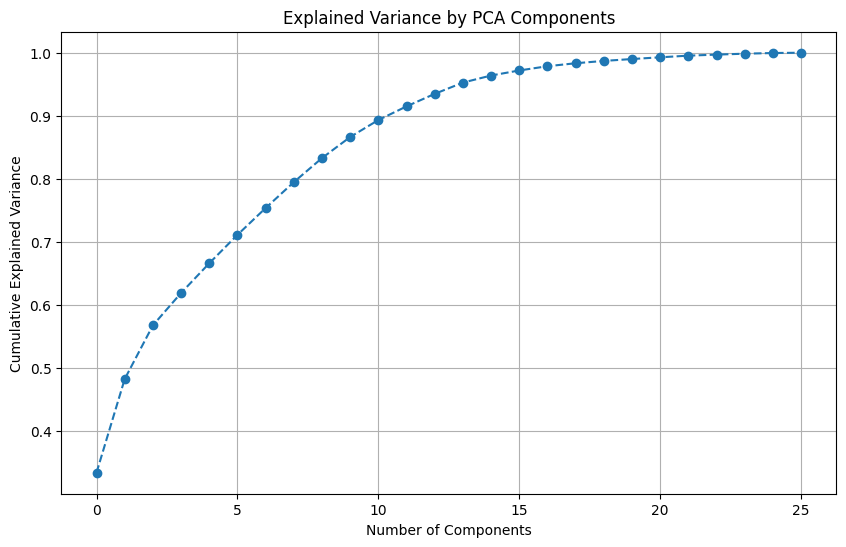

In [ ]:
# Initialize PCA to keep all components
pca_full = PCA()

# Fit PCA to the scaled data
pca_full.fit(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Print the explained variance ratio of each component
explained_variance = np.round(pca_full.explained_variance_ratio_,3)  # Access the explained variance ratio

print(f"Explained variance ratio per component\n{explained_variance}")

cumulative_explained_variance=np.round(np.cumsum(pca_full.explained_variance_ratio_),3) #Access the cumulative expained variance ratio

print(f"Cumulative explained variance ratio\n{cumulative_explained_variance}")
# Calculate and print cumulative explained variance


Explained variance ratio per component
[0.333 0.149 0.085 0.051 0.047 0.045 0.043 0.041 0.038 0.033 0.027 0.022
 0.02  0.018 0.011 0.008 0.007 0.005 0.004 0.003 0.003 0.003 0.002 0.001
 0.001 0.   ]
Cumulative explained variance ratio
[0.333 0.482 0.567 0.619 0.666 0.711 0.753 0.795 0.833 0.866 0.893 0.915
 0.935 0.953 0.964 0.972 0.979 0.983 0.987 0.99  0.993 0.995 0.997 0.998
 1.    1.   ]


We choose n_components=12 which is enough to explain 91,5% variance

###PCA with 12 components

In [ ]:
# Initialize PCA to reduce to 6 components
pca = PCA(n_components=12)

# Fit and transform PCA to the standardized data X_train only
X_pca = pca.fit_transform(X_scaled)

#Back to the index for interpretability
df_pca=pd.DataFrame(X_pca, index=index_user)


In [ ]:
df_pca

0         1         2         3         4         5         6   \
user_id                                                                         
3468     1.001071 -0.238748  0.714279  2.141535 -0.319320 -1.084400  0.168458   
4605    -4.706171 -0.251890  1.200818  0.606532 -0.541176 -0.726470  0.615617   
6402    -2.663186  0.220860 -2.304699  1.412303 -0.278059 -1.006608  0.301179   
23557   -1.907428  0.977311  1.683325 -2.427748  1.336915 -0.932340 -1.646667   
26878   -2.121475 -0.515944 -2.291025  0.394177 -0.904207 -0.886737  0.497968   
...           ...       ...       ...       ...       ...       ...       ...   
877109  -2.303851 -1.250970  1.045144 -0.097775 -0.371705  0.406716 -0.319076   
877947  -2.138689  6.782968  1.583391 -0.420012 -0.753462 -0.377778  0.030124   
878375  -0.331314 -0.673733  1.152914 -1.401368  1.159137  3.510551 -1.782366   
879692  -4.779583 -0.874603 -0.667555  0.135718 -0.003317  0.645107 -0.803933   
904168  -3.079616 -0.859959 -0.151815 -0.035569  0.031068  0.317605  0.519689   

               7          8         9         10        11  
user_id                                                     
3468    -0.570497  12.821897 -1.499278 -0.255563 -1.172479  
4605     1.263020  12.875974 -1.426755 -0.385276 -0.895151  
6402     0.507633  12.646598 -1.382024 -0.754053 -1.005089  
23557   -1.835173  12.139612  0.293617  0.789671  0.515068  
26878    0.608892  11.635716 -1.578452  1.046061 -0.668482  
...           ...        ...       ...       ...       ...  
877109  -0.836834  -2.734600 -0.528109  0.633587 -0.666961  
877947  -1.533360  -3.052454 -1.044286  0.891552 -0.168992  
878375  -0.523373  -2.371735 -0.177916 -0.564200 -0.947927  
879692  -1.843805  -2.678532 -0.286763 -0.096864  2.032028  
904168   2.487945  -2.917747 -0.605643  0.023166 -0.319978  

[24724 rows x 12 columns]

### K-means

In [ ]:
# Find the optimal number of clusters using the Elbow Method
range_n_clusters = range(2, 11)
# Store metrics
wcss = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the closest cluster center
    silhouette_scores.append(silhouette_score(X_pca, cluster_labels))

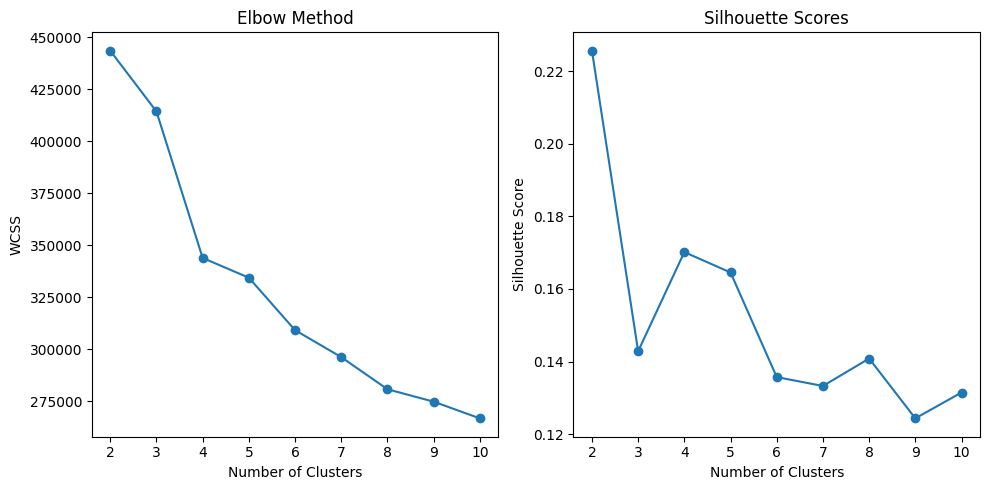

In [ ]:
# Plot WCSS (Elbow Method)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
print(list(range_n_clusters))
print(wcss)
print(list(range_n_clusters))
print(silhouette_scores)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[443524.07815429854, 414331.59805951227, 343952.2675680649, 334464.3970059619, 309278.61799984815, 296313.0952547427, 280873.53800873976, 274910.42745802435, 266900.54869780986]
[2, 3, 4, 5, 6, 7, 8, 9, 10]
[np.float64(0.2255861558818362), np.float64(0.14284443547980824), np.float64(0.17014434254878016), np.float64(0.16452954566963235), np.float64(0.13573316401297136), np.float64(0.13327730235892535), np.float64(0.14084308078738877), np.float64(0.12437226965015029), np.float64(0.1314829451531547)]


###Conclusion: Silhouette scores is better with 2 clusters and low with 3 clusters and the elbow method for the metric wcss indicates that WCSS reduction slows significantly after 3 clusters. So we will choose 2 clusters

In [ ]:
#Applying K-Means Clustering
from sklearn.cluster import KMeans

# Create KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5)


In [ ]:
#Index with clusters
# Fit and predict the model to the data
clusters=kmeans.fit_predict(X_pca)
df_pca['cluster'] = clusters

In [ ]:
df_pca

0         1         2         3         4         5         6  \
user_id                                                                         
3468     1.001071 -0.238748  0.714279  2.141535 -0.319320 -1.084400  0.168458   
4605    -4.706171 -0.251890  1.200818  0.606532 -0.541176 -0.726470  0.615617   
6402    -2.663186  0.220860 -2.304699  1.412303 -0.278059 -1.006608  0.301179   
23557   -1.907428  0.977311  1.683325 -2.427748  1.336915 -0.932340 -1.646667   
26878   -2.121475 -0.515944 -2.291025  0.394177 -0.904207 -0.886737  0.497968   
...           ...       ...       ...       ...       ...       ...       ...   
877109  -2.303851 -1.250970  1.045144 -0.097775 -0.371705  0.406716 -0.319076   
877947  -2.138689  6.782968  1.583391 -0.420012 -0.753462 -0.377778  0.030124   
878375  -0.331314 -0.673733  1.152914 -1.401368  1.159137  3.510551 -1.782366   
879692  -4.779583 -0.874603 -0.667555  0.135718 -0.003317  0.645107 -0.803933   
904168  -3.079616 -0.859959 -0.151815 -0.035569  0.031068  0.317605  0.519689   

                7          8         9        10        11  cluster  
user_id                                                              
3468    -0.570497  12.821897 -1.499278 -0.255563 -1.172479        1  
4605     1.263020  12.875974 -1.426755 -0.385276 -0.895151        2  
6402     0.507633  12.646598 -1.382024 -0.754053 -1.005089        0  
23557   -1.835173  12.139612  0.293617  0.789671  0.515068        2  
26878    0.608892  11.635716 -1.578452  1.046061 -0.668482        0  
...           ...        ...       ...       ...       ...      ...  
877109  -0.836834  -2.734600 -0.528109  0.633587 -0.666961        2  
877947  -1.533360  -3.052454 -1.044286  0.891552 -0.168992        3  
878375  -0.523373  -2.371735 -0.177916 -0.564200 -0.947927        1  
879692  -1.843805  -2.678532 -0.286763 -0.096864  2.032028        0  
904168   2.487945  -2.917747 -0.605643  0.023166 -0.319978        0  

[24724 rows x 13 columns]

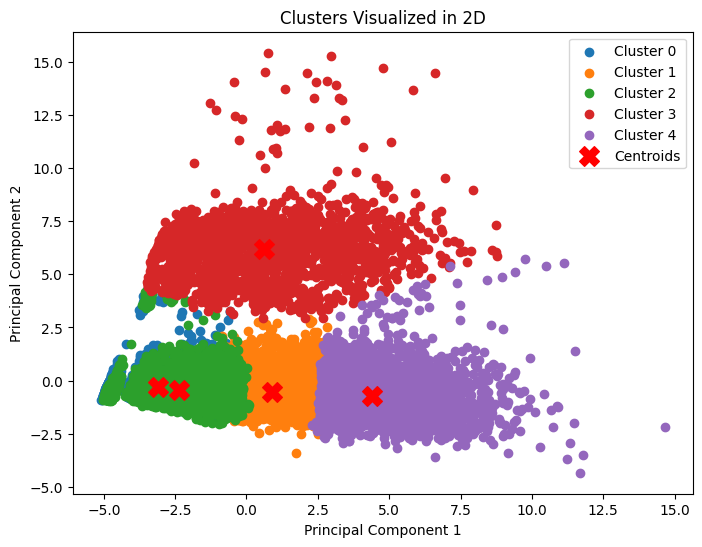

In [ ]:
# Visualize the clusters
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    plt.scatter(data_2d[clusters == cluster, 0],
                data_2d[clusters == cluster, 1],
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('Clusters Visualized in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


###Interpretation

In [ ]:
#Merge the cluster labels back to the original DataFrame for interpretation.
df_user['cluster']=clusters
df_user

gender home_country    home_city home_airport  days_since_signed_up  \
user_id                                                                        
3468          0          usa     new york          JFK                  1444   
4605          0          usa     columbus          CMH                  1439   
6402          0       canada      toronto          YKZ                  1433   
23557         0          usa     new york          LGA                  1391   
26878         0          usa     honolulu          HNL                  1384   
...         ...          ...          ...          ...                   ...   
877109        0          usa      detroit          DTW                   714   
877947        0          usa   sacramento          MCC                   714   
878375        0          usa  kansas city          MCI                   714   
879692        0          usa      chicago          MDW                   713   
904168        0          usa      seattle          SEA                   705   

         has_children  is_married  is_family  age_in_years_with_months  \
user_id                                                                  
3468                0           1          1                     40.00   
4605                1           1          1                     27.83   
6402                0           0          0                     18.83   
23557               0           1          1                     66.42   
26878               0           0          0                     19.17   
...               ...         ...        ...                       ...   
877109              0           1          1                     47.08   
877947              0           1          1                     55.67   
878375              0           1          1                     49.75   
879692              0           0          0                     70.00   
904168              1           0          1                     18.75   

        age_group  ...  total_paid_for_flights_aft_discount  \
user_id            ...                                        
3468        36-45  ...                            1081.7835   
4605        26-35  ...                               0.0000   
6402        18-25  ...                             117.5720   
23557       66-75  ...                               0.0000   
26878       18-25  ...                            1063.2200   
...           ...  ...                                  ...   
877109      46-55  ...                            1130.0000   
877947      46-55  ...                               0.0000   
878375      46-55  ...                             998.3600   
879692      66-75  ...                               0.0000   
904168      18-25  ...                             579.5000   

         total_num_trip_airline  num_seats  num_checked_bags  \
user_id                                                        
3468                          3          3                 1   
4605                          0          0                 0   
6402                          1          1                 1   
23557                         0          0                 0   
26878                         1          1                 0   
...                         ...        ...               ...   
877109                        1          2                 0   
877947                        1          0                 0   
878375                        2          3                 3   
879692                        0          0                 0   
904168                        1          1                 0   

         total_distance_flown_km  total_hotel_booked_aft_cancellation  \
user_id                                                                 
3468                11808.960200                                    2   
4605                    0.000000                                    0   
6402                 1397.606588                            

In [ ]:
df_numeric=df_user.drop(['gender','has_children','is_married','is_family','home_country','home_city','home_airport','age_group'],axis=1)
df_descriptive=df_user[[col for col in df_user.columns if col in ['gender','has_children','is_married','is_family','home_country','home_city','home_airport','age_group','cluster']]]

In [ ]:
pd.set_option('display.max_columns', None)
cluster_numeric_summary = df_numeric.groupby('cluster').mean()
cluster_numeric_summary

days_since_signed_up  age_in_years_with_months  total_num_sessions  \
cluster                                                                       
0                  839.094966                 31.450941            7.239213   
1                  843.115394                 43.881476            7.277939   
2                  839.379554                 50.511901            7.267355   
3                  851.398721                 42.513817            7.378998   
4                  845.606249                 44.963487            7.371008   

         total_trips_booked  total_canceled_trips  \
cluster                                             
0                  1.045897              0.008249   
1                  2.978545              0.000727   
2                  1.385354              0.003988   
3                  2.750533              1.018657   
4                  4.534804              0.008730   

         total_session_duration_in_min  total_page_clicks  \
cluster                                                     
0                            11.955383          94.797589   
1                            15.024908         121.030424   
2                            12.463293          99.663948   
3                           114.105805         288.597015   
4                            18.321234         145.090972   

         total_num_flight_discount  total_flight_discount_amount  \
cluster                                                            
0                         0.173435                      0.021495   
1                         0.452485                      0.063081   
2                         0.196302                      0.025588   
3                         2.318763                      0.078659   
4                         0.676545                      0.093141   

         total_num_hotel_discount  total_hotel_discount_amount  \
cluster                                                          
0                        0.166244                     0.016283   
1                        0.404242                     0.044472   
2                        0.199927                     0.020889   
3                        2.301173                     0.061069   
4                        0.688720                     0.076239   

         total_one_way_flight_booked_aft_cancellation  \
cluster                                                 
0                                            0.661591   
1                                            2.563152   
2                                            1.028820   
3                                            1.448294   
4                                            4.170227   

         total_return_flight_booked_aft_cancellation  \
cluster                                                
0                                           0.623096   
1                                           2.446667   
2                                           0.979155   
3                                           1.381130   
4                                           4.018148   

         total_paid_for_flights_aft_discount  total_num_trip_airline  \
cluster                                                                
0                                 269.281490                0.654399   
1                                1099.596915                2.373212   
2                                 416.108128                1.004169   
3                                 612.854368                2.230277   
4                                2048.205516                3.659545   

         num_seats  num_checked_bags  total_distance_flown_km  \
cluster                                                         
0         0.742174          0.325508              2713.339879   
1         2.990545          1.445333             10619.057873   
2         1.162588          0.545949              4117.868600   
3         1.690299          0.780384              5975.149677   
4         5.099012         

In [ ]:
df_numeric.groupby('cluster').median()


days_since_signed_up  age_in_years_with_months  total_num_sessions  \
cluster                                                                       
0                       839.0                     27.92                 7.0   
1                       842.0                     43.83                 7.0   
2                       839.0                     49.33                 7.0   
3                       843.0                     42.79                 7.0   
4                       845.0                     44.58                 7.0   

         total_trips_booked  total_canceled_trips  \
cluster                                             
0                       1.0                   0.0   
1                       3.0                   0.0   
2                       1.0                   0.0   
3                       3.0                   1.0   
4                       4.0                   0.0   

         total_session_duration_in_min  total_page_clicks  \
cluster                                                     
0                                11.16               90.0   
1                                14.42              116.0   
2                                11.73               94.0   
3                               130.80              288.0   
4                                17.35              140.0   

         total_num_flight_discount  total_flight_discount_amount  \
cluster                                                            
0                              0.0                      0.000000   
1                              0.0                      0.000000   
2                              0.0                      0.000000   
3                              2.0                      0.053237   
4                              1.0                      0.050000   

         total_num_hotel_discount  total_hotel_discount_amount  \
cluster                                                          
0                             0.0                     0.000000   
1                             0.0                     0.000000   
2                             0.0                     0.000000   
3                             2.0                     0.040671   
4                             1.0                     0.050000   

         total_one_way_flight_booked_aft_cancellation  \
cluster                                                 
0                                                 1.0   
1                                                 3.0   
2                                                 1.0   
3                                                 1.0   
4                                                 4.0   

         total_return_flight_booked_aft_cancellation  \
cluster                                                
0                                                1.0   
1                                                2.0   
2                                                1.0   
3                                                1.0   
4                                                4.0   

         total_paid_for_flights_aft_discount  total_num_trip_airline  \
cluster                                                                
0                                    93.8450                     1.0   
1                                   974.7315                     2.0   
2                                   330.6400                     1.0   
3                                   452.6450                     2.0   
4                                  1768.4300                     4.0   

         num_seats  num_checked_bags  total_distance_flown_km  \
cluster                                                         
0              1.0               0.0              1059.394834   
1              3.0               1.0              9998.491924   
2              1.0               0.0              3513.661861   
3              1.0               0.0              4736.397556   
4              5.0         

In [ ]:

df_numeric.groupby('cluster').count()

days_since_signed_up  age_in_years_with_months  total_num_sessions  \
cluster                                                                       
0                        4728                      4728                4728   
1                        8250                      8250                8250   
2                        5517                      5517                5517   
3                        1876                      1876                1876   
4                        4353                      4353                4353   

         total_trips_booked  total_canceled_trips  \
cluster                                             
0                      4728                  4728   
1                      8250                  8250   
2                      5517                  5517   
3                      1876                  1876   
4                      4353                  4353   

         total_session_duration_in_min  total_page_clicks  \
cluster                                                     
0                                 4728               4728   
1                                 8250               8250   
2                                 5517               5517   
3                                 1876               1876   
4                                 4353               4353   

         total_num_flight_discount  total_flight_discount_amount  \
cluster                                                            
0                             4728                          4728   
1                             8250                          8250   
2                             5517                          5517   
3                             1876                          1876   
4                             4353                          4353   

         total_num_hotel_discount  total_hotel_discount_amount  \
cluster                                                          
0                            4728                         4728   
1                            8250                         8250   
2                            5517                         5517   
3                            1876                         1876   
4                            4353                         4353   

         total_one_way_flight_booked_aft_cancellation  \
cluster                                                 
0                                                4728   
1                                                8250   
2                                                5517   
3                                                1876   
4                                                4353   

         total_return_flight_booked_aft_cancellation  \
cluster                                                
0                                               4728   
1                                               8250   
2                                               5517   
3                                               1876   
4                                               4353   

         total_paid_for_flights_aft_discount  total_num_trip_airline  \
cluster                                                                
0                                       4728                    4728   
1                                       8250                    8250   
2                                       5517                    5517   
3                                       1876                    1876   
4                                       4353                    4353   

         num_seats  num_checked_bags  total_distance_flown_km  \
cluster                                                         
0             4728              4728                     4728   
1             8250              8250                     8250   
2             5517              5517                     5517   
3             1876              1876                     1876   
4             4353         

In [ ]:
cluster_descriptive_summary = df_descriptive.groupby('cluster').apply(lambda group: group.mode().iloc[0])
cluster_descriptive_summary


<ipython-input-30-e5abcc373ca3>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_descriptive_summary = df_descriptive.groupby('cluster').apply(lambda group: group.mode().iloc[0])


0        gender home_country home_city home_airport  has_children  is_married  \
cluster                                                                         
0           0.0          usa  new york          JFK           0.0         0.0   
1           0.0          usa  new york          LGA           0.0         0.0   
2           0.0          usa  new york          LAX           1.0         1.0   
3           0.0          usa  new york          JFK           0.0         0.0   
4           0.0          usa  new york          JFK           0.0         0.0   

0        is_family age_group  cluster  
cluster                                
0              0.0     18-25      0.0  
1              1.0     36-45      1.0  
2              1.0     46-55      2.0  
3              1.0     36-45      3.0  
4              1.0     36-45      4.0

#Segmentation

In [ ]:
# saving the dataframe
df_user.to_csv('cluster_table.csv')

Let us fix the cluster tablefrom the algorithm to avoid changing on clusters names (0,1,2,3,4)

In [ ]:
#Data Assessment
customers=pd.read_csv('/content/fixed_cluster_table.csv')

customers.head()

user_id  gender home_country home_city home_airport  days_since_signed_up  \
0     3468       0          usa  new york          JFK                  1444   
1     4605       0          usa  columbus          CMH                  1439   
2     6402       0       canada   toronto          YKZ                  1433   
3    23557       0          usa  new york          LGA                  1391   
4    26878       0          usa  honolulu          HNL                  1384   

   has_children  is_married  is_family  age_in_years_with_months age_group  \
0             0           1          1                     40.00     36-45   
1             1           1          1                     27.83     26-35   
2             0           0          0                     18.83     18-25   
3             0           1          1                     66.42     66-75   
4             0           0          0                     19.17     18-25   

   total_num_sessions  total_trips_booked  total_canceled_trips  \
0                   7                   3                     0   
1                   7                   0                     0   
2                   7                   1                     0   
3                   8                   2                     0   
4                   7                   1                     0   

   total_session_duration_in_min  total_page_clicks  \
0                          12.95                105   
1                           7.62                 61   
2                           9.79                 79   
3                          10.21                 82   
4                           9.65                 77   

   total_num_flight_discount  total_flight_discount_amount  \
0                          1                          0.15   
1                          0                          0.00   
2                          1                          0.05   
3                          0                          0.00   
4                          0                          0.00   

   total_num_hotel_discount  total_hotel_discount_amount  \
0                         0                         0.00   
1                         0                         0.00   
2                         0                         0.00   
3                         1                         0.25   
4                         0                         0.00   

   total_one_way_flight_booked_aft_cancellation  \
0                                             3   
1                                             0   
2                                             1   
3                                             0   
4                                             1   

   total_return_flight_booked_aft_cancellation  \
0                                            3   
1                                            0   
2                                            1   
3                                            0   
4                                            1   

   total_paid_for_flights_aft_discount  total_num_trip_airline  num_seats  \
0                            1081.7835                       3          3   
1                               0.0000                       0          0   
2                             117.5720                       1          1   
3                               0.0000                       0          0   
4                            1063.2200                       1          1   

   num_checked_bags  total_distance_flown_km  \
0                 1             11808.960200   
1                 0                 0.000000   
2                 1              1397.606588   
3                 0                 0.000000   
4                 0             12591.187524   

   total_hotel_booked_aft_cancellation  total_paid_for_hotel_aft_discount  \
0                                    2                             282.00   
1                                    0                               0.

### 1)Demographics and Family Status

In [ ]:
demographics=customers[['user_id','gender','home_country','home_city','has_children','is_married','is_family','age_in_years_with_months','age_group','cluster']]

In [ ]:
demographics

user_id  gender home_country    home_city  has_children  is_married  \
0         3468       0          usa     new york             0           1   
1         4605       0          usa     columbus             1           1   
2         6402       0       canada      toronto             0           0   
3        23557       0          usa     new york             0           1   
4        26878       0          usa     honolulu             0           0   
...        ...     ...          ...          ...           ...         ...   
24719   877109       0          usa      detroit             0           1   
24720   877947       0          usa   sacramento             0           1   
24721   878375       0          usa  kansas city             0           1   
24722   879692       0          usa      chicago             0           0   
24723   904168       0          usa      seattle             1           0   

       is_family  age_in_years_with_months age_group  cluster  
0              1                     40.00     36-45        2  
1              1                     27.83     26-35        0  
2              0                     18.83     18-25        0  
3              1                     66.42     66-75        2  
4              0                     19.17     18-25        0  
...          ...                       ...       ...      ...  
24719          1                     47.08     46-55        0  
24720          1                     55.67     46-55        4  
24721          1                     49.75     46-55        2  
24722          0                     70.00     66-75        0  
24723          1                     18.75     18-25        0  

[24724 rows x 10 columns]

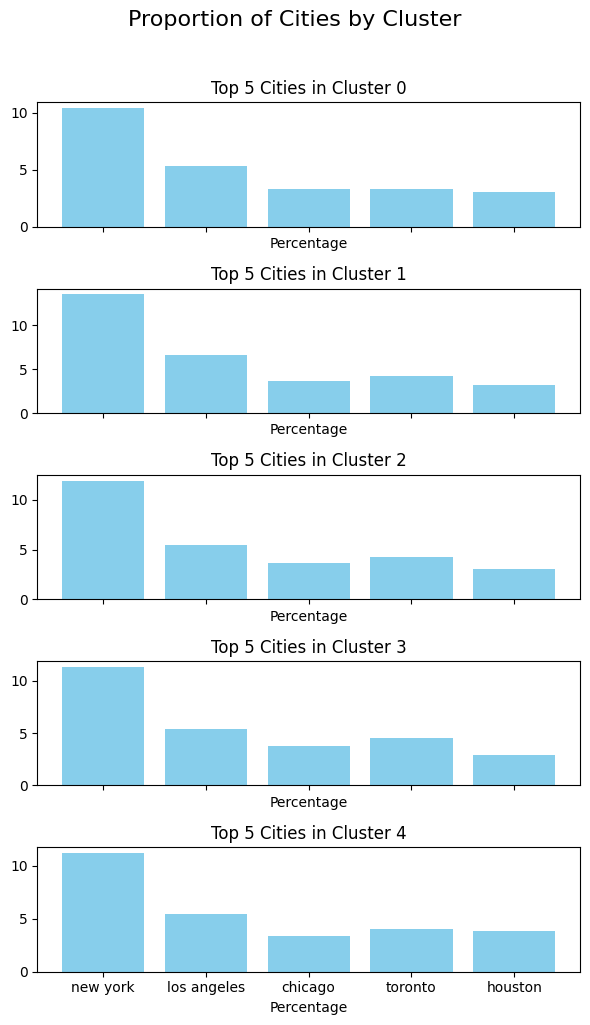

In [ ]:
# Choose the number of top cities to display for each cluster
top_n = 5

# Sort clusters
sorted_clusters = sorted(demographics['cluster'].unique())

# Create a figure
fig, axes = plt.subplots(len(sorted_clusters), 1, figsize=(6, len(sorted_clusters) * 2), sharex=True)


for idx, cluster in enumerate(sorted_clusters):
    cluster_data = demographics[demographics['cluster'] == cluster]

    # Count city occurrences and get top N cities
    city_counts = cluster_data['home_city'].value_counts(normalize=True).head(top_n) * 100

    # Plot bar chart
    axes[idx].bar(city_counts.index, city_counts.values, color='skyblue')
    axes[idx].set_title(f'Top {top_n} Cities in Cluster {cluster}')
    axes[idx].set_xlabel('Percentage')



# Adjust layout
fig.suptitle('Proportion of Cities by Cluster', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Choose the number of top cities to display for each cluster
top_n = 5

# List to store the data for the table
table_data = []

# Sort clusters
sorted_clusters = sorted(demographics['cluster'].unique())

# Loop through each cluster to calculate top cities and their percentages
for cluster in sorted_clusters:
    cluster_data = demographics[demographics['cluster'] == cluster]

    # Count city occurrences and get top N cities (normalize to percentages)
    city_counts = cluster_data['home_city'].value_counts(normalize=True).head(top_n) * 100

    # Append the results for each city
    for city, percentage in city_counts.items():
        table_data.append([cluster, city, round(percentage, 2)])

# Create a DataFrame with the data
table_df = pd.DataFrame(table_data, columns=['Cluster', 'City', 'Percentage'])

# Display the resulting DataFrame
table_df


Cluster         City  Percentage
0         0     new york       10.40
1         0  los angeles        5.30
2         0      chicago        3.35
3         0      toronto        3.33
4         0      houston        3.04
5         1     new york       13.47
6         1  los angeles        6.61
7         1      toronto        4.18
8         1      chicago        3.66
9         1      houston        3.18
10        2     new york       11.91
11        2  los angeles        5.50
12        2      toronto        4.20
13        2      chicago        3.67
14        2      houston        3.06
15        3     new york       11.31
16        3  los angeles        5.35
17        3      toronto        4.56
18        3      chicago        3.80
19        3      houston        2.95
20        4     new york       11.19
21        4  los angeles        5.41
22        4      toronto        4.03
23        4      houston        3.82
24        4      chicago        3.39

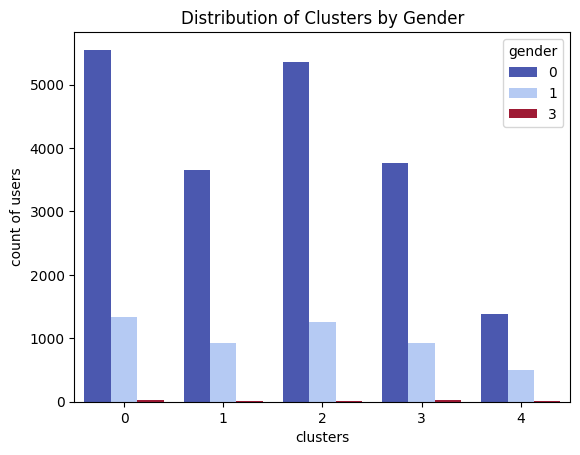

In [ ]:
# 'Distribution of Clusters by Gender'
sns.countplot(data=demographics, x='cluster',hue='gender', palette='coolwarm')
plt.title('Distribution of Clusters by Gender')
plt.ylabel('count of users')
plt.xlabel('clusters')
plt.show()


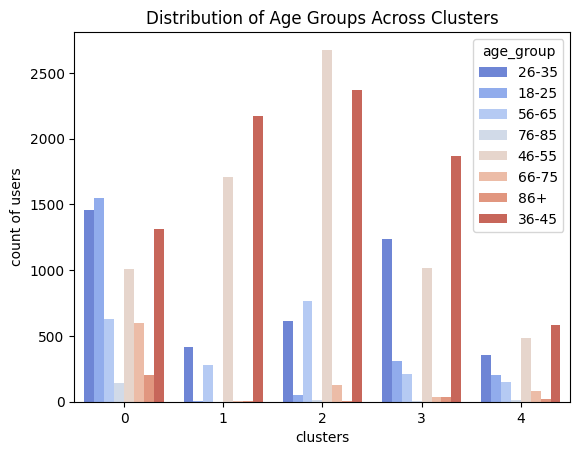

In [ ]:
#Distribution of Age Groups Across Clusters
sns.countplot(data=demographics, x='cluster', hue='age_group', palette='coolwarm')
plt.title('Distribution of Age Groups Across Clusters')
plt.ylabel('count of users')
plt.xlabel('clusters')
plt.show()


<ipython-input-39-ebf0cb8016ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=demographics, x='cluster', y='age_in_years_with_months', palette='viridis')


Text(0.5, 1.0, 'Age Distribution Within Clusters')

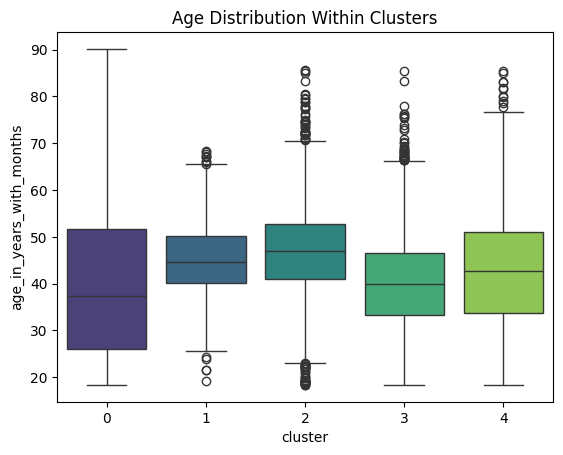

In [ ]:
#Age Distribution Within Clusters
sns.boxplot(data=demographics, x='cluster', y='age_in_years_with_months', palette='viridis')
plt.title('Age Distribution Within Clusters')

Text(0.5, 1.0, 'Marital Status Across Clusters')

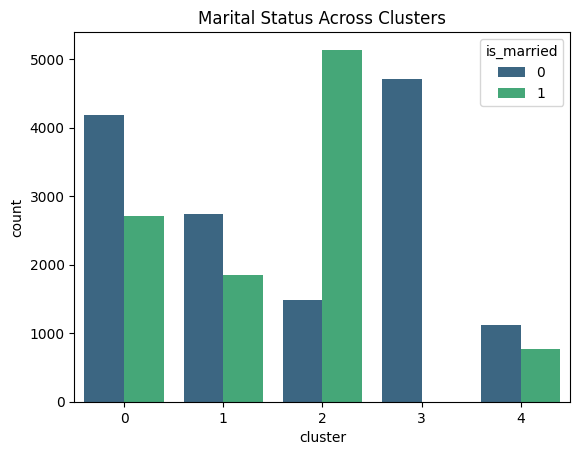

In [ ]:
#Marital Status Across Clusters
sns.countplot(data=demographics, x='cluster', hue='is_married', palette='viridis')
plt.title('Marital Status Across Clusters')


Text(0.5, 1.0, 'Has Children Across Clusters')

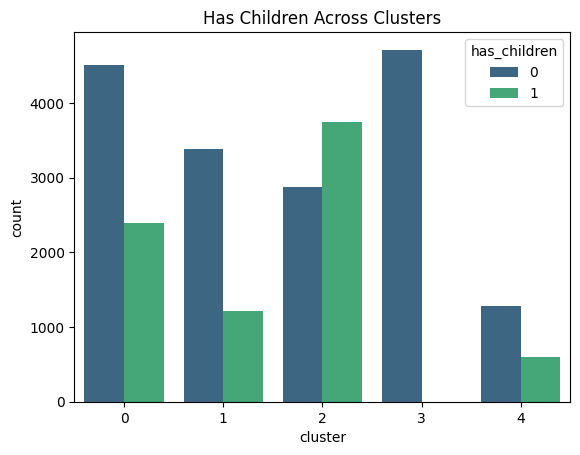

In [ ]:
# Has Children Across Clusters
sns.countplot(data=demographics, x='cluster', hue='has_children', palette='viridis')
plt.title('Has Children Across Clusters')

Text(0.5, 1.0, 'Family Status Across Clusters')

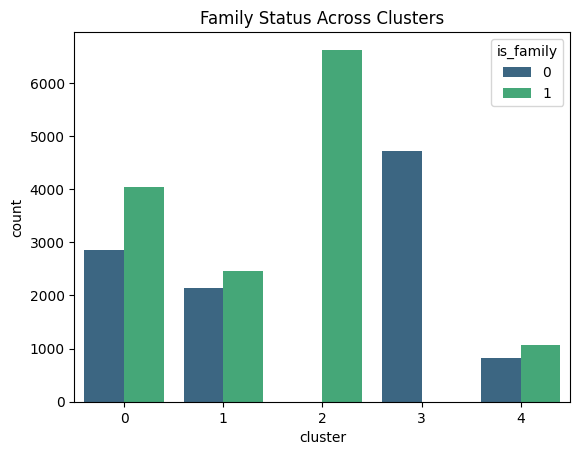

In [ ]:
# Family Status Across Clusters
sns.countplot(data=demographics, x='cluster', hue='is_family', palette='viridis')
plt.title('Family Status Across Clusters')

In [ ]:
customers


user_id  gender home_country    home_city home_airport  \
0         3468       0          usa     new york          JFK   
1         4605       0          usa     columbus          CMH   
2         6402       0       canada      toronto          YKZ   
3        23557       0          usa     new york          LGA   
4        26878       0          usa     honolulu          HNL   
...        ...     ...          ...          ...          ...   
24719   877109       0          usa      detroit          DTW   
24720   877947       0          usa   sacramento          MCC   
24721   878375       0          usa  kansas city          MCI   
24722   879692       0          usa      chicago          MDW   
24723   904168       0          usa      seattle          SEA   

       days_since_signed_up  has_children  is_married  is_family  \
0                      1444             0           1          1   
1                      1439             1           1          1   
2                      1433             0           0          0   
3                      1391             0           1          1   
4                      1384             0           0          0   
...                     ...           ...         ...        ...   
24719                   714             0           1          1   
24720                   714             0           1          1   
24721                   714             0           1          1   
24722                   713             0           0          0   
24723                   705             1           0          1   

       age_in_years_with_months age_group  total_num_sessions  \
0                         40.00     36-45                   7   
1                         27.83     26-35                   7   
2                         18.83     18-25                   7   
3                         66.42     66-75                   8   
4                         19.17     18-25                   7   
...                         ...       ...                 ...   
24719                     47.08     46-55                   7   
24720                     55.67     46-55                   7   
24721                     49.75     46-55                   7   
24722                     70.00     66-75                   7   
24723                     18.75     18-25                   7   

       total_trips_booked  total_canceled_trips  \
0                       3                     0   
1                       0                     0   
2                       1                     0   
3                       2                     0   
4                       1                     0   
...                   ...                   ...   
24719                   1                     0   
24720                   1                     1   
24721                   2                     0   
24722                   0                     0   
24723                   1                     0   

       total_session_duration_in_min  total_page_clicks  \
0                              12.95                105   
1                               7.62                 61   
2                               9.79                 79   
3                              10.21                 82   
4                               9.65                 77   
...                              ...                ...   
24719                           9.27                 73   
24720                         132.79                303   
24721                           9.56                 77   
24722                           5.51                 45   
24723                          11.46                 92   

       total_num_flight_discount  total_flight_discount_amount  \
0                              1                      0.150000   
1                              0                      0.000000   
2                              1                      0.050000   
3                              0          

In [ ]:
demographics['num_seats']=customers['num_seats']

demographics.groupby('cluster').agg({'is_married':lambda x: x.mode()[0] if not x.mode().empty else None,'has_children':lambda x: x.mode()[0] if not x.mode().empty else None,'is_family':lambda x: x.mode()[0] if not x.mode().empty else None,'num_seats':'sum'})


<ipython-input-44-119d3c27c828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics['num_seats']=customers['num_seats']


is_married  has_children  is_family  num_seats
cluster                                                
0                 0             0          1       3851
1                 0             0          1      23143
2                 1             1          1      17225
3                 0             0          0      12577
4                 0             0          1       3166

In [ ]:
demographics.groupby('cluster').agg({'user_id':'count','is_married':'sum','has_children':'sum','is_family':'sum','num_seats':'mean'})


user_id  is_married  has_children  is_family  num_seats
cluster                                                         
0           6904        2716          2400       4046   0.557793
1           4596        1854          1211       2455   5.035466
2           6624        5136          3745       6624   2.600393
3           4714           0             0          0   2.668010
4           1886         771           598       1061   1.678685

In [ ]:
# Group by 'cluster' and calculate percentages
def calculate_percentage(series):
    return (series.value_counts(normalize=True) * 100).to_dict()

result = demographics.groupby('cluster').agg({
    'is_married': lambda x: calculate_percentage(x),
    'has_children': lambda x: calculate_percentage(x),
    'is_family': lambda x: calculate_percentage(x),
    'num_seats': 'mean'
}).reset_index()

# Display the result
result

cluster                                      is_married  \
0        0  {0: 60.660486674391656, 1: 39.339513325608344}   
1        1    {0: 59.66057441253264, 1: 40.33942558746737}   
2        2   {1: 77.53623188405797, 0: 22.463768115942027}   
3        3                                      {0: 100.0}   
4        4    {0: 59.11983032873807, 1: 40.88016967126193}   

                                    has_children  \
0  {0: 65.23754345307069, 1: 34.762456546929315}   
1   {0: 73.65100087032201, 1: 26.34899912967798}   
2   {1: 56.53683574879227, 0: 43.46316425120773}   
3                                     {0: 100.0}   
4   {0: 68.29268292682927, 1: 31.70731707317073}   

                                        is_family  num_seats  
0  {1: 58.603707995365006, 0: 41.396292004634994}   0.557793  
1  {1: 53.416013925152306, 0: 46.583986074847694}   5.035466  
2                                      {1: 100.0}   2.600393  
3                                      {0: 100.0}   2.668010  
4   {1: 56.256627783669146, 0: 43.74337221633086}   1.678685

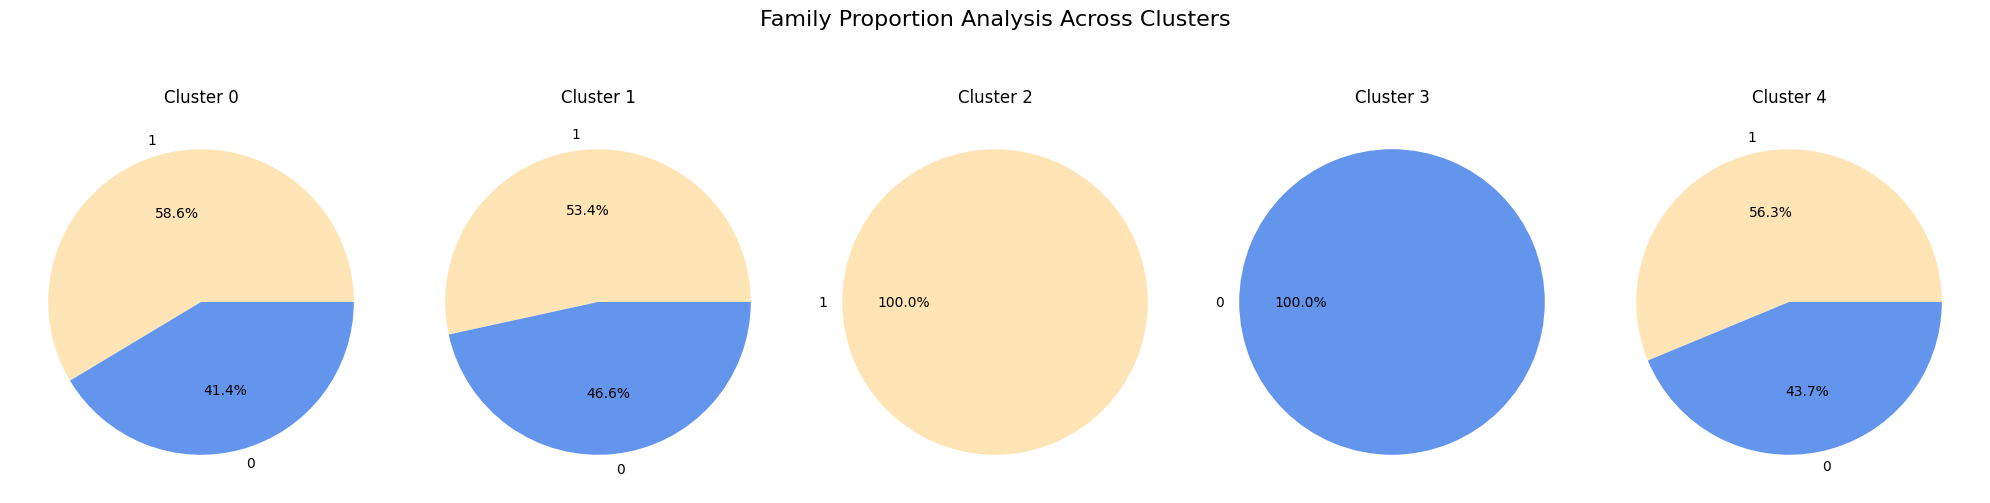

In [ ]:
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(demographics['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Define a fixed color map for is_family values
color_map = {0: 'cornflowerblue', 1: 'moccasin'}  # Define colors for 0 and 1

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for idx, cluster in enumerate(sorted_clusters):
    cluster_data = demographics[demographics['cluster'] == cluster]
    gender_counts = cluster_data['is_family'].value_counts()

    # Map colors based on the value of is_family
    colors = [color_map[value] for value in gender_counts.index]

    # Create the pie chart with fixed colors
    axes[idx].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
    axes[idx].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Family Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


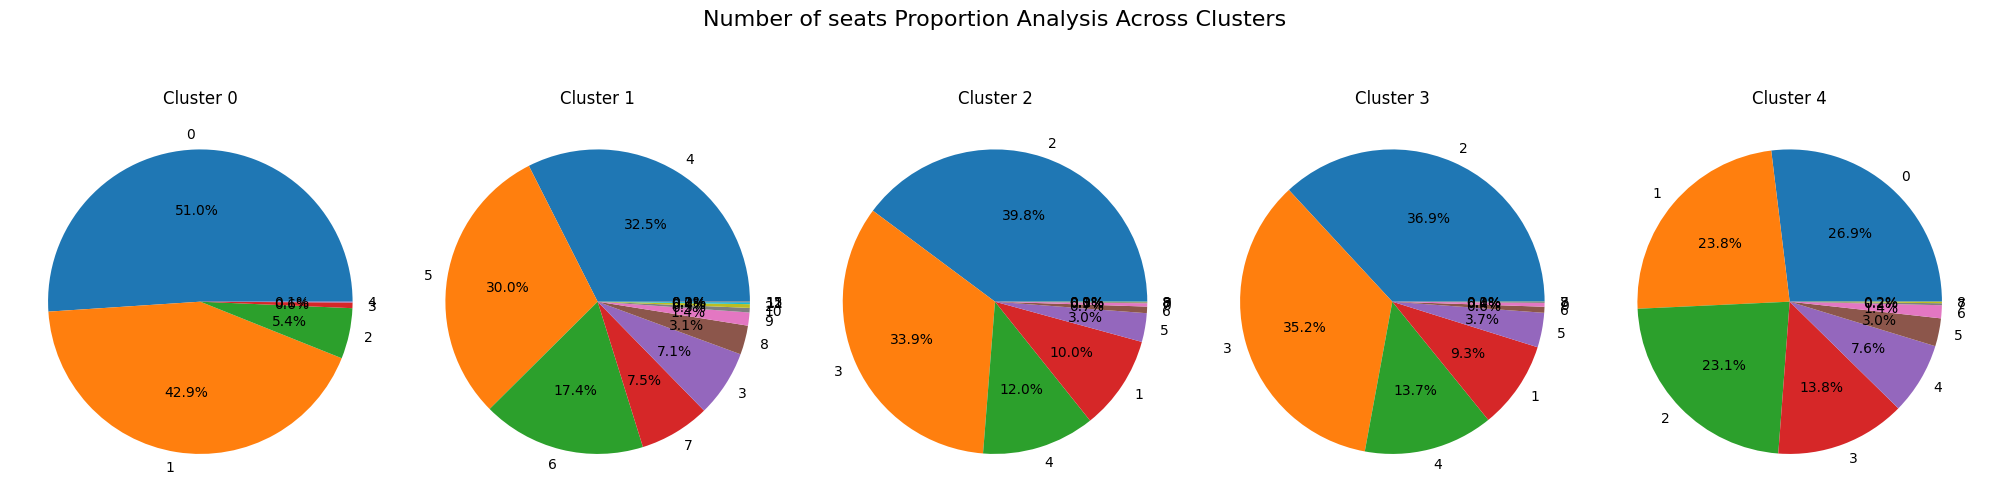

In [ ]:
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(demographics['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for idx, cluster in enumerate(sorted_clusters):
    cluster_data = demographics[demographics['cluster'] == cluster]
    gender_counts = cluster_data['num_seats'].value_counts()



    # Create the pie chart with fixed colors
    axes[idx].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
    axes[idx].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Number of seats Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


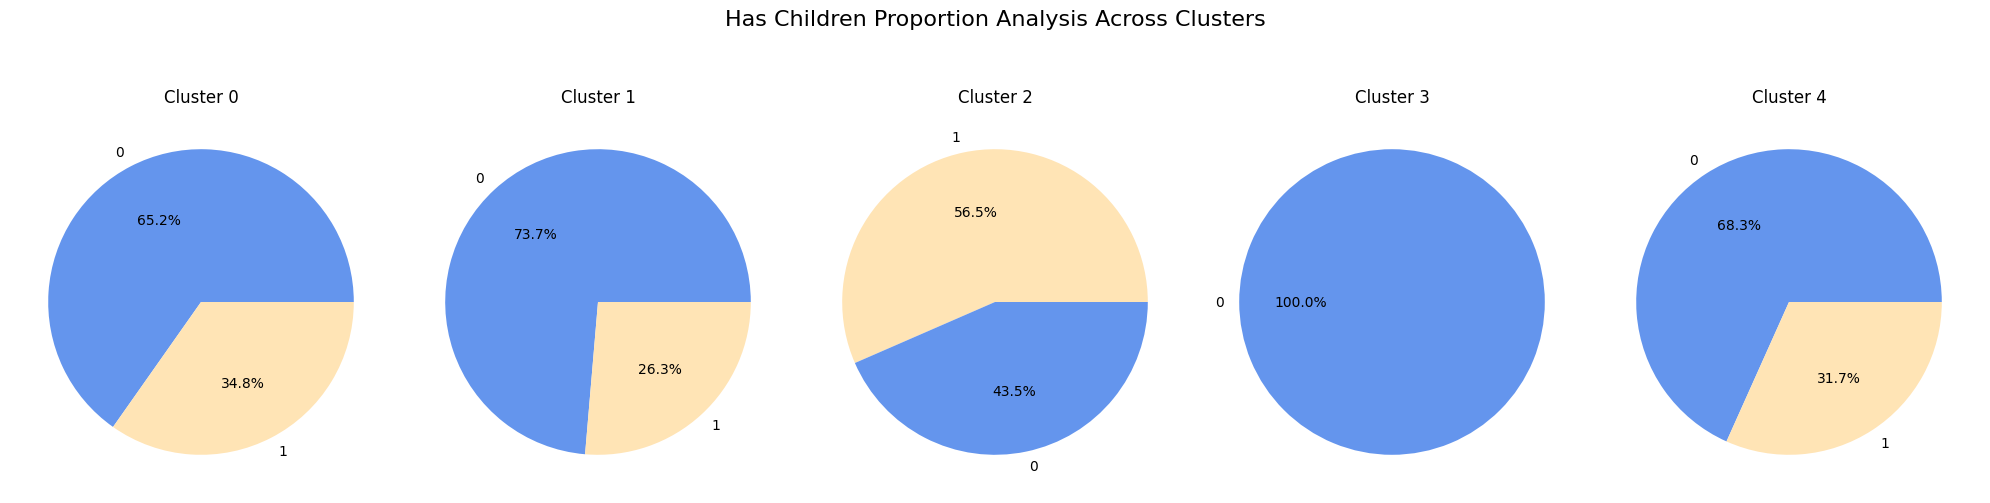

In [ ]:
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(demographics['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Define a fixed color map for has_children values
color_map = {0: 'cornflowerblue', 1: 'moccasin'}  # Define colors for 0 and 1

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for idx, cluster in enumerate(sorted_clusters):
    cluster_data = demographics[demographics['cluster'] == cluster]
    gender_counts = cluster_data['has_children'].value_counts()

    # Map colors based on the value of has_children
    colors = [color_map[value] for value in gender_counts.index]

    # Create the pie chart with fixed colors
    axes[idx].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
    axes[idx].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Has Children Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


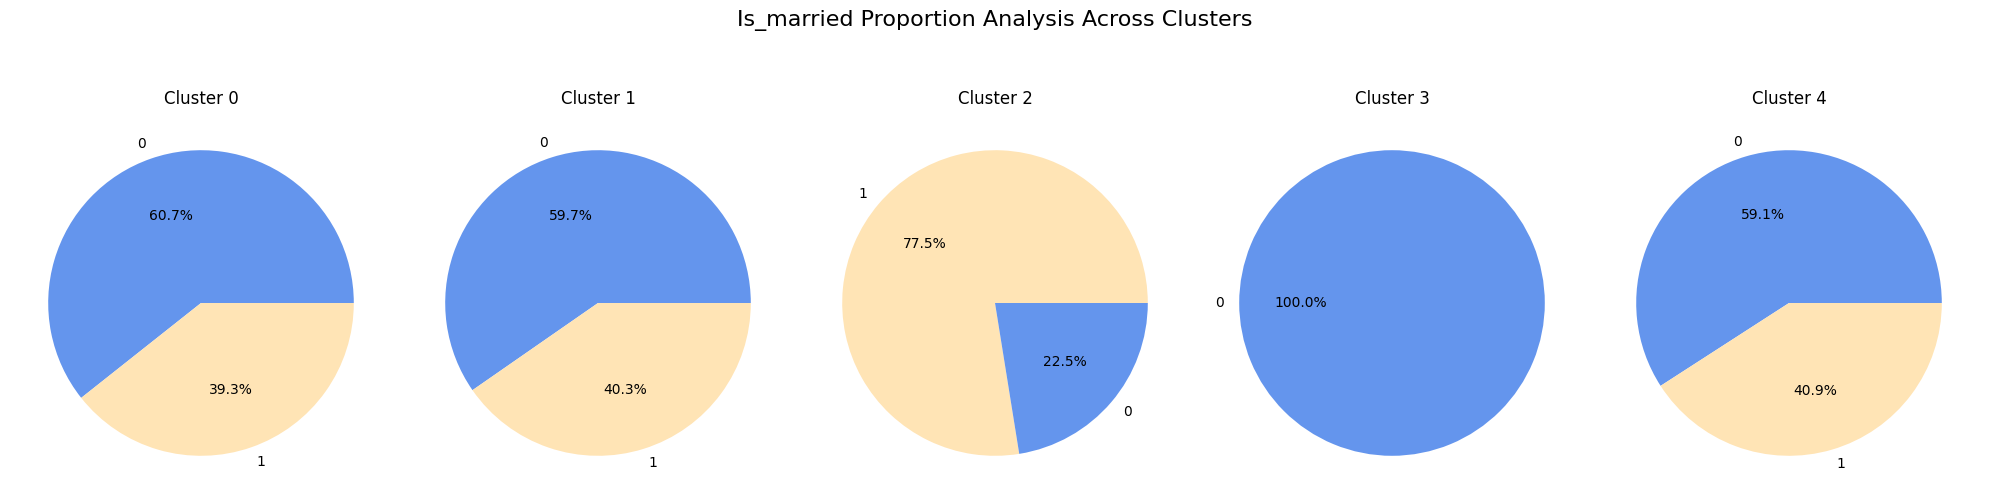

In [ ]:
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(demographics['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Define a fixed color map for has_children values
color_map = {0: 'cornflowerblue', 1: 'moccasin'}  # Define colors for 0 and 1

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for idx, cluster in enumerate(sorted_clusters):
    cluster_data = demographics[demographics['cluster'] == cluster]
    gender_counts = cluster_data['is_married'].value_counts()

    # Map colors based on the value of has_children
    colors = [color_map[value] for value in gender_counts.index]

    # Create the pie chart with fixed colors
    axes[idx].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
    axes[idx].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Is_married Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


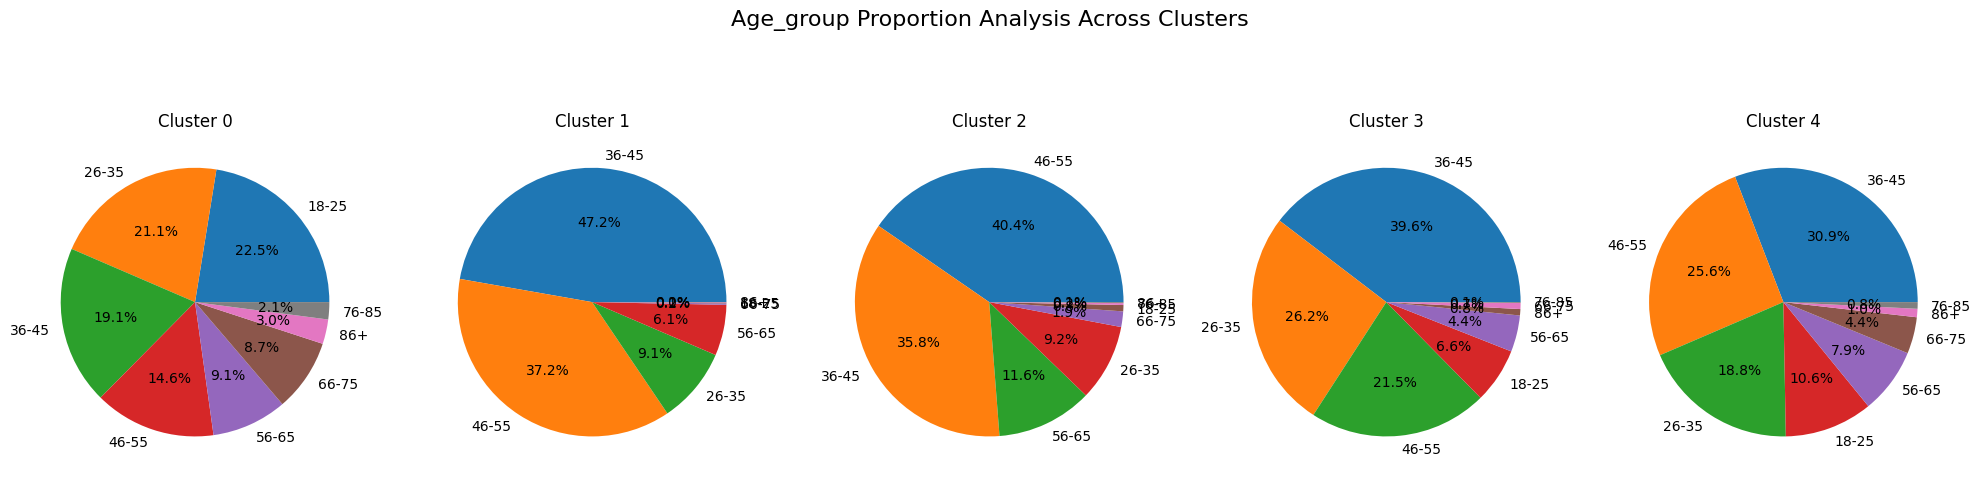

In [ ]:

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(demographics['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for idx, cluster in enumerate(sorted_clusters):
    cluster_data = demographics[demographics['cluster'] == cluster]
    gender_counts = cluster_data['age_group'].value_counts()

    axes[idx].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
    axes[idx].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Age_group Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

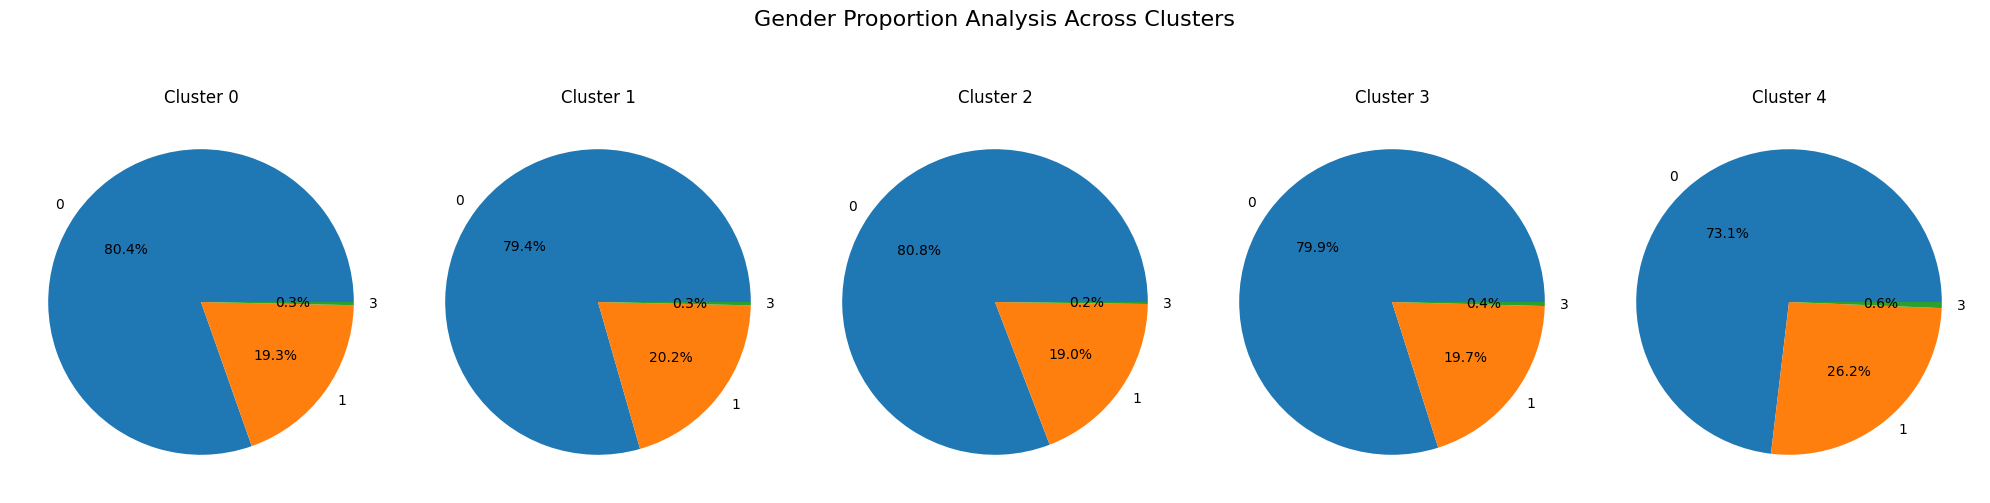

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(demographics['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for idx, cluster in enumerate(sorted_clusters):
    cluster_data = demographics[demographics['cluster'] == cluster]
    gender_counts = cluster_data['gender'].value_counts()

    axes[idx].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
    axes[idx].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Gender Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
#City Distribution
#sns.countplot(data=demographics, x='cluster', hue='home_city', palette='husl')

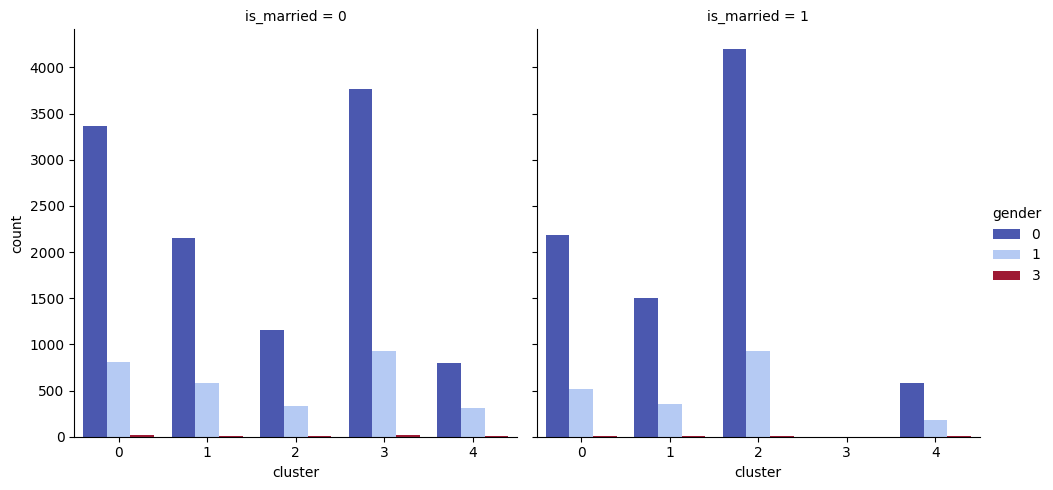

In [ ]:
sns.catplot(data=demographics, x='cluster', hue='gender', col='is_married', kind='count', palette='coolwarm')


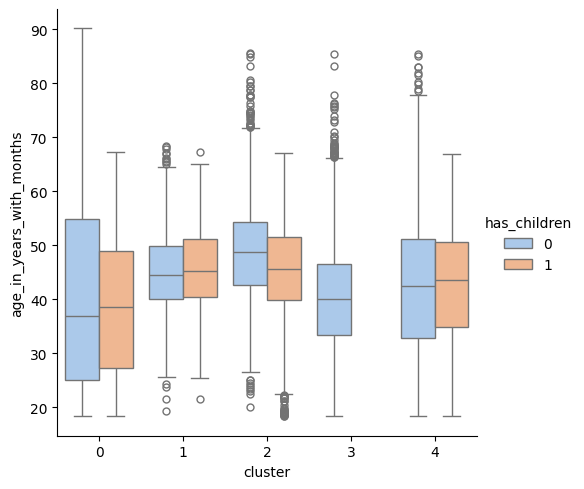

In [ ]:
sns.catplot(data=demographics, x='cluster', y='age_in_years_with_months', hue='has_children', kind='box', palette='pastel')


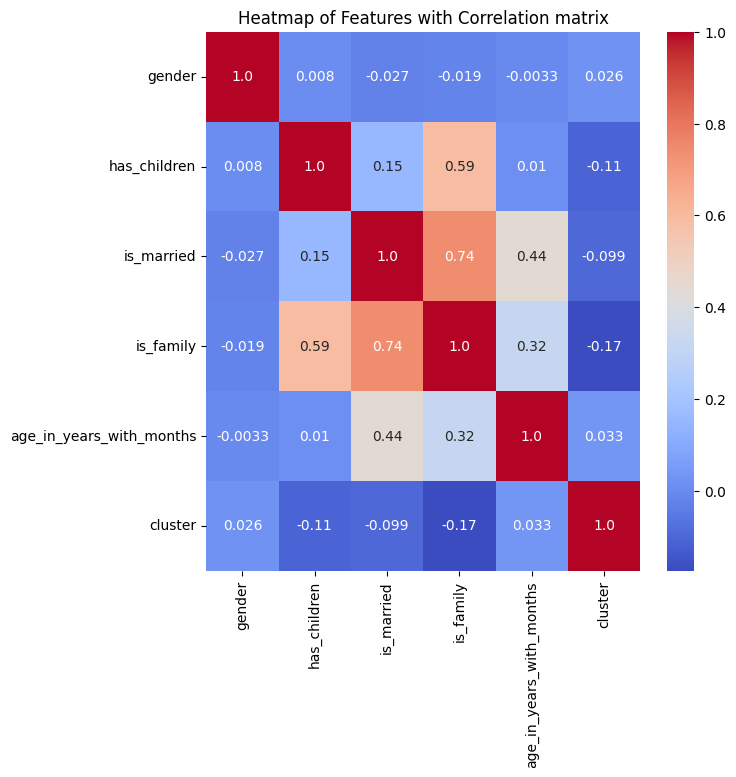

In [ ]:
#Correlation betwenn the numerical features
# Exclude non-numerical columns

demo=demographics[['gender','has_children','is_married','is_family','age_in_years_with_months','cluster']]
corrdemo = demo.corr()

plt.figure(figsize = (7,7))
sns.heatmap(corrdemo, annot = True, cmap = 'coolwarm', fmt = ".2", annot_kws={"size": 10})
plt.title("Heatmap of Features with Correlation matrix")
plt.show()

###2) Activity Metrics

In [ ]:
activity=customers[['total_num_sessions','total_session_duration_in_min','total_page_clicks','total_trips_booked','total_canceled_trips','cluster']]
activity

total_num_sessions  total_session_duration_in_min  total_page_clicks  \
0                       7                          12.95                105   
1                       7                           7.62                 61   
2                       7                           9.79                 79   
3                       8                          10.21                 82   
4                       7                           9.65                 77   
...                   ...                            ...                ...   
24719                   7                           9.27                 73   
24720                   7                         132.79                303   
24721                   7                           9.56                 77   
24722                   7                           5.51                 45   
24723                   7                          11.46                 92   

       total_trips_booked  total_canceled_trips  cluster  
0                       3                     0        2  
1                       0                     0        0  
2                       1                     0        0  
3                       2                     0        2  
4                       1                     0        0  
...                   ...                   ...      ...  
24719                   1                     0        0  
24720                   1                     1        4  
24721                   2                     0        2  
24722                   0                     0        0  
24723                   1                     0        0  

[24724 rows x 6 columns]

In [ ]:
activity.groupby('cluster').agg({'total_num_sessions':{'mean','median'},'total_session_duration_in_min':{'mean','median'},'total_page_clicks':{'mean','median'},'total_trips_booked':{'mean','median'},'total_canceled_trips':{'mean','median'}})

total_num_sessions           total_session_duration_in_min  \
                    median      mean                        median   
cluster                                                              
0                      7.0  7.253911                        10.780   
1                      7.0  7.371845                        17.260   
2                      7.0  7.278684                        13.740   
3                      7.0  7.255197                        14.060   
4                      7.0  7.378579                       130.715   

                    total_page_clicks             total_trips_booked  \
               mean            median        mean             median   
cluster                                                                
0         11.636262              86.0   92.471611                1.0   
1         18.229010             139.0  144.449304                4.0   
2         14.412589             111.0  116.078200                3.0   
3         14.636328             113.0  117.897751                3.0   
4        113.718680             288.0  287.674443                3.0   

                  total_canceled_trips            
             mean               median      mean  
cluster                                           
0        0.842265                  0.0  0.006952  
1        4.498042                  0.0  0.008486  
2        2.658514                  0.0  0.000755  
3        2.714255                  0.0  0.000636  
4        2.740191                  1.0  1.018558

In [ ]:
activity.groupby(['cluster','total_num_sessions']).mean()

total_session_duration_in_min  total_page_clicks  \
cluster total_num_sessions                                                     
0       7                                       11.330711          89.974136   
        8                                       12.532179          99.843575   
        9                                       13.760185         109.472222   
        10                                      14.969524         120.476190   
        12                                      14.230000         114.000000   
1       7                                       17.553180         139.576171   
        8                                       19.265116         152.644383   
        9                                       21.338333         165.294574   
        10                                      25.400556         185.611111   
        11                                      19.195000         154.500000   
2       7                                       14.073405         113.323443   
        8                                       15.286545         123.182685   
        9                                       16.379918         132.049180   
        10                                      18.663448         150.379310   
        11                                      21.910000         177.000000   
3       7                                       14.248173         114.813467   
        8                                       15.808135         127.156751   
        9                                       17.201831         138.556338   
        10                                      17.377333         140.133333   
4       7                                      111.890000         278.855842   
        8                                      117.786368         303.751121   
        9                                      116.817624         317.881188   
        10                                     117.081667         332.055556   
        11                                     187.880000         488.666667   

                            total_trips_booked  total_canceled_trips  
cluster total_num_sessions                                            
0       7                             0.846296              0.007390  
        8                             0.826816              0.005587  
        9                             0.824074              0.004630  
        10                            0.952381              0.000000  
        12                            0.000000              0.000000  
1       7                             4.467267              0.006826  
        8                             4.564531              0.012071  
        9                             4.589147              0.011628  
        10                            4.638889              0.027778  
        11                            4.000000              0.000000  
2       7                             2.651601              0.000983  
        8                             2.703733              0.000000  
        9                             2.594262              0.000000  
        10                            2.482759              0.000000  
        11                            2.333333              0.000000  
3       7                             2.707304              0.000272  
        8                             2.743707              0.002288  
        9                             2.739437              0.000000  
        10                            2.466667              0.000000  
4       7                             2.669196              1.015175  
        8                             2.807175              1.022422  
        9                             3.188119              1.039604  
        10                            3.444444              1.000000  
        11                            4.666667              1.333333

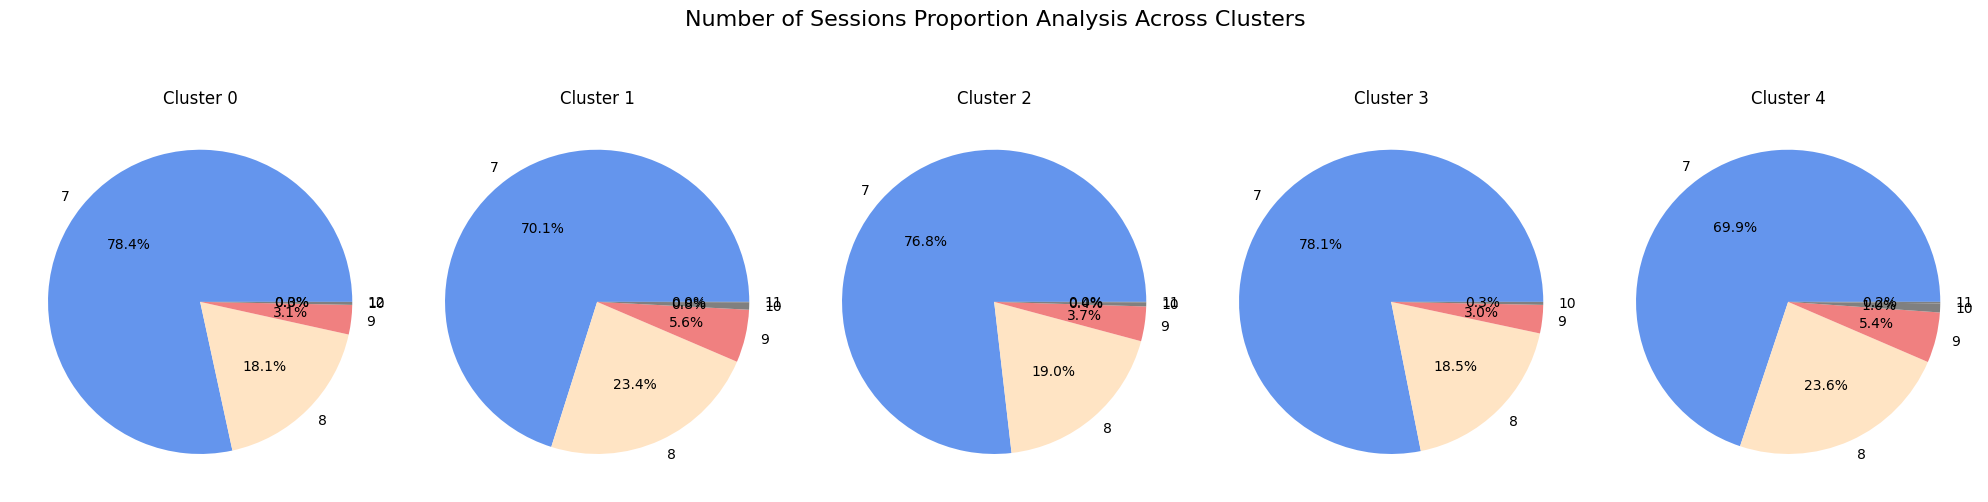

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(activity['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

color_map = {
    7: 'cornflowerblue',
    8: 'bisque',
    9: 'lightcoral',
    4: 'red',
    5: 'purple',

}

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = activity[activity['cluster'] == cluster]
    session_counts = cluster_data['total_num_sessions'].value_counts()
    # Map colors based on the session value
    colors = [color_map.get(value, 'gray') for value in session_counts.index]  # Default to 'gray' if value is not in color_map

    axes[i].pie(session_counts, labels=session_counts.index, autopct='%1.1f%%',colors=colors)
    axes[i].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Number of Sessions Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

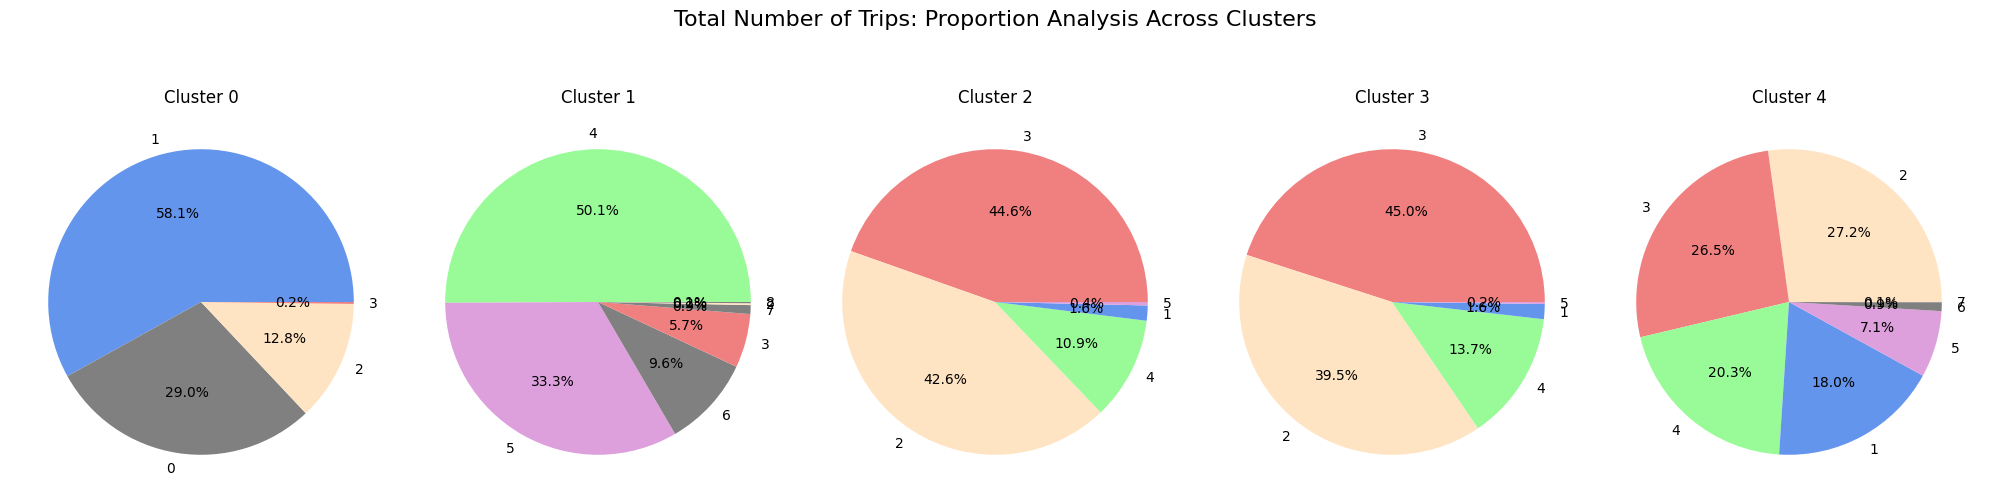

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(activity['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

color_map = {
    1: 'cornflowerblue',
    2: 'bisque',
    3: 'lightcoral',
    4: 'palegreen',
    5: 'plum',

}

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = activity[activity['cluster'] == cluster]
    session_counts = cluster_data['total_trips_booked'].value_counts()
    # Map colors based on the session value
    colors = [color_map.get(value, 'gray') for value in session_counts.index]  # Default to 'gray' if value is not in color_map

    axes[i].pie(session_counts, labels=session_counts.index, autopct='%1.1f%%',colors=colors)
    axes[i].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Total Number of Trips: Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

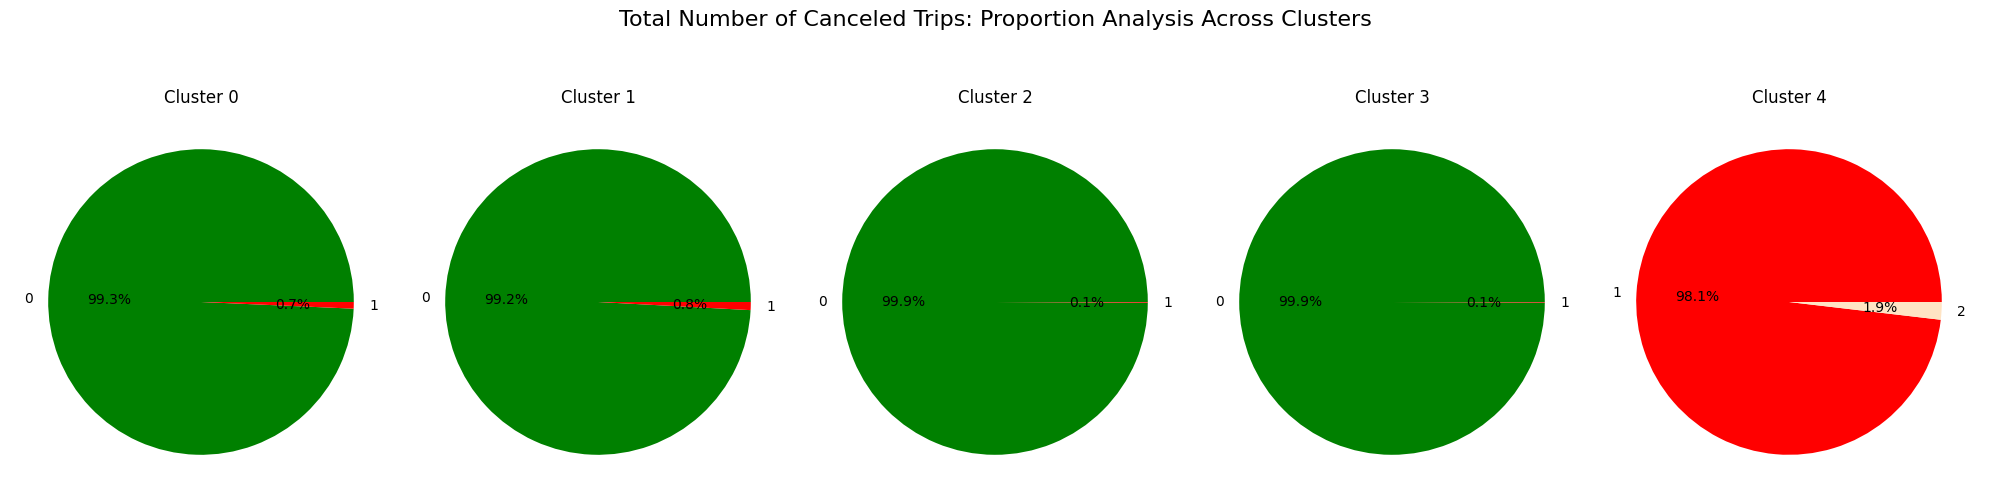

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(activity['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

color_map = {
    1:'red',

    2: 'bisque',
    3: 'lightcoral',
    0: 'green',
    5: 'plum',

}

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = activity[activity['cluster'] == cluster]
    session_counts = cluster_data['total_canceled_trips'].value_counts()
    # Map colors based on the session value
    colors = [color_map.get(value, 'gray') for value in session_counts.index]  # Default to 'gray' if value is not in color_map

    axes[i].pie(session_counts, labels=session_counts.index, autopct='%1.1f%%',colors=colors)
    axes[i].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Total Number of Canceled Trips: Proportion Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

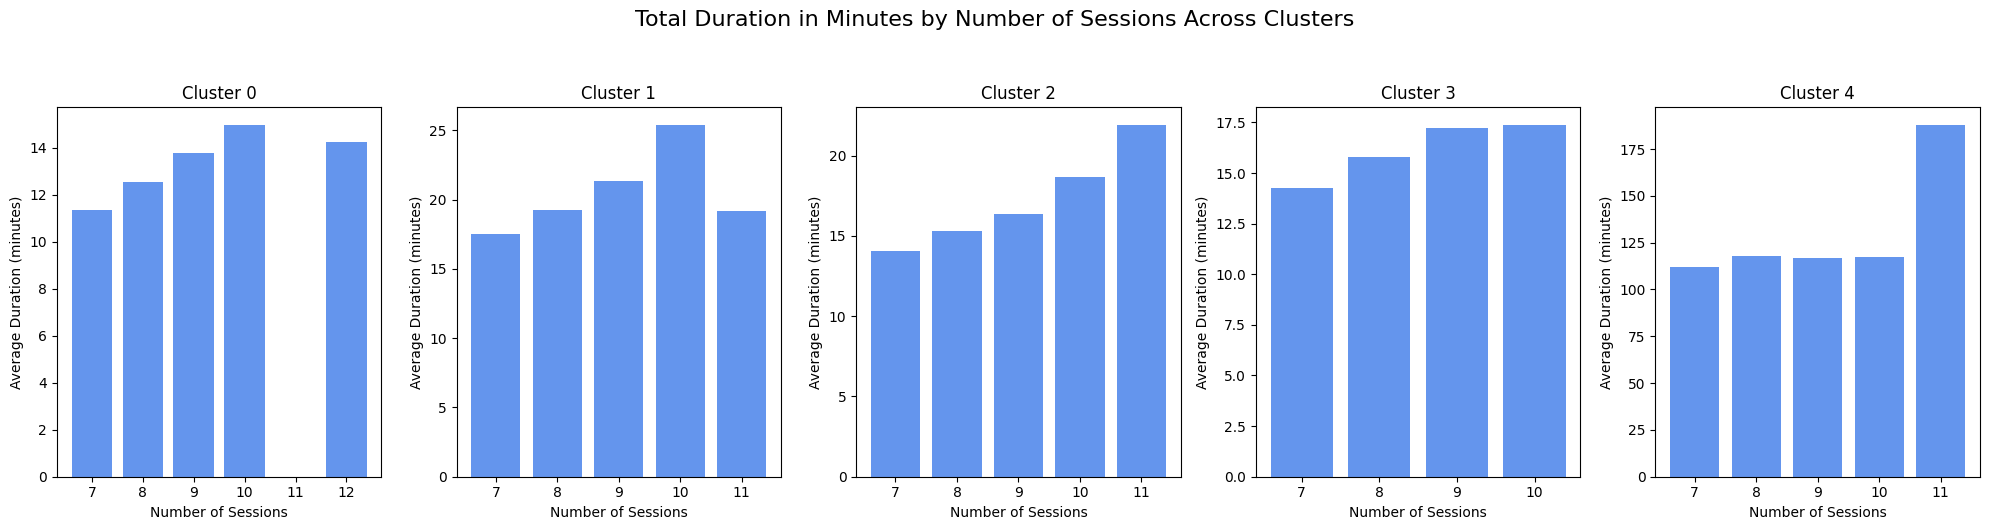

In [ ]:
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(activity['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a bar plot in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = activity[activity['cluster'] == cluster]

    # Calculate total duration in minutes for each session
    duration_sums = cluster_data.groupby('total_num_sessions')['total_session_duration_in_min'].mean()

    # Create the bar plot
    axes[i].bar(duration_sums.index, duration_sums.values, color='cornflowerblue')
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Number of Sessions')
    axes[i].set_ylabel('Average Duration (minutes)')

# Adjust layout for clarity
fig.suptitle('Total Duration in Minutes by Number of Sessions Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


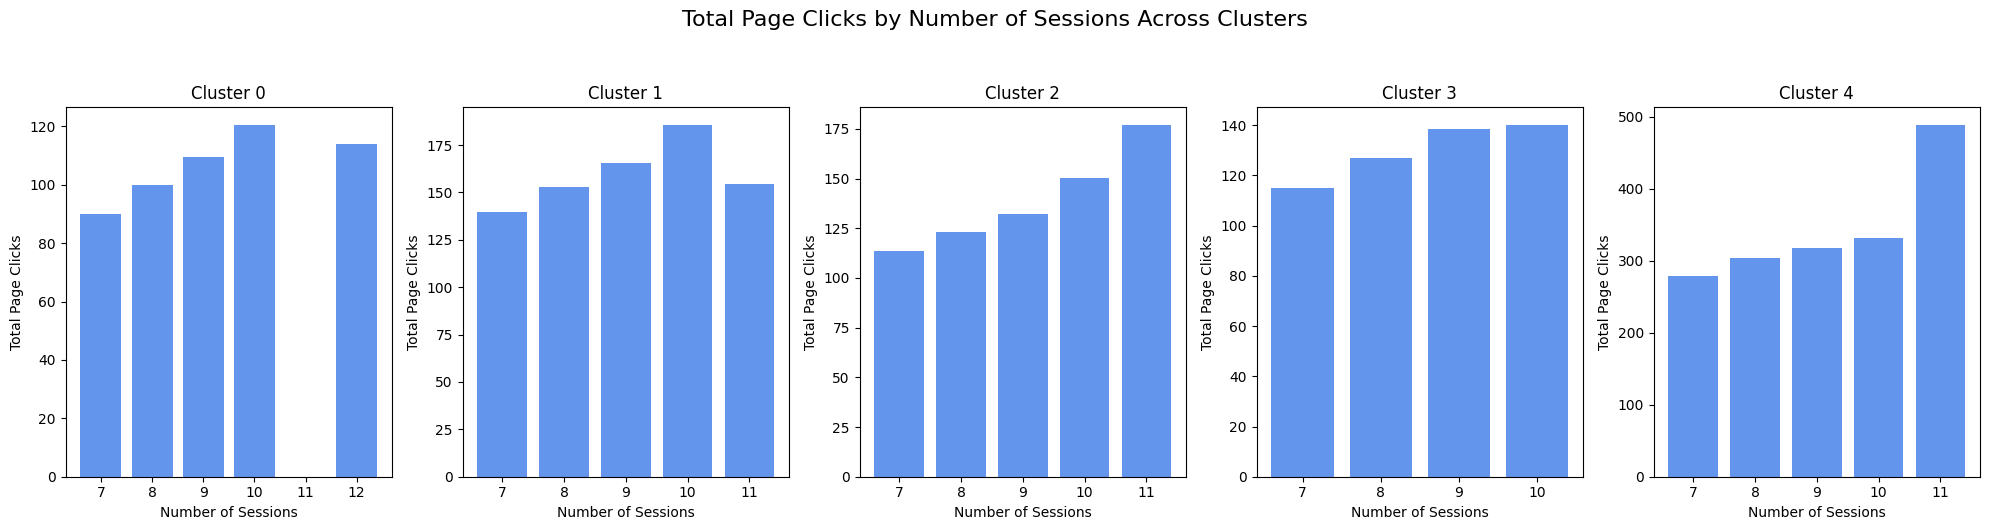

In [ ]:
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(activity['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a bar plot in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = activity[activity['cluster'] == cluster]

    # Calculate total duration in minutes for each session
    duration_sums = cluster_data.groupby('total_num_sessions')['total_page_clicks'].mean()

    # Create the bar plot
    axes[i].bar(duration_sums.index, duration_sums.values, color='cornflowerblue')
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Number of Sessions')
    axes[i].set_ylabel('Total Page Clicks')

# Adjust layout for clarity
fig.suptitle('Total Page Clicks by Number of Sessions Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


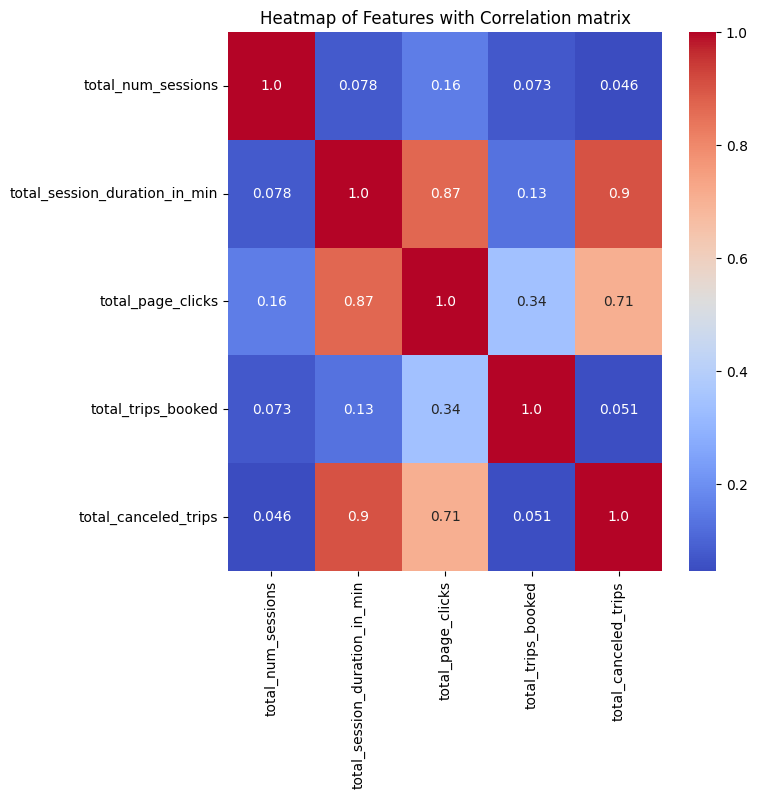

In [ ]:
#Correlation betwenn the numerical features
# Exclude non-numerical columns

act=activity.drop('cluster',axis=1)
corract = act.corr()

plt.figure(figsize = (7,7))
sns.heatmap(corract, annot = True, cmap = 'coolwarm', fmt = ".2", annot_kws={"size": 10})
plt.title("Heatmap of Features with Correlation matrix")
plt.show()

### 3) Flight Reservations

In [ ]:
flights=customers[['total_one_way_flight_booked_aft_cancellation','total_return_flight_booked_aft_cancellation','total_num_flight_discount','total_num_trip_airline','num_seats','num_checked_bags','total_distance_flown_km','cluster']]
flights

total_one_way_flight_booked_aft_cancellation  \
0                                                 3   
1                                                 0   
2                                                 1   
3                                                 0   
4                                                 1   
...                                             ...   
24719                                             1   
24720                                             0   
24721                                             2   
24722                                             0   
24723                                             1   

       total_return_flight_booked_aft_cancellation  total_num_flight_discount  \
0                                                3                          1   
1                                                0                          0   
2                                                1                          1   
3                                                0                          0   
4                                                1                          0   
...                                            ...                        ...   
24719                                            1                          0   
24720                                            0                          2   
24721                                            2                          0   
24722                                            0                          0   
24723                                            1                          0   

       total_num_trip_airline  num_seats  num_checked_bags  \
0                           3          3                 1   
1                           0          0                 0   
2                           1          1                 1   
3                           0          0                 0   
4                           1          1                 0   
...                       ...        ...               ...   
24719                       1          2                 0   
24720                       1          0                 0   
24721                       2          3                 3   
24722                       0          0                 0   
24723                       1          1                 0   

       total_distance_flown_km  cluster  
0                 11808.960200        2  
1                     0.000000        0  
2                  1397.606588        0  
3                     0.000000        2  
4                 12591.187524        0  
...                        ...      ...  
24719              6292.271166        0  
24720                 0.000000        4  
24721              7625.518781        2  
24722                 0.000000        0  
24723              6472.828653        0  

[24724 rows x 8 columns]

In [ ]:
flights.groupby('cluster').mean()

total_one_way_flight_booked_aft_cancellation  \
cluster                                                 
0                                            0.496669   
1                                            4.128155   
2                                            2.231582   
3                                            2.317140   
4                                            1.438494   

         total_return_flight_booked_aft_cancellation  \
cluster                                                
0                                           0.471466   
1                                           3.977154   
2                                           2.126661   
3                                           2.207679   
4                                           1.371686   

         total_num_flight_discount  total_num_trip_airline  num_seats  \
cluster                                                                 
0                         0.141512                0.502173   0.557793   
1                         0.672759                3.624456   5.035466   
2                         0.383001                2.086051   2.600393   
3                         0.415146                2.162495   2.668010   
4                         2.316013                2.221633   1.678685   

         num_checked_bags  total_distance_flown_km  
cluster                                             
0                0.263905              1972.691190  
1                2.458007             18113.903793  
2                1.250906              9212.057278  
3                1.258167              9627.316418  
4                0.775186              5924.893445

In [ ]:
flights.groupby('cluster').median()

total_one_way_flight_booked_aft_cancellation  \
cluster                                                 
0                                                 0.0   
1                                                 4.0   
2                                                 2.0   
3                                                 2.0   
4                                                 1.0   

         total_return_flight_booked_aft_cancellation  \
cluster                                                
0                                                0.0   
1                                                4.0   
2                                                2.0   
3                                                2.0   
4                                                1.0   

         total_num_flight_discount  total_num_trip_airline  num_seats  \
cluster                                                                 
0                              0.0                     0.0        0.0   
1                              1.0                     4.0        5.0   
2                              0.0                     2.0        2.0   
3                              0.0                     2.0        3.0   
4                              2.0                     2.0        1.0   

         num_checked_bags  total_distance_flown_km  
cluster                                             
0                     0.0                 0.000000  
1                     2.0             16933.678372  
2                     1.0              8535.451575  
3                     1.0              8814.132806  
4                     0.0              4690.542780

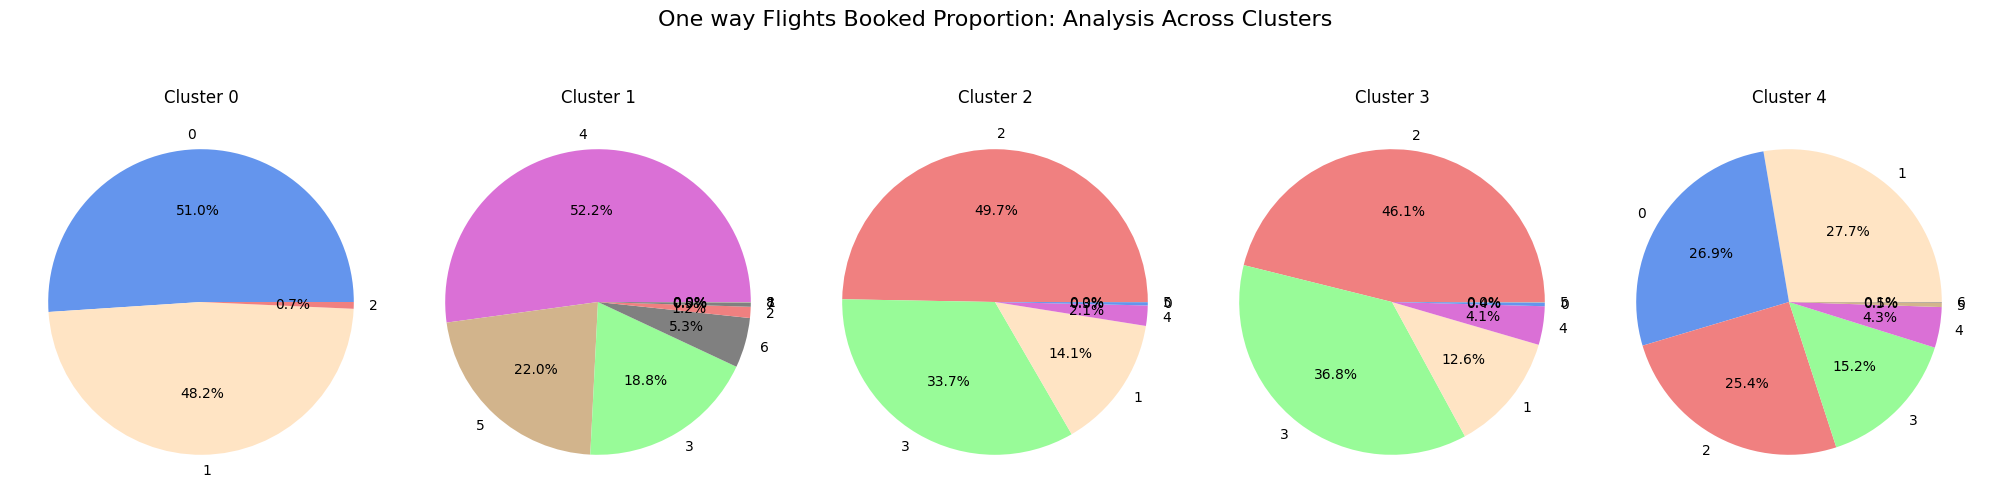

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(activity['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

color_map = {
    0: 'cornflowerblue',
    1: 'bisque',
    2: 'lightcoral',
    3: 'palegreen',
    4: 'orchid',
    5: 'tan'

}

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = flights[flights['cluster'] == cluster]
    flights_counts = cluster_data['total_one_way_flight_booked_aft_cancellation'].value_counts()
    # Map colors based on the session value
    colors = [color_map.get(value, 'gray') for value in flights_counts.index]  # Default to 'gray' if value is not in color_map

    axes[i].pie(flights_counts, labels=flights_counts.index, autopct='%1.1f%%',colors=colors)
    axes[i].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('One way Flights Booked Proportion: Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

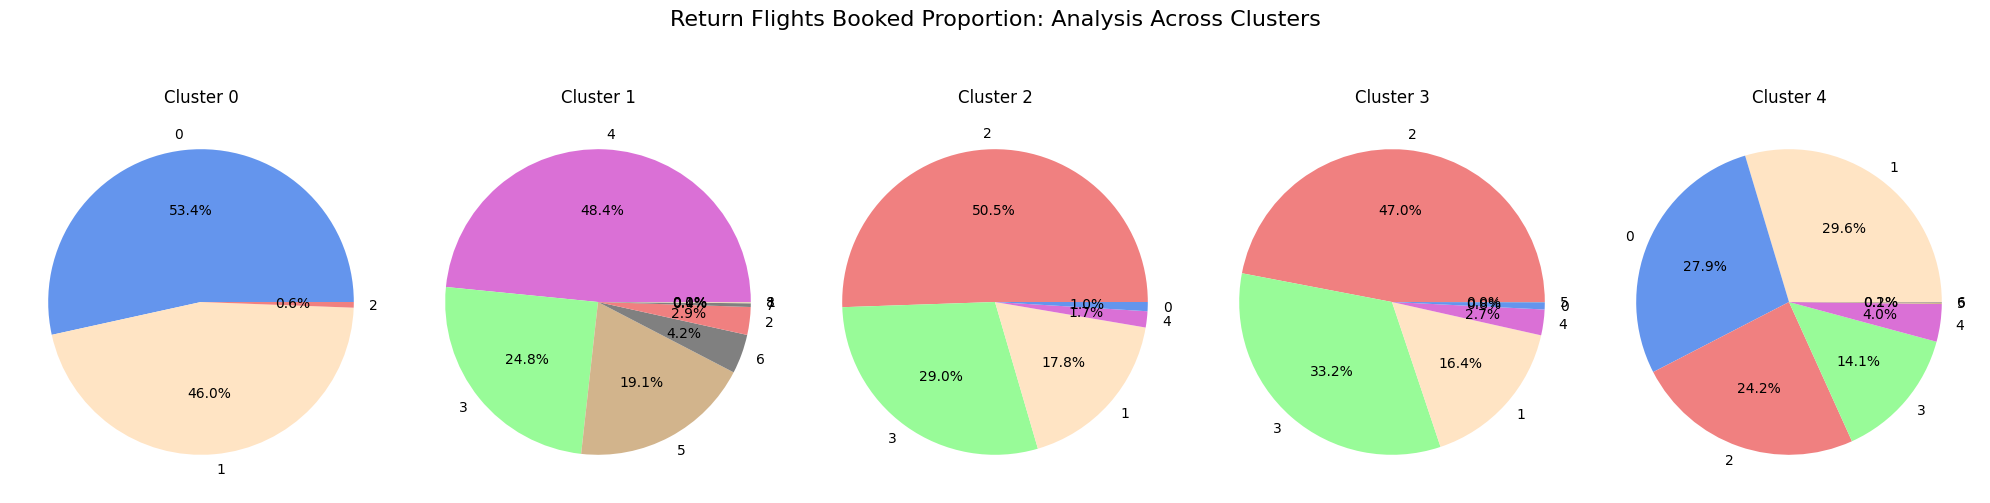

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(activity['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

color_map = {
    0: 'cornflowerblue',
    1: 'bisque',
    2: 'lightcoral',
    3: 'palegreen',
    4: 'orchid',
    5: 'tan'

}

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = flights[flights['cluster'] == cluster]
    flights_counts = cluster_data['total_return_flight_booked_aft_cancellation'].value_counts()
    # Map colors based on the session value
    colors = [color_map.get(value, 'gray') for value in flights_counts.index]  # Default to 'gray' if value is not in color_map

    axes[i].pie(flights_counts, labels=flights_counts.index, autopct='%1.1f%%',colors=colors)
    axes[i].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Return Flights Booked Proportion: Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

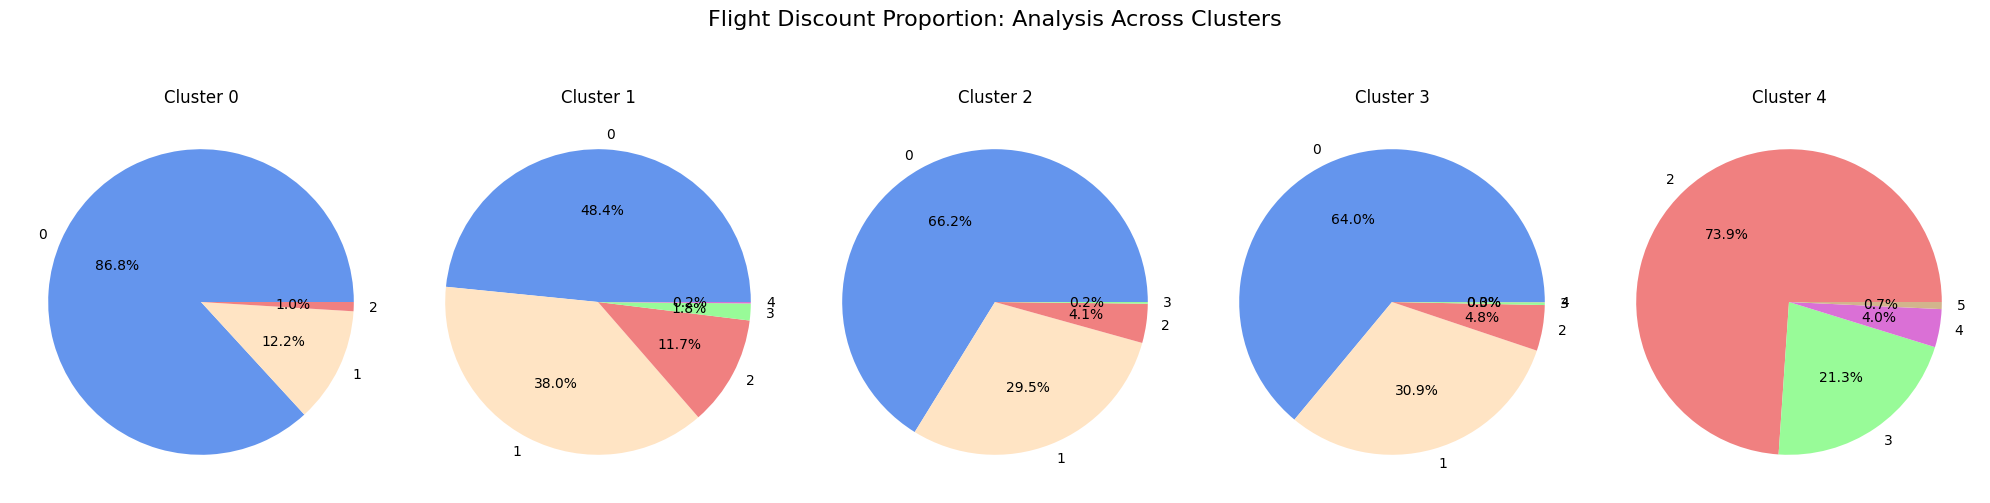

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(flights['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

color_map = {
    0: 'cornflowerblue',
    1: 'bisque',
    2: 'lightcoral',
    3: 'palegreen',
    4: 'orchid',
    5: 'tan'

}

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = flights[flights['cluster'] == cluster]
    flights_counts = cluster_data['total_num_flight_discount'].value_counts()
    # Map colors based on the session value
    colors = [color_map.get(value, 'gray') for value in flights_counts.index]  # Default to 'gray' if value is not in color_map

    axes[i].pie(flights_counts, labels=flights_counts.index, autopct='%1.1f%%',colors=colors)
    axes[i].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Flight Discount Proportion: Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

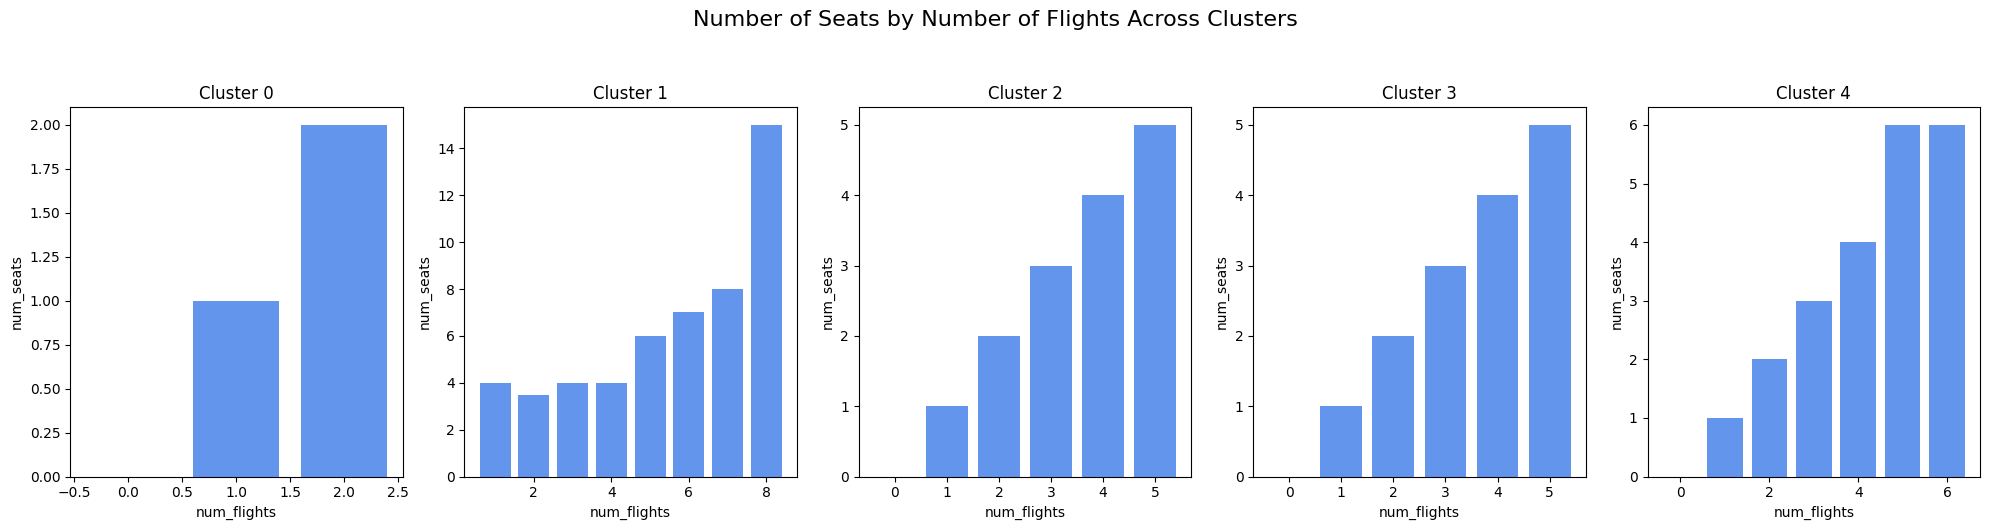

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(flights['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a bar plot in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = flights[flights['cluster'] == cluster]

    # Calculate total duration in minutes for each session
    duration_sums = cluster_data.groupby('total_one_way_flight_booked_aft_cancellation')['num_seats'].median()

    # Create the bar plot
    axes[i].bar(duration_sums.index, duration_sums.values, color='cornflowerblue')
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('num_flights')
    axes[i].set_ylabel('num_seats')

# Adjust layout for clarity
fig.suptitle('Number of Seats by Number of Flights Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


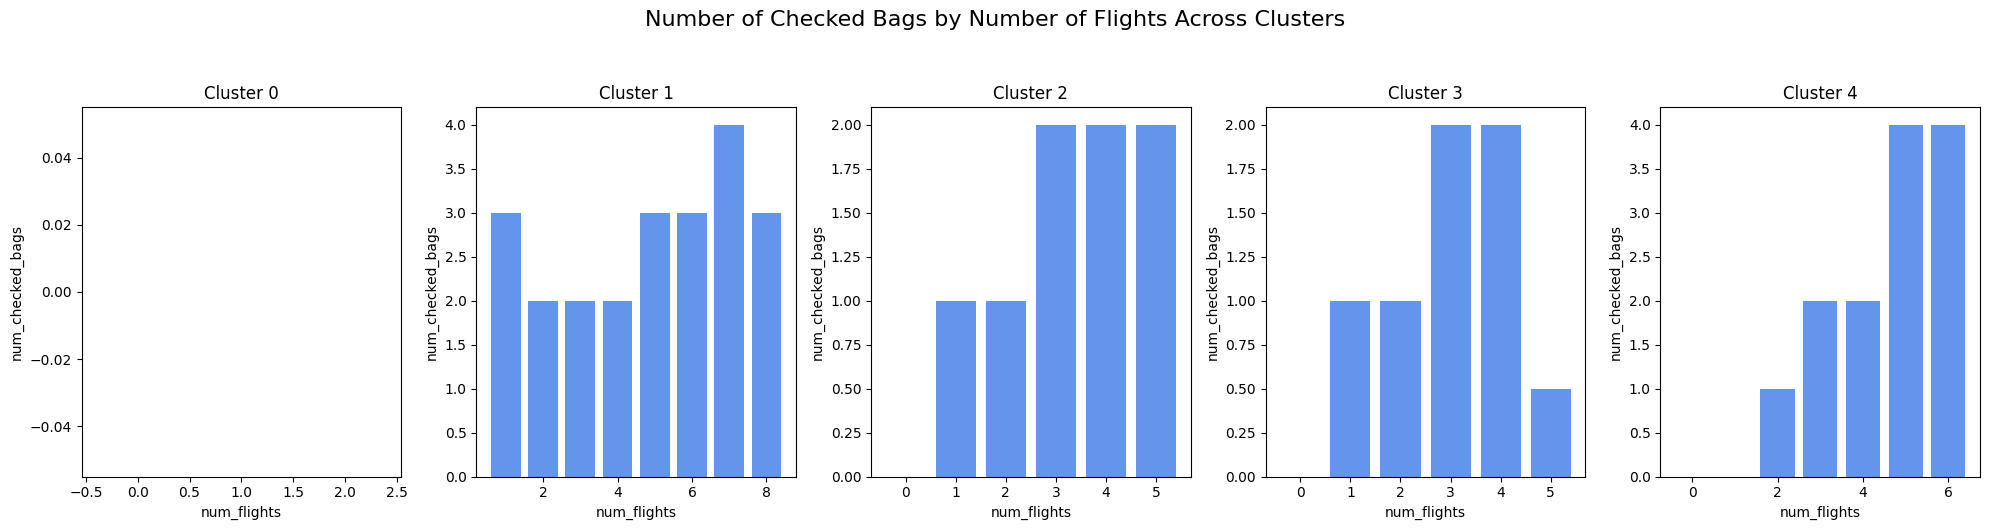

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(flights['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a bar plot in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = flights[flights['cluster'] == cluster]

    # Calculate total duration in minutes for each session
    duration_sums = cluster_data.groupby('total_one_way_flight_booked_aft_cancellation')['num_checked_bags'].median()

    # Create the bar plot
    axes[i].bar(duration_sums.index, duration_sums.values, color='cornflowerblue')
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('num_flights')
    axes[i].set_ylabel('num_checked_bags')

# Adjust layout for clarity
fig.suptitle('Number of Checked Bags by Number of Flights Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


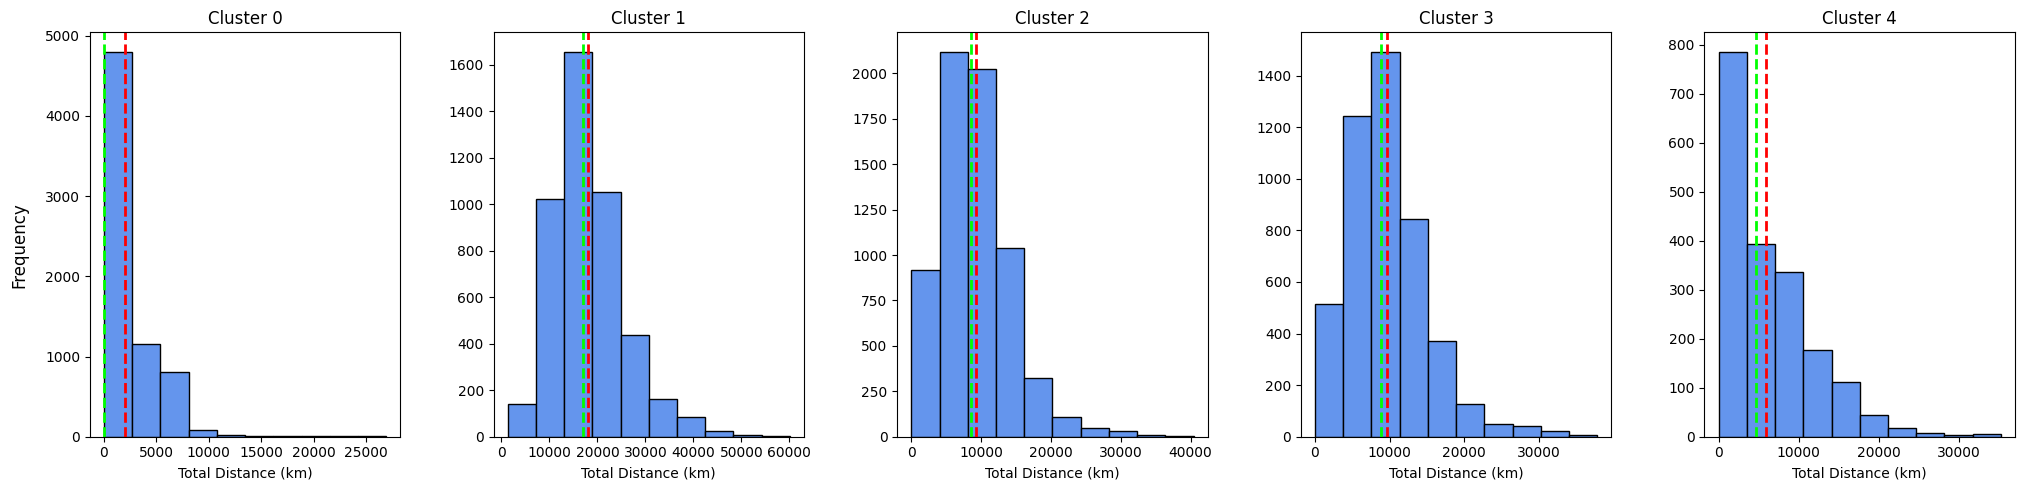

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(flights['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Share y-axis for comparison

for i, cluster in enumerate(sorted_clusters):
    # Filter data for the current cluster
    cluster_data = flights[flights['cluster'] == cluster]

    # Plot histogram for total_distance_flown_km
    axes[i].hist(cluster_data['total_distance_flown_km'], bins=10, edgecolor='black', color='cornflowerblue')

    # Set labels and title for each subplot
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Total Distance (km)')
    mean_val = cluster_data['total_distance_flown_km'].mean()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_val:.2f}')
    median=np.median(cluster_data['total_distance_flown_km'])
    axes[i].axvline(median, color='lime', linestyle='dashed', linewidth=2, label=f'Median = {median:.2f}')


# Set shared y-axis label
fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)

# Adjust layout for clarity
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add space between subplots
plt.show()





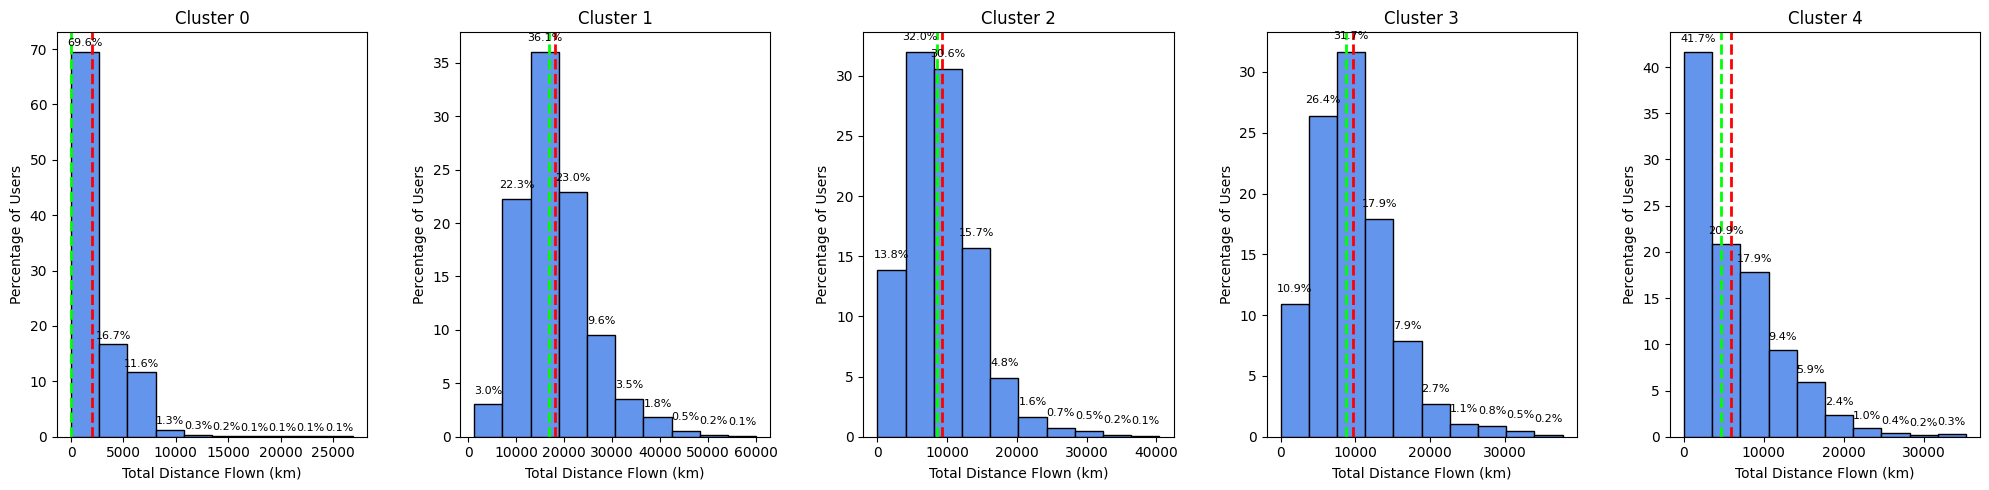

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(flights['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Define bins (3 bins)
bins = [0, 100, 500, 1000]  # Adjust these ranges to fit your data

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Share y-axis for comparison

for i, cluster in enumerate(sorted_clusters):
    # Filter data for the current cluster
    cluster_data = flights[flights['cluster'] == cluster]

    # Compute histogram counts and bin edges
    counts, bin_edges = np.histogram(cluster_data['total_distance_flown_km'], bins=10)

    # Convert counts to percentages
    total_count = counts.sum()
    percentages = (counts / total_count) * 100 if total_count > 0 else [0] * len(counts)

    # Create a bar plot with percentages
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    axes[i].bar(bin_centers, percentages, width=np.diff(bin_edges), align='center', color='cornflowerblue', edgecolor='black')

    # Add percentage labels on top of each bar
    for percentage, x in zip(percentages, bin_centers):
        axes[i].text(x, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=8)

    # Add mean and median lines
    mean_val = cluster_data['total_distance_flown_km'].mean()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_val:.2f}')
    median = np.median(cluster_data['total_distance_flown_km'])
    axes[i].axvline(median, color='lime', linestyle='dashed', linewidth=2, label=f'Median = {median:.2f}')

    # Set labels and title for each subplot
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Total Distance Flown (km)')
    axes[i].set_ylabel('Percentage of Users')

# Adjust layout for clarity
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add space between subplots
plt.show()


###4) Hotel Reservations

In [ ]:
hotels=customers[['total_hotel_booked_aft_cancellation','total_num_hotel_discount','total_num_nights_fixed','total_num_rooms','cluster']]
hotels

total_hotel_booked_aft_cancellation  total_num_hotel_discount  \
0                                        2                         0   
1                                        0                         0   
2                                        1                         0   
3                                        2                         1   
4                                        1                         0   
...                                    ...                       ...   
24719                                    1                         0   
24720                                    0                         2   
24721                                    1                         1   
24722                                    0                         0   
24723                                    1                         0   

       total_num_nights_fixed  total_num_rooms  cluster  
0                          10                2        2  
1                           0                0        0  
2                           3                1        0  
3                          20                3        2  
4                          10                1        0  
...                       ...              ...      ...  
24719                       1                2        0  
24720                      24                2        4  
24721                       1                1        2  
24722                       0                0        0  
24723                       1                1        0  

[24724 rows x 5 columns]

In [ ]:
hotels.groupby('cluster').mean()

total_hotel_booked_aft_cancellation  total_num_hotel_discount  \
cluster                                                                  
0                                   0.745075                  0.134415   
1                                   4.066580                  0.678198   
2                                   2.366244                  0.366093   
3                                   2.408994                  0.367416   
4                                   1.569989                  2.299576   

         total_num_nights_fixed  total_num_rooms  
cluster                                           
0                      3.799971         0.884270  
1                     13.402524         4.966928  
2                      8.685085         2.771588  
3                      8.814807         2.818201  
4                     13.972959         3.541357

In [ ]:
hotels.groupby('cluster').median()

total_hotel_booked_aft_cancellation  total_num_hotel_discount  \
cluster                                                                  
0                                        1.0                       0.0   
1                                        4.0                       1.0   
2                                        2.0                       0.0   
3                                        2.0                       0.0   
4                                        2.0                       2.0   

         total_num_nights_fixed  total_num_rooms  
cluster                                           
0                           2.0              1.0  
1                          12.0              5.0  
2                           7.0              3.0  
3                           7.0              3.0  
4                          11.0              3.0

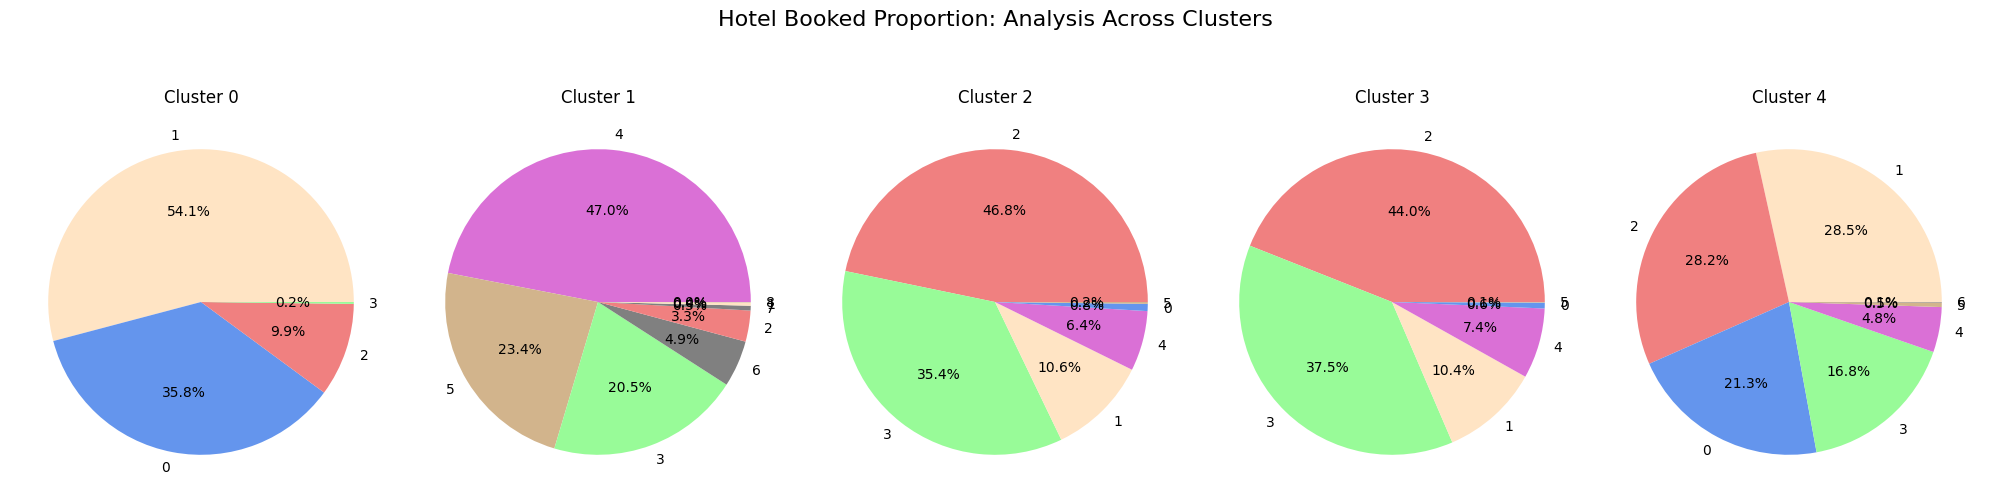

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(hotels['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

color_map = {
    0: 'cornflowerblue',
    1: 'bisque',
    2: 'lightcoral',
    3: 'palegreen',
    4: 'orchid',
    5: 'tan'

}

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = hotels[hotels['cluster'] == cluster]
    hotels_counts = cluster_data['total_hotel_booked_aft_cancellation'].value_counts()
    # Map colors based on the session value
    colors = [color_map.get(value, 'gray') for value in hotels_counts.index]  # Default to 'gray' if value is not in color_map

    axes[i].pie(hotels_counts, labels=hotels_counts.index, autopct='%1.1f%%',colors=colors)
    axes[i].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Hotel Booked Proportion: Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

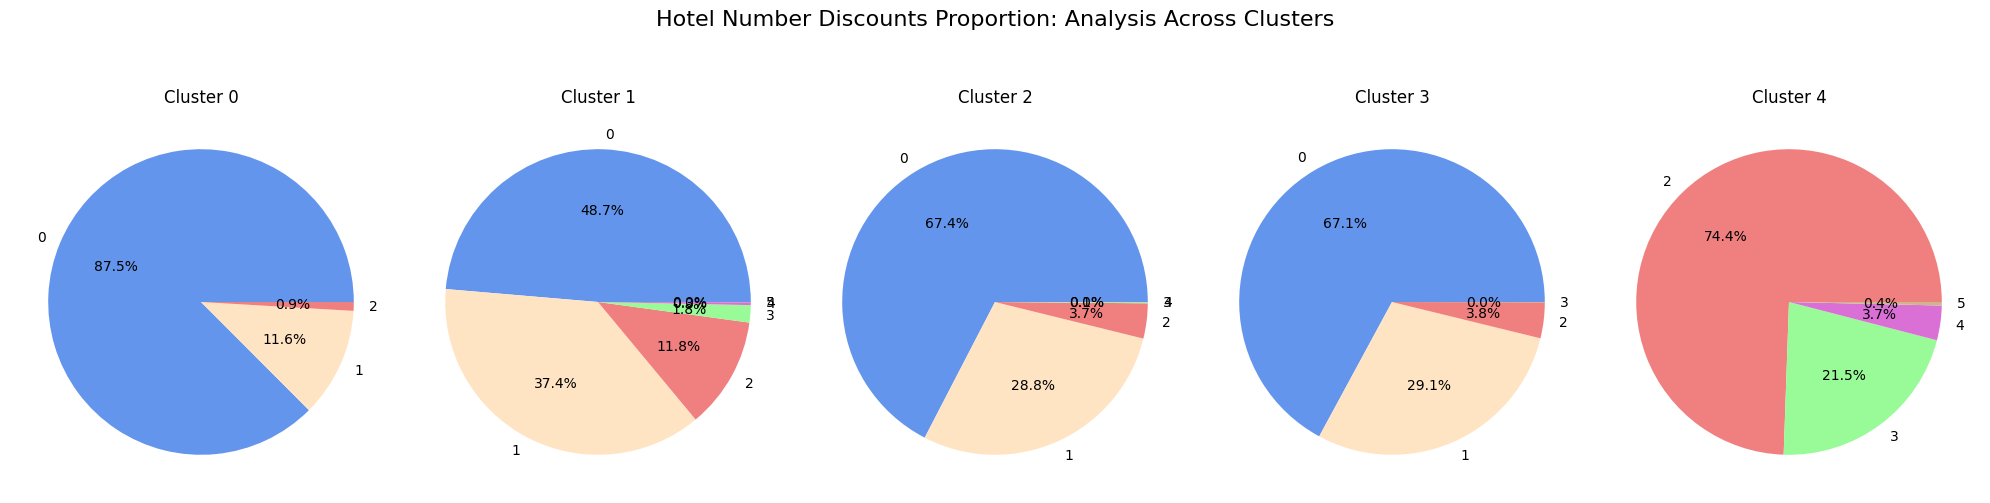

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(hotels['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

color_map = {
    0: 'cornflowerblue',
    1: 'bisque',
    2: 'lightcoral',
    3: 'palegreen',
    4: 'orchid',
    5: 'tan'

}

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a pie chart in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = hotels[hotels['cluster'] == cluster]
    hotels_counts = cluster_data['total_num_hotel_discount'].value_counts()
    # Map colors based on the session value
    colors = [color_map.get(value, 'gray') for value in hotels_counts.index]  # Default to 'gray' if value is not in color_map

    axes[i].pie(hotels_counts, labels=hotels_counts.index, autopct='%1.1f%%',colors=colors)
    axes[i].set_title(f'Cluster {cluster}')

# Adjust layout for clarity
fig.suptitle('Hotel Number Discounts Proportion: Analysis Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

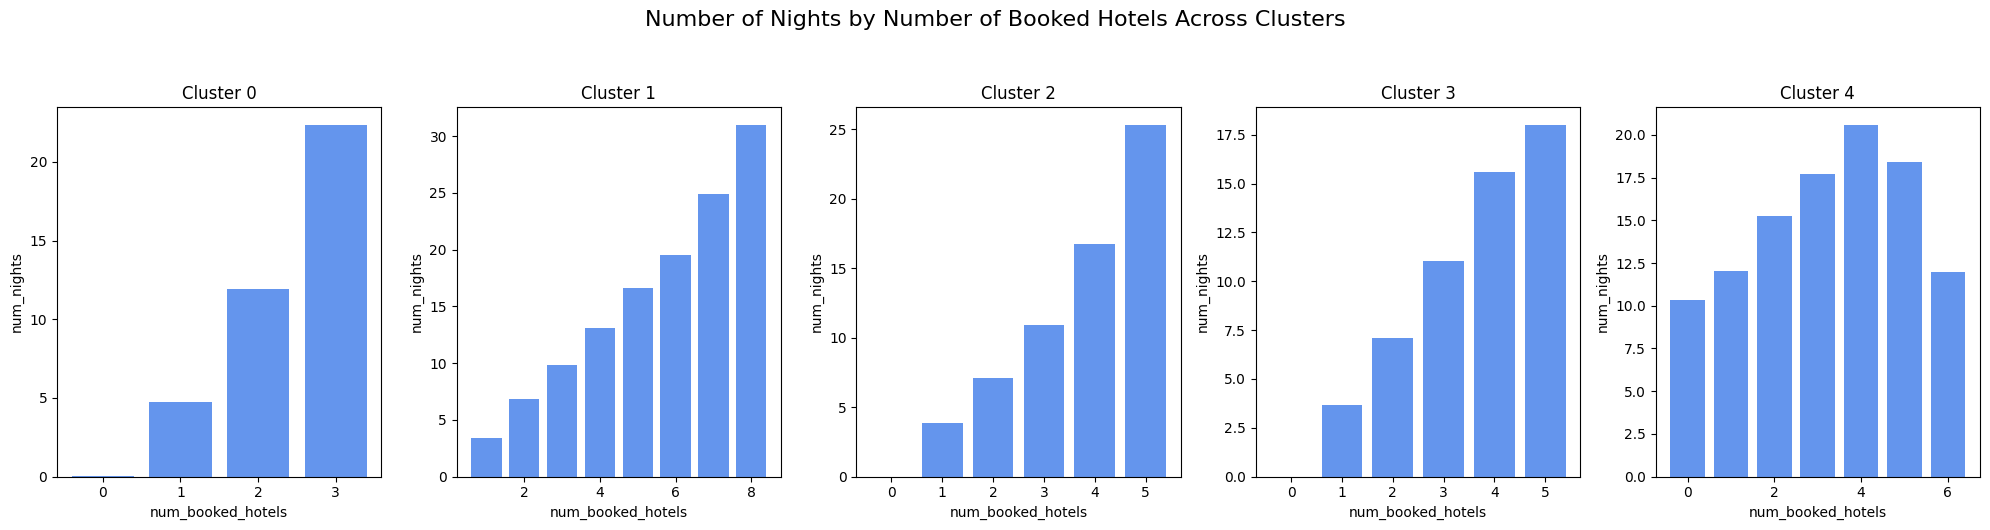

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(hotels['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a bar plot in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = hotels[hotels['cluster'] == cluster]

    # Calculate total duration in minutes for each session
    duration_sums = cluster_data.groupby('total_hotel_booked_aft_cancellation')['total_num_nights_fixed'].mean()

    # Create the bar plot
    axes[i].bar(duration_sums.index, duration_sums.values, color='cornflowerblue')
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('num_booked_hotels')
    axes[i].set_ylabel('num_nights')

# Adjust layout for clarity
fig.suptitle('Number of Nights by Number of Booked Hotels Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


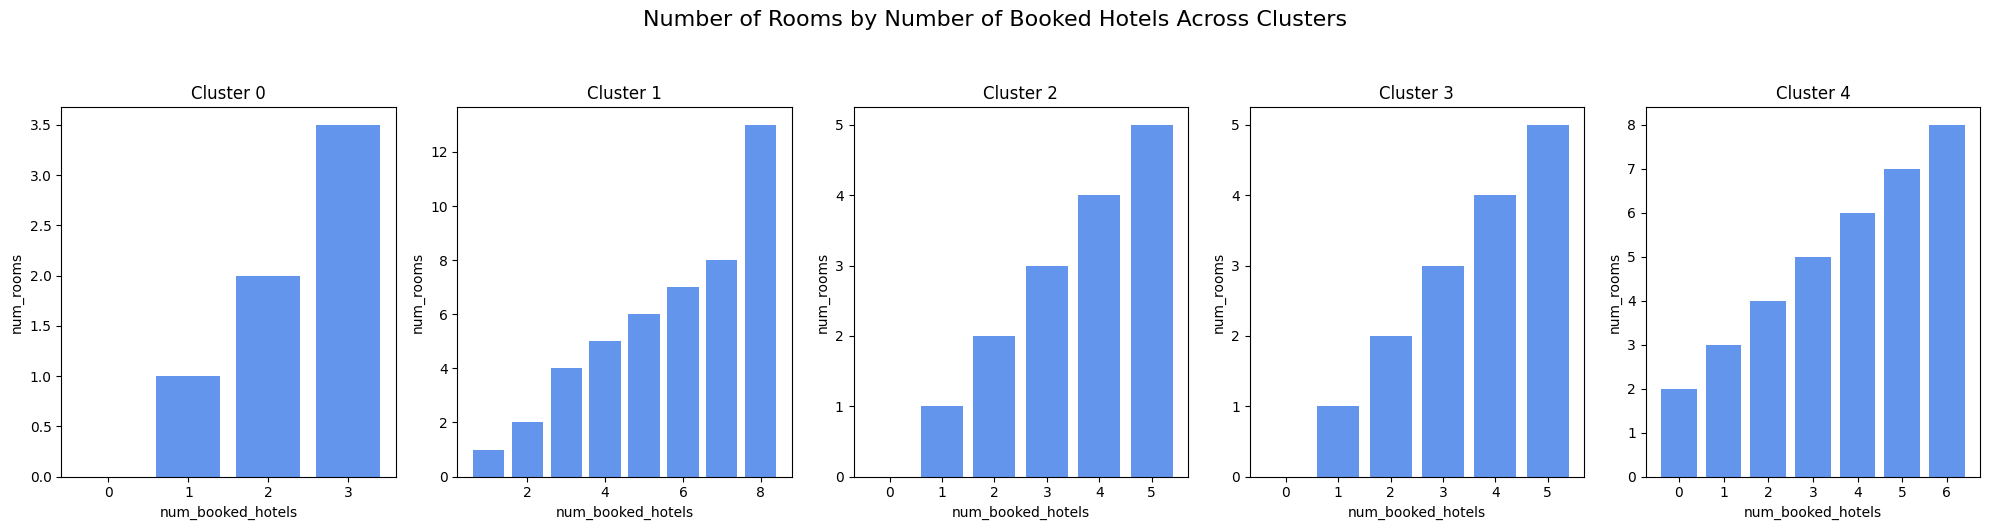

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(hotels['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Adjust figsize for clarity

# Loop through each sorted cluster and create a bar plot in its respective subplot
for i, cluster in enumerate(sorted_clusters):
    cluster_data = hotels[hotels['cluster'] == cluster]

    # Calculate total duration in minutes for each session
    duration_sums = cluster_data.groupby('total_hotel_booked_aft_cancellation')['total_num_rooms'].median()

    # Create the bar plot
    axes[i].bar(duration_sums.index, duration_sums.values, color='cornflowerblue')
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('num_booked_hotels')
    axes[i].set_ylabel('num_rooms')

# Adjust layout for clarity
fig.suptitle('Number of Rooms by Number of Booked Hotels Across Clusters', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


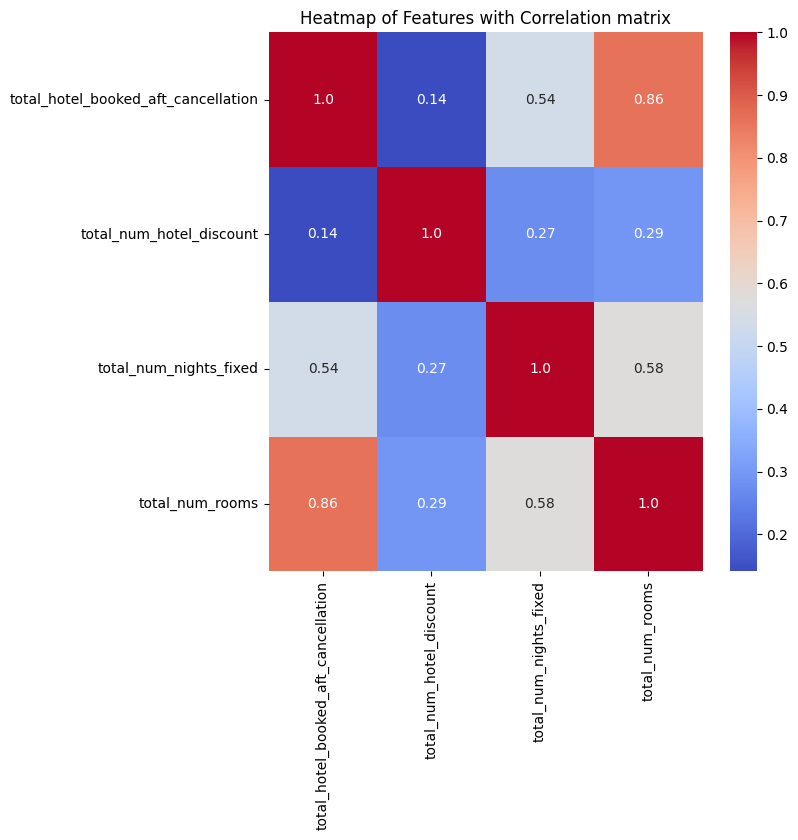

In [ ]:
#Correlation betwenn the numerical features
# Exclude non-numerical columns

act=hotels.drop('cluster',axis=1)
corract = act.corr()

plt.figure(figsize = (7,7))
sns.heatmap(corract, annot = True, cmap = 'coolwarm', fmt = ".2", annot_kws={"size": 10})
plt.title("Heatmap of Features with Correlation matrix")
plt.show()

###5) Spending Behavior

In [ ]:
spendings=customers[['total_paid_for_flights_aft_discount','total_paid_for_hotel_aft_discount','cluster']]
spendings

total_paid_for_flights_aft_discount  total_paid_for_hotel_aft_discount  \
0                                1081.7835                             282.00   
1                                   0.0000                               0.00   
2                                 117.5720                               0.00   
3                                   0.0000                             379.25   
4                                1063.2200                             275.00   
...                                    ...                                ...   
24719                            1130.0000                             406.00   
24720                               0.0000                               0.00   
24721                             998.3600                             201.60   
24722                               0.0000                               0.00   
24723                             579.5000                              87.00   

       cluster  
0            2  
1            0  
2            0  
3            2  
4            0  
...        ...  
24719        0  
24720        4  
24721        2  
24722        0  
24723        0  

[24724 rows x 3 columns]

In [ ]:
spendings.groupby('cluster').mean()

total_paid_for_flights_aft_discount  \
cluster                                        
0                                 192.593676   
1                                2009.746572   
2                                 966.254003   
3                                 974.322202   
4                                 607.728538   

         total_paid_for_hotel_aft_discount  
cluster                                     
0                               130.753049  
1                               770.254917  
2                               425.007624  
3                               421.598706  
4                               280.580806

In [ ]:
spendings.groupby('cluster').median()

total_paid_for_flights_aft_discount  \
cluster                                        
0                                    0.00000   
1                                 1734.87000   
2                                  827.51100   
3                                  857.28525   
4                                  448.09000   

         total_paid_for_hotel_aft_discount  
cluster                                     
0                                    79.00  
1                                   696.55  
2                                   371.85  
3                                   371.00  
4                                   214.00

In [ ]:
spendings.groupby('cluster').count()

total_paid_for_flights_aft_discount  \
cluster                                        
0                                       6904   
1                                       4596   
2                                       6624   
3                                       4714   
4                                       1886   

         total_paid_for_hotel_aft_discount  
cluster                                     
0                                     6904  
1                                     4596  
2                                     6624  
3                                     4714  
4                                     1886

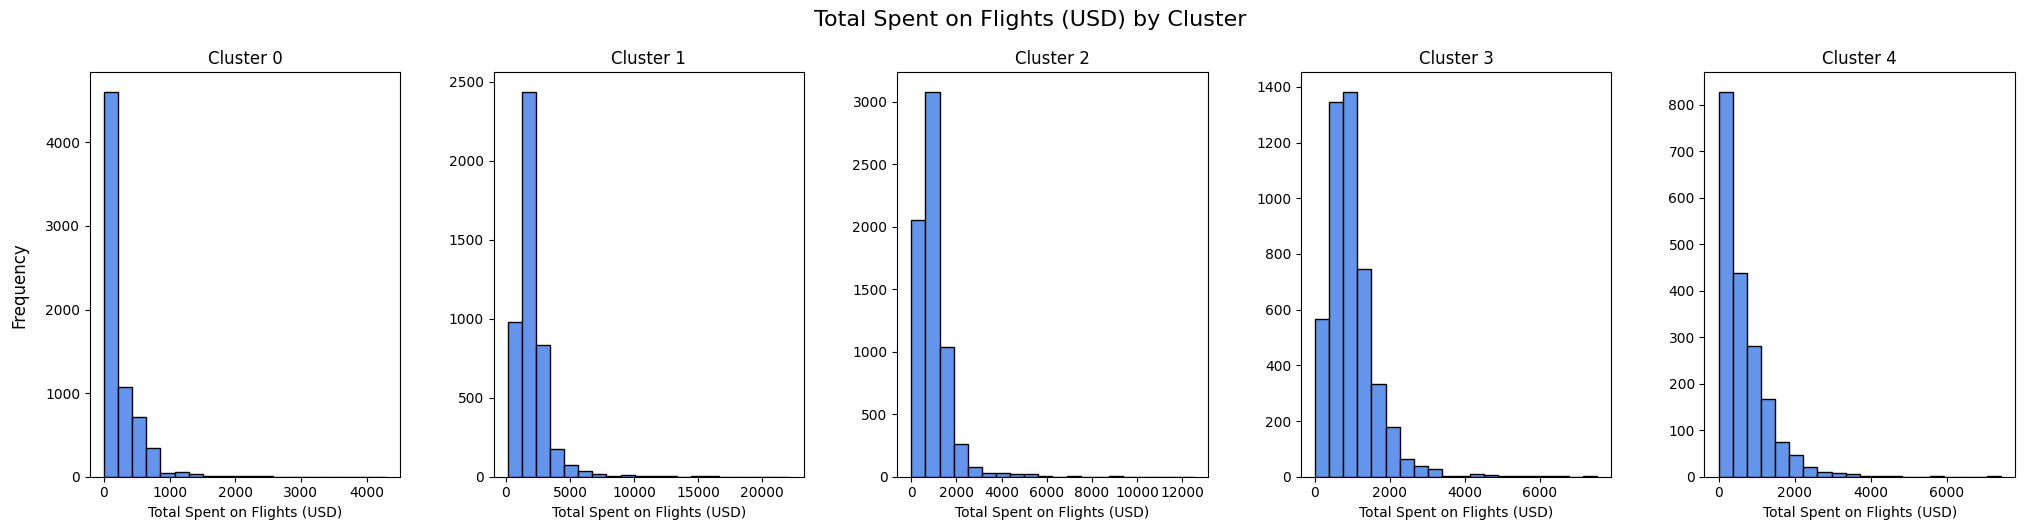

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(spendings['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Share y-axis for comparison

for i, cluster in enumerate(sorted_clusters):
    # Filter data for the current cluster
    cluster_data = spendings[spendings['cluster'] == cluster]

    #cluster_datax=cluster_data['total_paid_for_flights_aft_discount']
    # Plot histogram for total_distance_flown_km
    axes[i].hist(cluster_data['total_paid_for_flights_aft_discount'], bins=20, edgecolor='black', color='cornflowerblue')

    # Set labels and title for each subplot
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Total Spent on Flights (USD)')

    #mean_val = cluster_data['total_paid_for_flights_aft_discount'].mean()
    #axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_val:.2f}')
    #median=np.median(cluster_data['total_paid_for_flights_aft_discount'])
    #axes[i].axvline(median, color='lime', linestyle='dashed', linewidth=2, label=f'Median = {median:.2f}')


# Set shared y-axis label
fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)

# Adjust layout for clarity
plt.tight_layout()
fig.suptitle('Total Spent on Flights (USD) by Cluster', fontsize=16, y=1.05)

plt.subplots_adjust(wspace=0.3)  # Add space between subplots
plt.show()





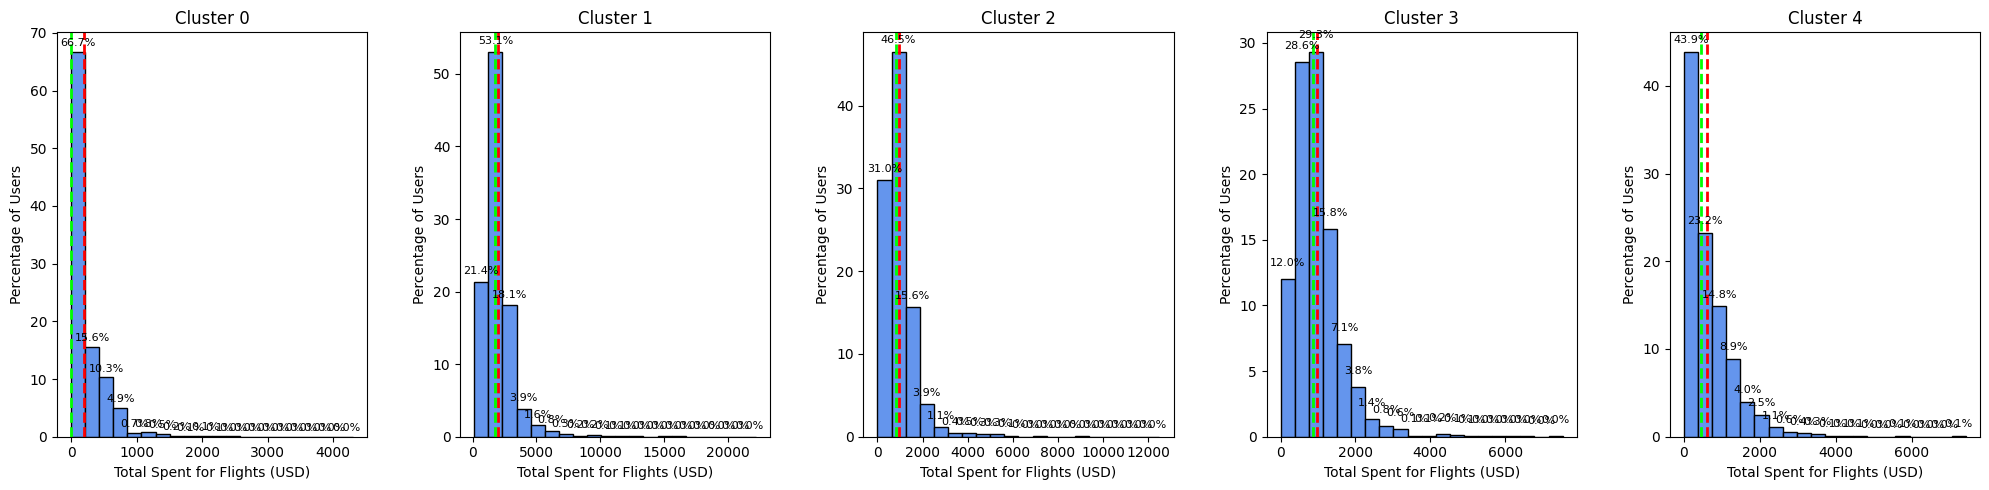

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(spendings['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Define bins (3 bins)
bins = [0, 100, 500, 1000]  # Adjust these ranges to fit your data

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Share y-axis for comparison

for i, cluster in enumerate(sorted_clusters):
    # Filter data for the current cluster
    cluster_data = spendings[spendings['cluster'] == cluster]

    # Compute histogram counts and bin edges
    counts, bin_edges = np.histogram(cluster_data['total_paid_for_flights_aft_discount'], bins=20)

    # Convert counts to percentages
    total_count = counts.sum()
    percentages = (counts / total_count) * 100 if total_count > 0 else [0] * len(counts)

    # Create a bar plot with percentages
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    axes[i].bar(bin_centers, percentages, width=np.diff(bin_edges), align='center', color='cornflowerblue', edgecolor='black')

    # Add percentage labels on top of each bar
    for percentage, x in zip(percentages, bin_centers):
        axes[i].text(x, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=8)

    # Add mean and median lines
    mean_val = cluster_data['total_paid_for_flights_aft_discount'].mean()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_val:.2f}')
    median = np.median(cluster_data['total_paid_for_flights_aft_discount'])
    axes[i].axvline(median, color='lime', linestyle='dashed', linewidth=2, label=f'Median = {median:.2f}')

    # Set labels and title for each subplot
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Total Spent for Flights (USD)')
    axes[i].set_ylabel('Percentage of Users')

# Adjust layout for clarity
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add space between subplots
plt.show()


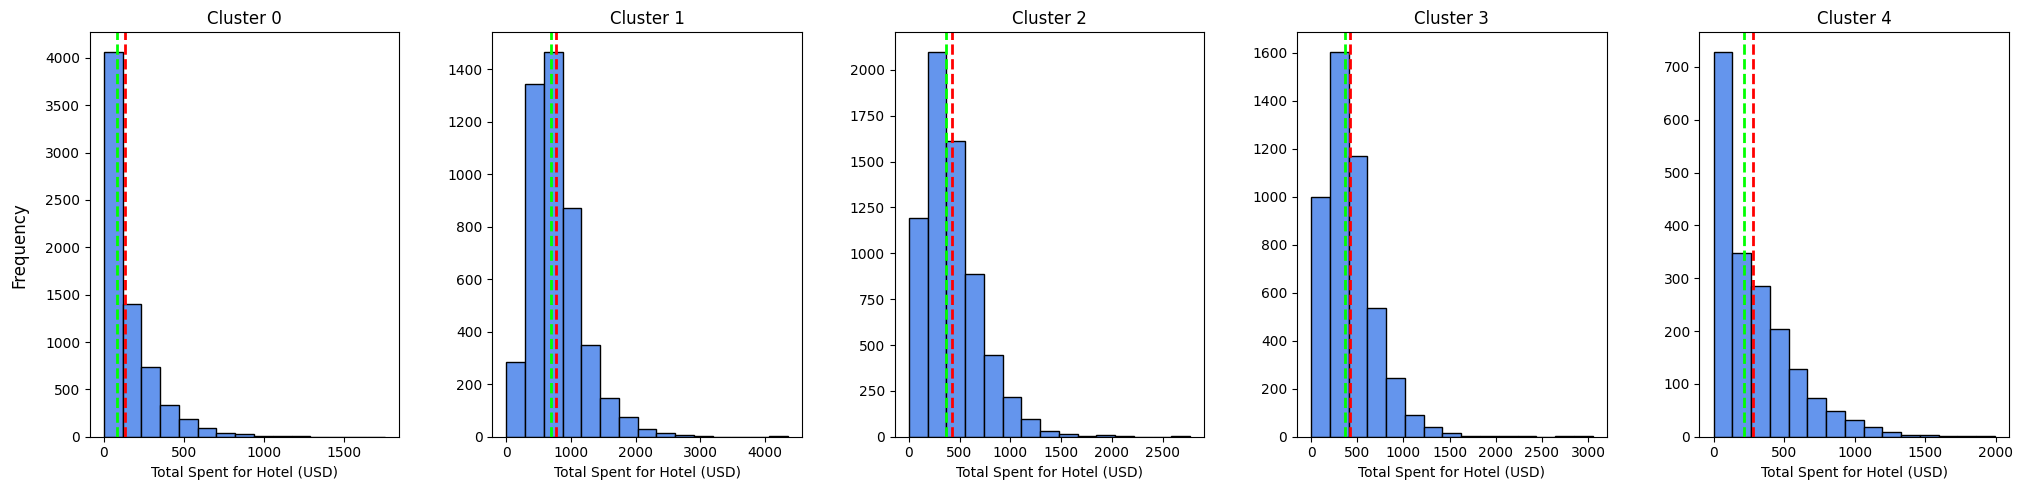

In [ ]:
# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(spendings['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Share y-axis for comparison

for i, cluster in enumerate(sorted_clusters):
    # Filter data for the current cluster
    cluster_data = spendings[spendings['cluster'] == cluster]

    # Plot histogram for total_distance_flown_km
    axes[i].hist(cluster_data['total_paid_for_hotel_aft_discount'], bins=15, edgecolor='black', color='cornflowerblue')

    # Set labels and title for each subplot
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Total Spent for Hotel (USD)')
    mean_val = cluster_data['total_paid_for_hotel_aft_discount'].mean()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_val:.2f}')
    median=np.median(cluster_data['total_paid_for_hotel_aft_discount'])
    axes[i].axvline(median, color='lime', linestyle='dashed', linewidth=2, label=f'Median = {median:.2f}')


# Set shared y-axis label
fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)

# Adjust layout for clarity
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add space between subplots
plt.show()





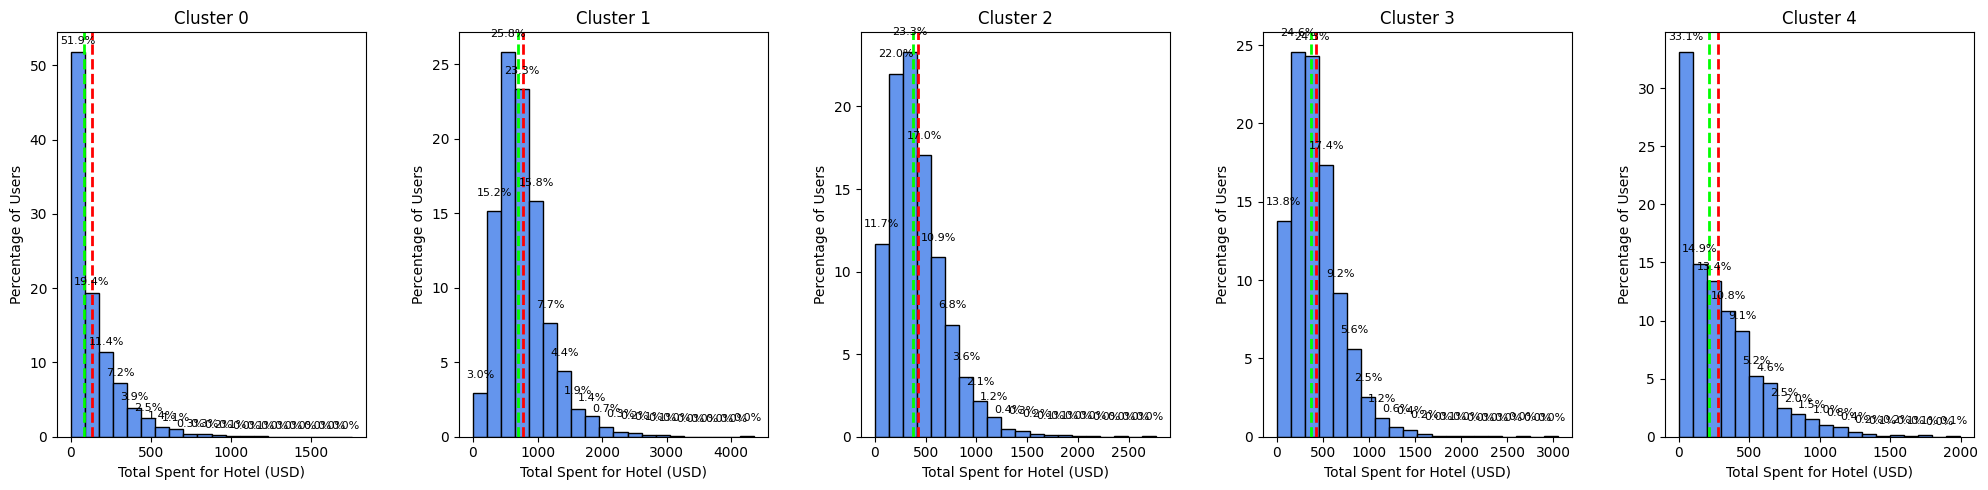

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort clusters to ensure order from 0 to 4
sorted_clusters = sorted(spendings['cluster'].unique())

# Number of clusters
num_clusters = len(sorted_clusters)

# Define bins (3 bins)
bins = [0, 100, 500, 1000]  # Adjust these ranges to fit your data

# Create a figure with subplots
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5))  # Share y-axis for comparison

for i, cluster in enumerate(sorted_clusters):
    # Filter data for the current cluster
    cluster_data = spendings[spendings['cluster'] == cluster]

    # Compute histogram counts and bin edges
    counts, bin_edges = np.histogram(cluster_data['total_paid_for_hotel_aft_discount'], bins=20)

    # Convert counts to percentages
    total_count = counts.sum()
    percentages = (counts / total_count) * 100 if total_count > 0 else [0] * len(counts)

    # Create a bar plot with percentages
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    axes[i].bar(bin_centers, percentages, width=np.diff(bin_edges), align='center', color='cornflowerblue', edgecolor='black')

    # Add percentage labels on top of each bar
    for percentage, x in zip(percentages, bin_centers):
        axes[i].text(x, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=8)

    # Add mean and median lines
    mean_val = cluster_data['total_paid_for_hotel_aft_discount'].mean()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_val:.2f}')
    median = np.median(cluster_data['total_paid_for_hotel_aft_discount'])
    axes[i].axvline(median, color='lime', linestyle='dashed', linewidth=2, label=f'Median = {median:.2f}')

    # Set labels and title for each subplot
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Total Spent for Hotel (USD)')
    axes[i].set_ylabel('Percentage of Users')

# Adjust layout for clarity
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add space between subplots
plt.show()
